## Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display, HTML
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

## Loading Sales Data

In [2]:
data_excel = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Sales Data.xlsx",sheet_name=None)
data_excel.keys()

dict_keys(['Sales', 'Distribution', 'Shipment'])

## Displaying RAW Sales Data

In [3]:
sales_data = data_excel['Sales']
sales_data.head()

Unnamed: 0 Value ('000 HKD) Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0               Period            Brand         V1         V2         V3   
1  2011-07-01 00:00:00          28518.3    12706.5    12196.9     3614.4   
2  2011-08-01 00:00:00          31712.5    14190.5    13250.5     4271.6   
3  2011-09-01 00:00:00          28436.8    12422.5    11946.7     4067.6   
4  2011-10-01 00:00:00          29048.8    12652.5    12690.9     3705.5   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10  \
0         NaN       Brand         V1         V2         V3          NaN   
1         NaN     85935.6    36127.4    40971.6     8835.6          NaN   
2         NaN     95135.2    40373.7    44402.1    10359.4          NaN   
3         NaN       85814    36034.5    40029.2     9750.3          NaN   
4         NaN     88047.7    36697.8    42431.3     8918.6          NaN   

  Avg Price per SU Unnamed: 12 Unnamed: 13 Unnamed: 14  Unnamed: 15  \
0            Brand          V1          V2          V3          NaN   
1       331.856646  351.713658  297.691572  409.072389          NaN   
2       333.341392  351.478809   298.42057  412.340483          NaN   
3       331.377165   344.73907  298.449632  417.176907          NaN   
4       329.921168  344.775436  299.092887  415.480008          NaN   

  Avg Price per USD Unnamed: 17 Unnamed: 18 Unnamed: 19  
0             Brand          V1          V2          V3  
1         43.141364   45.722776   38.699904   53.179411  
2         43.334381   45.692245   38.794674   53.604263  
3         43.079031   44.816079   38.798452   54.232998  
4         42.889752   44.820807   38.882075   54.012401

## Displaying Raw Distribution Data

In [4]:
distribution_data = data_excel['Distribution']
distribution_data.head()

Unnamed: 0    WTD Unnamed: 2 Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0               Period  Brand         V1         V2         V3         NaN   
1  2011-07-01 00:00:00    100        100         99         96         NaN   
2  2011-08-01 00:00:00    100         99         99         96         NaN   
3  2011-09-01 00:00:00    100         99         99         95         NaN   
4  2011-10-01 00:00:00     99         99         99         94         NaN   

    NUMD Unnamed: 7 Unnamed: 8 Unnamed: 9  
0  Brand         V1         V2         V3  
1     48         46         46         40  
2     48         46         46         40  
3     48         46         46         39  
4     48         46         46         38

## Displaying Shipment Data

In [5]:
shipment_data = data_excel['Shipment']
shipment_data.head()

Unnamed: 0  Shipment SU  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0               Period        Brand          V1          V2          V3   
1  2011-07-01 00:00:00   111110.765  43869.0272  59022.5266   8219.2112   
2  2011-08-01 00:00:00    98568.474   48970.128  40447.5286   9150.8174   
3  2011-09-01 00:00:00  122461.0034  54010.9639  58820.3602   9629.6793   
4  2011-10-01 00:00:00  134933.0212  60733.5058  63417.0106  10782.5048   

   Unnamed: 5 Volume (SU) Unnamed: 7 Unnamed: 8 Unnamed: 9  
0         NaN       Brand         V1         V2         V3  
1         NaN     85935.6    36127.4    40971.6     8835.6  
2         NaN     95135.2    40373.7    44402.1    10359.4  
3         NaN       85814    36034.5    40029.2     9750.3  
4         NaN     88047.7    36697.8    42431.3     8918.6

## Data Preprocessing 

## Sales Data Cleaning

In [6]:

sales_data = data_excel['Sales']
cleaned_sales_data = sales_data.dropna(axis=1, how='all').iloc[1:].reset_index(drop=True)

prefixes = ['Value_', 'Volume_', 'Avg_Price_SU_', 'Avg_Price_USD_']
suffixes = ['Brand_sales', 'V1_sales', 'V2_sales', 'V3_sales']
new_column_names = ['Period'] + [f'{prefix}{suffix}' for prefix in prefixes for suffix in suffixes]

cleaned_sales_data.columns = new_column_names[:len(cleaned_sales_data.columns)]
cleaned_sales_data['Period'] = pd.to_datetime(cleaned_sales_data['Period']).dt.strftime('%Y-%m-%d')


## Cleaned Sale Data

In [7]:
cleaned_sales_data.head()

Period Value_Brand_sales Value_V1_sales Value_V2_sales Value_V3_sales  \
0  2011-07-01           28518.3        12706.5        12196.9         3614.4   
1  2011-08-01           31712.5        14190.5        13250.5         4271.6   
2  2011-09-01           28436.8        12422.5        11946.7         4067.6   
3  2011-10-01           29048.8        12652.5        12690.9         3705.5   
4  2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Volume_Brand_sales Volume_V1_sales Volume_V2_sales Volume_V3_sales  \
0            85935.6         36127.4         40971.6          8835.6   
1            95135.2         40373.7         44402.1         10359.4   
2              85814         36034.5         40029.2          9750.3   
3            88047.7         36697.8         42431.3          8918.6   
4           92028.93         39742.8           42395         9891.13   

  Avg_Price_SU_Brand_sales Avg_Price_SU_V1_sales Avg_Price_SU_V2_sales  \
0               331.856646            351.713658            297.691572   
1               333.341392            351.478809             298.42057   
2               331.377165             344.73907            298.449632   
3               329.921168            344.775436            299.092887   
4               331.021343             345.66412            300.129025   

  Avg_Price_SU_V3_sales Avg_Price_USD_Brand_sales Avg_Price_USD_V1_sales  \
0            409.072389                 43.141364              45.722776   
1            412.340483                 43.334381              45.692245   
2            417.176907                 43.079031              44.816079   
3            415.480008                 42.889752              44.820807   
4            404.594824                 43.032775              44.936336   

  Avg_Price_USD_V2_sales Avg_Price_USD_V3_sales  
0              38.699904              53.179411  
1              38.794674              53.604263  
2              38.798452              54.232998  
3              38.882075              54.012401  
4              39.016773              52.597327

## Distribution Data Cleaning

In [8]:

distribution_data = data_excel['Distribution']
cleaned_distribution_data = distribution_data.dropna(axis=1, how='all').iloc[1:].reset_index(drop=True)

prefixes = ['WTD_', 'NUMD_']
suffixes = ['Brand', 'V1', 'V2', 'V3']
new_column_names = ['Period'] + [f'{prefix}{suffix}' for prefix in prefixes for suffix in suffixes]

cleaned_distribution_data.columns = new_column_names[:len(cleaned_distribution_data.columns)]
cleaned_distribution_data['Period'] = pd.to_datetime(cleaned_distribution_data['Period']).dt.strftime('%Y-%m-%d')


## Cleaned Distribution Data

In [9]:
cleaned_distribution_data.head()

Period WTD_Brand WTD_V1 WTD_V2 WTD_V3 NUMD_Brand NUMD_V1 NUMD_V2  \
0  2011-07-01       100    100     99     96         48      46      46   
1  2011-08-01       100     99     99     96         48      46      46   
2  2011-09-01       100     99     99     95         48      46      46   
3  2011-10-01        99     99     99     94         48      46      46   
4  2011-11-01       100    100     99     93         48      46      45   

  NUMD_V3  
0      40  
1      40  
2      39  
3      38  
4      39

## Shipment Data Cleaning 

In [10]:

shipment_data = data_excel['Shipment']
cleaned_shipment_data = shipment_data.dropna(axis=1, how='all').iloc[1:].reset_index(drop=True)

prefixes = ['Shipment_SU_', 'Volume_SU_']
suffixes = ['Brand', 'V1', 'V2', 'V3']
new_column_names = ['Period'] + [f'{prefix}{suffix}' for prefix in prefixes for suffix in suffixes]

cleaned_shipment_data.columns = new_column_names[:len(cleaned_shipment_data.columns)]
cleaned_shipment_data['Period'] = pd.to_datetime(cleaned_shipment_data['Period']).dt.strftime('%Y-%m-%d')

# Remove columns with "Volume_SU_"
cleaned_shipment_data = cleaned_shipment_data.loc[:, ~cleaned_shipment_data.columns.str.contains('Volume_SU_')]



## Cleaned Shipment Data

In [11]:
cleaned_shipment_data.head()

Period Shipment_SU_Brand Shipment_SU_V1 Shipment_SU_V2 Shipment_SU_V3
0  2011-07-01        111110.765     43869.0272     59022.5266      8219.2112
1  2011-08-01         98568.474      48970.128     40447.5286      9150.8174
2  2011-09-01       122461.0034     54010.9639     58820.3602      9629.6793
3  2011-10-01       134933.0212     60733.5058     63417.0106     10782.5048
4  2011-11-01       122066.2618     52525.5475     60432.8513       9107.863

## Merging Cleaned Sales , Distribution , Shipment Data Using Left Join

In [12]:
merged_data = (
    cleaned_sales_data
    .merge(cleaned_distribution_data, on='Period', how='left')
    .merge(cleaned_shipment_data, on='Period', how='left')
)


## Displaying Final Merged Data

In [13]:
merged_data.head()

Period Value_Brand_sales Value_V1_sales Value_V2_sales Value_V3_sales  \
0  2011-07-01           28518.3        12706.5        12196.9         3614.4   
1  2011-08-01           31712.5        14190.5        13250.5         4271.6   
2  2011-09-01           28436.8        12422.5        11946.7         4067.6   
3  2011-10-01           29048.8        12652.5        12690.9         3705.5   
4  2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Volume_Brand_sales Volume_V1_sales Volume_V2_sales Volume_V3_sales  \
0            85935.6         36127.4         40971.6          8835.6   
1            95135.2         40373.7         44402.1         10359.4   
2              85814         36034.5         40029.2          9750.3   
3            88047.7         36697.8         42431.3          8918.6   
4           92028.93         39742.8           42395         9891.13   

  Avg_Price_SU_Brand_sales  ... WTD_V2 WTD_V3 NUMD_Brand NUMD_V1 NUMD_V2  \
0               331.856646  ...     99     96         48      46      46   
1               333.341392  ...     99     96         48      46      46   
2               331.377165  ...     99     95         48      46      46   
3               329.921168  ...     99     94         48      46      46   
4               331.021343  ...     99     93         48      46      45   

  NUMD_V3 Shipment_SU_Brand Shipment_SU_V1 Shipment_SU_V2 Shipment_SU_V3  
0      40        111110.765     43869.0272     59022.5266      8219.2112  
1      40         98568.474      48970.128     40447.5286      9150.8174  
2      39       122461.0034     54010.9639     58820.3602      9629.6793  
3      38       134933.0212     60733.5058     63417.0106     10782.5048  
4      39       122066.2618     52525.5475     60432.8513       9107.863  

[5 rows x 29 columns]

## Shape Of Final Merged Data 

In [14]:
merged_data.shape

(41, 29)

## Handling Media Data

## Loading Media Data 

In [15]:
Media_data = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Media_Data.xlsx", sheet_name=None)

## Displaying all the sheets in Media data

In [16]:
# List all sheet names
list(Media_data.keys())

['Brand', 'V1', 'V2', 'V3']

## Access each sheet by name and display the first few rows

In [17]:
# Access each sheet by name and display the first few rows
brand_data = Media_data['Brand']
v1_data = Media_data['V1']
v2_data = Media_data['V2']
v3_data = Media_data['V3']

## Displaying Brand Raw Data

In [18]:
# Display the first few rows of brand sheet
brand_data.head()

Unnamed: 0 TV including ISP (GRPs) - F30-39    Unnamed: 2  \
0                  NaN          TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                              GRP           GRP   
2       Responsibility                              AOR           AOR   
3  2010-01-01 00:00:00                              NaN           NaN   
4  2010-02-02 00:00:00                              NaN           NaN   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                NaN          NaN           NaN           NaN           NaN   
4                NaN          NaN           NaN           NaN           NaN   

     Unnamed: 8    Unnamed: 9  ...              Trial Sampling  \
0  25 Seconder   30 Seconder   ...  Pls add all Trial Elements   
1           GRP           GRP  ...                         NaN   
2           AOR           AOR  ...                         P&G   
3           NaN           NaN  ...                         NaN   
4           NaN           NaN  ...                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214 Unnamed: 215 Unnamed: 216 Unnamed: 217 Unnamed: 218  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 219 columns]

## Displaying V1 Raw Data 

In [19]:
# Display the first few rows of V1 sheet
v1_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                        0             0   
4  2010-02-02 00:00:00                        0             0   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3             0             0  ...       NaN          NaN               NaN   
4             0             0  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

## Dispalying V2 Raw Data 

In [20]:
# Display the first few rows of V2 sheet
v2_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                      975           975   
4  2010-02-02 00:00:00                      835           835   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3             0           975  ...       NaN          NaN               NaN   
4             0           835  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

## Displaying V3 Raw Data 

In [21]:
# Display the first few rows of V3 sheet
v3_data.head()

Unnamed: 0       TV (GRPs) - F30-39    Unnamed: 2  \
0                  NaN  TOTAL GRPs - (ISP + TV)  ISP TV Total   
1                 Unit                      GRP           GRP   
2       Responsibility                      AOR           AOR   
3  2010-01-01 00:00:00                        0             0   
4  2010-02-02 00:00:00                        0             0   

          Unnamed: 3   Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7  \
0  ISP Digital Total  5 Seconder   10 Seconder   15 Seconder   20 Seconder    
1                GRP          GRP           GRP           GRP           GRP   
2                AOR          AOR           AOR           AOR           AOR   
3                  0            0             0             0             0   
4                  0            0             0             0             0   

     Unnamed: 8    Unnamed: 9  ... Ecommerce Unnamed: 206      Unnamed: 207  \
0  25 Seconder   30 Seconder   ...   Offtake     Traffic   Conversion rate    
1           GRP           GRP  ...      NT$M          NaN               NaN   
2           AOR           AOR  ...       P&G          P&G               P&G   
3             0             0  ...       NaN          NaN               NaN   
4             0             0  ...       NaN          NaN               NaN   

  Ecommerce\n(Spends)              Trial Sampling  \
0             Offtake  Pls add all Trial Elements   
1                NT$M                         NaN   
2                 P&G                         P&G   
3                 NaN                         NaN   
4                 NaN                         NaN   

                        Promotion Unnamed: 211 Unnamed: 212 Unnamed: 213  \
0  Pls add all Promotion Elements          NaN          NaN          NaN   
1                             NaN          NaN          NaN          NaN   
2                             P&G          NaN          NaN          NaN   
3                             NaN          NaN          NaN          NaN   
4                             NaN          NaN          NaN          NaN   

  Unnamed: 214  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 215 columns]

## Media Data Preprocessing 

## Preprocessing of Brand Data 

In [22]:

Brand_data = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Media_Data.xlsx", sheet_name="Brand", header=[0, 1, 2, 3])
# Combine multi-level headers into a single row of descriptive names with underscores, removing 'nan' values
Brand_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in Brand_data.columns]
# Display the first few rows to confirm
Brand_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV including ISP (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

   TV including ISP (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   TV including ISP (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   TV including ISP (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   TV including ISP (GRPs) - F30-39_30 Seconder _GRP_AOR  ...  \
0                                                NaN      ...   
1                                                NaN      ...   
2                                                NaN      ...   
3                                                NaN      ...   
4                                                NaN      ...   

   Trial Sampling_Pls add all Trial Elements_Unnamed: 209_level_2_P&G  \
0                                                NaN                    
1                                                NaN                    
2                                  

## Removing NAN Column 

In [23]:
Brand_data_cleaned = Brand_data.dropna(axis=1,how='all') 

## Removing Irrelevant Symbols from the Column names

In [24]:
Brand_data_cleaned.columns = Brand_data_cleaned.columns.map(lambda x: ''.join(filter(lambda y: str(y) != 'nan', map(str.strip, x))) if isinstance(x, str) else x)

# Remove parentheses and everything inside them
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace(r'\s*\(.*?\)\s*', '', regex=True)

# Remove "Unnamed: z level Y" parts
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace(r'Unnamed:\s*\d+_level_\d+', '', regex=True)

# Additional cleaning
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.strip('_')  # Remove leading/trailing underscores
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace(' ', '_')  # Replace spaces with underscores
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace('-', '')  # Remove hyphen
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace('F3039', '')  # Remove F3039
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace('Pls_add_all', '')  # Remove Pls add all
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace('Separated_from_regular_iMedia', '')  # Remove Separated from regular iMedia
Brand_data_cleaned.columns = Brand_data_cleaned.columns.str.replace('__', '_')

## Removing Period column 

In [25]:
#Rename the period Column
Brand_data_cleaned = Brand_data_cleaned.rename(columns={"Unit_Responsibility": "Period"})
# Convert 'Period' column to datetime
Brand_data_cleaned['Period'] = pd.to_datetime(Brand_data_cleaned['Period'], errors='coerce')

## Truncate Period Column

In [26]:
#As the sales data is having the period from 2011-07-01 
start_date = '2011-07-01'
end_date = '2014-06-30'

# Filter the DataFrame for the specified date range
Brand_data_cleaned = Brand_data_cleaned[(Brand_data_cleaned['Period'] >= start_date) & (Brand_data_cleaned['Period'] <= end_date)]


## Changing Index

In [27]:
# Reset index to start from 0
Brand_data_cleaned = Brand_data_cleaned.reset_index(drop=True)

## Add 'Brand_' prefix to all columns except 'Period'

In [28]:
# Add 'Brand_' prefix to all columns except 'Period'
Brand_data_cleaned = Brand_data_cleaned.rename(columns=lambda x: f"Brand_{x}" if x != 'Period' else x)


## Retaining Columns with >=60% Data

In [29]:
Brand_data_cleaned.replace(['-', 0.0], np.nan, inplace=True)

# Define the threshold for minimum non-null values (60% of the total rows)
threshold = 0.6 * len(Brand_data_cleaned)

# Keep only columns with at least 60% non-null values
Brand_data_cleaned = Brand_data_cleaned.loc[:, Brand_data_cleaned.notna().sum() >= threshold]


## Changing Columns Name 

In [30]:
# Define the mapping of original column names to the desired new names
column_mapping = {
    'Brand_Search_SEMYahoo!Alwayson_Noofimpressions_Digital': 'Brand_Search_SEM_Yahoo_impression_Digital','Brand_Search_SEMYahoo!Alwayson_NoofClicks_Digital': 'Brand_SEM_Yahoo_Clicks_Digital','Brand_Search_SEMYahoo!Alwayson_USM_Digital&AOR': 'Brand_SEM_Yahoo_USM_Digital_AOR', 'Brand_SocialAd_FacebookAd_NoofLIKEs_Digital': 'Brand_Social_Facebook_Likes_Digital','Brand_SocialAd_FacebookAd_PTAT_Digital': 'Brand_Social_Facebook_PTAT_Digital','Brand_BirthRate_No.ofBirths_ppl_CPA': 'Brand_Birth_Rate_No_of_Births_CPA','Brand_YoutubeBrandChannel_SidebySideVideo_NoofViews_P&G/DigitalAgency': 'Brand_Youtube_Channel_Views_P&G/Digital', 'Brand_CRM_PampersBabyClub_PlsaddallCRMElements_PlsaddallCRMElements_P&G': 'Brand_CRM_Pampers_Baby_Club_Elements_P&G'
}

Brand_data_cleaned.rename(columns=column_mapping, inplace=True)


## Cleaned Brand Data

In [31]:
Brand_data_cleaned.head()

Period  Brand_Search_SEM_Yahoo_impression_Digital  \
0 2011-07-31                                 66442189.0   
1 2011-08-01                                 74218274.0   
2 2011-09-01                                 62093623.0   
3 2011-10-03                                 55363384.0   
4 2011-11-04                                 58743642.0   

   Brand_SEM_Yahoo_Clicks_Digital  Brand_SEM_Yahoo_USM_Digital_AOR  \
0                         24418.0                         5.037171   
1                         23888.0                         4.619848   
2                         22417.0                         4.624386   
3                         18600.0                         3.597169   
4                         21662.0                         4.457098   

   Brand_Social_Facebook_Likes_Digital  Brand_Social_Facebook_PTAT_Digital  \
0                              74109.0                          172.133333   
1                              75408.0                        76277.064516   
2                              77106.0                        77099.533333   
3                              77227.0                        77205.258065   
4                              77366.0                        77464.533333   

   Brand_Birth_Rate_No_of_Births_CPA  Brand_Youtube_Channel_Views_P&G/Digital  \
0                             8128.0                                      NaN   
1                             8531.0                                      NaN   
2                             8099.0                                      NaN   
3                             8352.0                                      NaN   
4                             7816.0                                      NaN   

   Brand_CRM_Pampers_Baby_Club_Elements_P&G  
0                                 40.458478  
1                                 22.657005  
2                                 22.240559  
3                                 26.985212  
4                                 41.319185

## Shape of final cleaned Brand Data 

In [32]:
Brand_data_cleaned.shape

(36, 9)

## V1 Data Preprocessing

In [33]:
v1_data = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Media_Data.xlsx", sheet_name="V1", header=[0, 1, 2, 3])
# Combine multi-level headers into a single row of descriptive names with underscores, removing 'nan' values
v1_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in v1_data.columns]
# Display the first few rows to confirmN
v1_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   TV (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   TV (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   TV (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_30 Seconder _GRP_AOR  ...  Ecommerce_Offtake_NT$M_P&G  \
0                                      0.0  ...                         NaN   
1                                      0.0  ...                         NaN   
2                                      0.0  ...                         NaN   
3                                      0.0  ...                         NaN   
4                                      0.0  ...                         NaN   

   Ecommerce_Traffic _Unnamed: 206_level_2_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Ecommerce_Conversion rate _Unnamed: 207_level_2_P&G  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Ecommerce\n(Spends)_Offtake_NT$M_P&G  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                   

## Removing Columns with all NAN Values

In [34]:
v1_data_cleaned = v1_data.dropna(axis=1,how='all') 

## Removing Irrelevant symbols From the column name

In [35]:
v1_data_cleaned.columns = v1_data_cleaned.columns.map(lambda x: ''.join(filter(lambda y: str(y) != 'nan', map(str.strip, x))) if isinstance(x, str) else x)

# Remove parentheses and everything inside them
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace(r'\s*\(.*?\)\s*', '', regex=True)

# Remove "Unnamed: z level Y" parts
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace(r'Unnamed:\s*\d+_level_\d+', '', regex=True)

# Additional cleaning
v1_data_cleaned.columns = v1_data_cleaned.columns.str.strip('_')  # Remove leading/trailing underscores
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace(' ', '_')  # Replace spaces with underscores
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace('-', '')  # Remove hyphen
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace('F3039', '')  # Remove F3039
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace('Pls_add_all', '')  # Remove Pls add all
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace('Separated_from_regular_iMedia', '')  # Remove Separated from regular iMedia
v1_data_cleaned.columns = v1_data_cleaned.columns.str.replace('__', '_')

## Renaming Period Columns

In [36]:
#Rename the period Column
v1_data_cleaned = v1_data_cleaned.rename(columns={"Unit_Responsibility": "Period"})
# Convert 'Period' column to datetime
v1_data_cleaned['Period'] = pd.to_datetime(v1_data_cleaned['Period'], errors='coerce')
v1_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2010-01-01                   0.0                    0.0   
1 2010-02-02                   0.0                    0.0   
2 2010-03-06                   0.0                    0.0   
3 2010-04-07                   0.0                    0.0   
4 2010-05-09                   0.0                    0.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                    0.0  ...                             NaN   
1                    0.0  ...                             NaN   
2                    0.0  ...                             NaN   
3                    0.0  ...                             NaN   
4                    0.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  

[5 rows x 214 columns]

## Truncate Period Column

In [37]:
#As the sales data is having the period from 2011-07-01 
start_date = '2011-07-01'
end_date = '2014-06-30'

# Filter the DataFrame for the specified date range
v1_data_cleaned = v1_data_cleaned[(v1_data_cleaned['Period'] >= start_date) & (v1_data_cleaned['Period'] <= end_date)]

# Display the filtered data
v1_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
18 2011-07-31                 200.0                  200.0   
19 2011-08-01                 100.0                  100.0   
20 2011-09-01                 100.0                  100.0   
21 2011-10-03                  91.0                   91.0   
22 2011-11-04                 686.0                  686.0   

    TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
18                         0.0                   0.0                    0.0   
19                         0.0                   0.0                    0.0   
20                         0.0                   0.0                    0.0   
21                         0.0                   0.0                    0.0   
22                         0.0                   0.0                    0.0   

    TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
18                  200.0                    0.0                    0.0   
19                  100.0                    0.0                    0.0   
20                  100.0                    0.0                    0.0   
21                    0.0                    0.0                    0.0   
22                    0.0                    0.0                    0.0   

    TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
18                    0.0  ...                             NaN   
19                    0.0  ...                             NaN   
20                    0.0  ...                             NaN   
21                   91.0  ...                             NaN   
22                  686.0  ...                             NaN   

    Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
18                         NaN                    NaN   
19                         NaN                    NaN   
20                         NaN                    NaN   
21                         NaN                    NaN   
22                         NaN                    NaN   

    Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
18                           NaN                         NaN   
19                           NaN                         NaN   
20                           NaN                         NaN   
21                           NaN                         NaN   
22                           NaN                         NaN   

    TrialSampling_PlsaddallTrialElements_P&G  \
18                                       NaN   
19                                       NaN   
20                                       NaN   
21                                       NaN   
22                                       NaN   

    Promotion_PlsaddallPromotionElements_P&G  \
18                                       NaN   
19                                       NaN   
20                                       NaN   
21                                       NaN   
22                                       NaN   

    Promotion_PlsaddallPromotionElements_P&G  \
18                                         0   
19                                         0   
20                                         0   
21                                         0   
22                                         0   

    Promotion_PlsaddallPromotionElements_P&G  \
18                                         0   
19                                         0   
20                                         0   
21                                         0   
22                                         0   

    Promotion_PlsaddallPromotionElements_P&G  
18                                         0  
19                                         0  
20                                         0  
21                                         0  
22                                         0  

[5 rows x 214 columns]

##  Changing Indexing

In [38]:
# Reset index to start from 0
v1_data_cleaned = v1_data_cleaned.reset_index(drop=True)

# Display the filtered data
v1_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                 200.0                  200.0   
1 2011-08-01                 100.0                  100.0   
2 2011-09-01                 100.0                  100.0   
3 2011-10-03                  91.0                   91.0   
4 2011-11-04                 686.0                  686.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                  200.0                    0.0                    0.0   
1                  100.0                    0.0                    0.0   
2                  100.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                    0.0  ...                             NaN   
1                    0.0  ...                             NaN   
2                    0.0  ...                             NaN   
3                   91.0  ...                             NaN   
4                  686.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 214 columns]

## Renaming Columns

In [39]:

v1_data_cleaned = v1_data_cleaned.rename(columns=lambda x: f"V1_{x}" if x != 'Period' else x)

# Remove any extra "V1_" prefix, ensuring there’s only one "V1_" at the start
v1_data_cleaned.head()


Period  V1_TV_TOTALGRPs_GRP_AOR  V1_TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                    200.0                     200.0   
1 2011-08-01                    100.0                     100.0   
2 2011-09-01                    100.0                     100.0   
3 2011-10-03                     91.0                      91.0   
4 2011-11-04                    686.0                     686.0   

   V1_TV_ISPDigitalTotal_GRP_AOR  V1_TV_5Seconder_GRP_AOR  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      0.0   
4                            0.0                      0.0   

   V1_TV_10Seconder_GRP_AOR  V1_TV_15Seconder_GRP_AOR  \
0                       0.0                     200.0   
1                       0.0                     100.0   
2                       0.0                     100.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   V1_TV_20Seconder_GRP_AOR  V1_TV_25Seconder_GRP_AOR  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   V1_TV_30Seconder_GRP_AOR  ...  V1_FMOTData_Averageitem/Store_P&G  \
0                       0.0  ...                                NaN   
1                       0.0  ...                                NaN   
2                       0.0  ...                                NaN   
3                      91.0  ...                                NaN   
4                     686.0  ...                                NaN   

   V1_Ecommerce_Offtake_NT$M_P&G  V1_Ecommerce_Traffic_P&G  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   

   V1_Ecommerce_Conversionrate_P&G  V1_Ecommerce_Offtake_NT$M_P&G  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   V1_TrialSampling_PlsaddallTrialElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V1_Promotion_PlsaddallPromotionElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V1_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V1_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V1_Promotion_PlsaddallPromotionElements_P&G  
0                                            0  
1                                

## Retaining Columns with >= 60% Data

In [40]:
v1_data_cleaned.replace(['-', 0.0], np.nan, inplace=True)

# Define the threshold for minimum non-null values (60% of the total rows)
threshold = 0.6 * len(v1_data_cleaned)

# Keep only columns with at least 60% non-null values
v1_data_cleaned = v1_data_cleaned.loc[:, v1_data_cleaned.notna().sum() >= threshold]

# Display the updated DataFrame
v1_data_cleaned.head()

Period  V1_TV_TOTALGRPs_GRP_AOR  V1_TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                    200.0                     200.0   
1 2011-08-01                    100.0                     100.0   
2 2011-09-01                    100.0                     100.0   
3 2011-10-03                     91.0                      91.0   
4 2011-11-04                    686.0                     686.0   

   V1_TV_TOTALSpends_USM_AOR  V1_TV_ISPTVSpends_USM_AOR  \
0                   9.178440                   9.178440   
1                   3.856487                   3.856487   
2                   5.321952                   5.321952   
3                   3.856487                   3.856487   
4                  47.161647                  47.161647   

   V1_iMedia_TOTAL_iMediaImpressions_Noofimpressions_Digital  \
0                                          2108173.0           
1                                           507787.0           
2                                          3076266.0           
3                                          3250974.0           
4                                           867203.0           

   V1_iMedia_TOTAL_iMediaClick_NoofClicks_Digital  \
0                                          2549.0   
1                                           357.0   
2                                          2077.0   
3                                          2130.0   
4                                          1743.0   

   V1_iMediabySiteType_ParentingSite_Noofimpressions_Digital  \
0                                          2108173.0           
1                                           507787.0           
2                                          3076266.0           
3                                          3250974.0           
4                                           867203.0           

   V1_iMediabySiteType_ParentingSite_NoofClicks_Digital  \
0                                             2549.0      
1                                              357.0      
2                                             2077.0      
3                                             2130.0      
4                                             1743.0      

   V1_iMediabySite_BBK_Noofimpressions_Digital  \
0                                    2108173.0   
1                                     507787.0   
2                                    3076266.0   
3                                    3250974.0   
4                                     867203.0   

   V1_iMediabySite_BBK_NoofClicks_Digital  \
0                                  2549.0   
1                                   357.0   
2                                  2077.0   
3                                  2130.0   
4                                  1743.0   

   V1_iMedia_TOTAL_iMediaSpends_USM_Digital&AOR  \
0                                     14.182385   
1                                      0.703259   
2                                      7.032588   
3                                     10.314462   
4                                      5.127854   

   V1_iMediabySiteType_ParentingSite_USM_Digital&AOR  \
0                                          14.182385   
1                                           0.703259   
2                                           7.032588   
3                                          10.314462   
4                                           5.127854   

   V1_iMediabySite_BBK_USM_Digital&AOR  
0                            14.182385  
1                             0.703259  
2                             7.032588  
3                            10.314462  
4                             5.127854

## Renaming Columns 

In [41]:
# Define the mapping for renaming columns
column_mapping = {
    "V1_TV_TOTALGRPs_GRP_AOR": "V1_TV_Total_GRP_AOR","V1_TV_ISPTVTotal_GRP_AOR": "V1_TV_ISP_GRP_AOR","V1_TV_TOTALSpends_USM_AOR": "V1_TV_Total_Spends_AOR","V1_TV_ISPTVSpends_USM_AOR": "V1_TV_ISP_Spends_AOR","V1_iMedia_TOTAL_iMediaImpressions_Noofimpressions_Digital": "V1_iMedia_Total_Impressions_Digital","V1_iMedia_TOTAL_iMediaClick_NoofClicks_Digital": "V1_iMedia_Total_Clicks_Digital","V1_iMediabySiteType_ParentingSite_Noofimpressions_Digital": "V1_iMedia_Parenting_Impressions_Digital",
    "V1_iMediabySiteType_ParentingSite_NoofClicks_Digital": "V1_iMedia_Parenting_Clicks_Digital","V1_iMediabySite_BBK_Noofimpressions_Digital": "V1_iMedia_BBK_Impressions_Digital","V1_iMediabySite_BBK_NoofClicks_Digital": "V1_iMedia_BBK_Clicks_Digital", "V1_iMedia_TOTAL_iMediaSpends_USM_Digital&AOR": "V1_iMedia_Total_Spends_Digital_AOR",
    "V1_iMediabySiteType_ParentingSite_USM_Digital&AOR": "V1_iMedia_Parenting_Spends_Digital_AOR","V1_iMediabySite_BBK_USM_Digital&AOR": "V1_iMedia_BBK_Spends_Digital_AOR"
}

# Rename the columns in the DataFrame
v1_data_cleaned = v1_data_cleaned.rename(columns=column_mapping)



## Final Cleaned Data of V1 

In [42]:
# Display the renamed DataFrame to confirm changes
v1_data_cleaned.head()

Period  V1_TV_Total_GRP_AOR  V1_TV_ISP_GRP_AOR  V1_TV_Total_Spends_AOR  \
0 2011-07-31                200.0              200.0                9.178440   
1 2011-08-01                100.0              100.0                3.856487   
2 2011-09-01                100.0              100.0                5.321952   
3 2011-10-03                 91.0               91.0                3.856487   
4 2011-11-04                686.0              686.0               47.161647   

   V1_TV_ISP_Spends_AOR  V1_iMedia_Total_Impressions_Digital  \
0              9.178440                            2108173.0   
1              3.856487                             507787.0   
2              5.321952                            3076266.0   
3              3.856487                            3250974.0   
4             47.161647                             867203.0   

   V1_iMedia_Total_Clicks_Digital  V1_iMedia_Parenting_Impressions_Digital  \
0                          2549.0                                2108173.0   
1                           357.0                                 507787.0   
2                          2077.0                                3076266.0   
3                          2130.0                                3250974.0   
4                          1743.0                                 867203.0   

   V1_iMedia_Parenting_Clicks_Digital  V1_iMedia_BBK_Impressions_Digital  \
0                              2549.0                          2108173.0   
1                               357.0                           507787.0   
2                              2077.0                          3076266.0   
3                              2130.0                          3250974.0   
4                              1743.0                           867203.0   

   V1_iMedia_BBK_Clicks_Digital  V1_iMedia_Total_Spends_Digital_AOR  \
0                        2549.0                           14.182385   
1                         357.0                            0.703259   
2                        2077.0                            7.032588   
3                        2130.0                           10.314462   
4                        1743.0                            5.127854   

   V1_iMedia_Parenting_Spends_Digital_AOR  V1_iMedia_BBK_Spends_Digital_AOR  
0                               14.182385                         14.182385  
1                                0.703259                          0.703259  
2                                7.032588                          7.032588  
3                               10.314462                         10.314462  
4                                5.127854                          5.127854

## Shape Of Final V1 data 

In [43]:
v1_data_cleaned.shape

(36, 14)

## V2 Data Preprocessing

In [44]:
v2_data = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Media_Data.xlsx", sheet_name="V2", header=[0, 1, 2, 3])
# Combine multi-level headers into a single row of descriptive names with underscores, removing 'nan' values
v2_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in v2_data.columns]
# Display the first few rows to confirm
v2_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                              975.0    
1                                              835.0    
2                                              477.0    
3                                              740.0    
4                                              806.0    

   TV (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                    975.0   
1                                    835.0   
2                                    477.0   
3                                    740.0   
4                                    806.0   

   TV (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   TV (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   TV (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_30 Seconder _GRP_AOR  ...  Ecommerce_Offtake_NT$M_P&G  \
0                                    975.0  ...                         NaN   
1                                    835.0  ...                         NaN   
2                                    477.0  ...                         NaN   
3                                    740.0  ...                         NaN   
4                                    806.0  ...                         NaN   

   Ecommerce_Traffic _Unnamed: 206_level_2_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Ecommerce_Conversion rate _Unnamed: 207_level_2_P&G  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Ecommerce\n(Spends)_Offtake_NT$M_P&G  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                   

## Removing Columns Having all the NAN Values 

In [45]:
v2_data_cleaned = v2_data.dropna(axis=1,how='all') 

## Removing Irrelevant Symbols from the column names 

In [46]:
v2_data_cleaned.columns = v2_data_cleaned.columns.map(lambda x: ''.join(filter(lambda y: str(y) != 'nan', map(str.strip, x))) if isinstance(x, str) else x)

# Remove parentheses and everything inside them
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace(r'\s*\(.*?\)\s*', '', regex=True)

# Remove "Unnamed: z level Y" parts
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace(r'Unnamed:\s*\d+_level_\d+', '', regex=True)

# Additional cleaning
v2_data_cleaned.columns = v2_data_cleaned.columns.str.strip('_')  # Remove leading/trailing underscores
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace(' ', '_')  # Replace spaces with underscores
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace('-', '')  # Remove hyphen
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace('F3039', '')  # Remove F3039
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace('Pls_add_all', '')  # Remove Pls add all
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace('Separated_from_regular_iMedia', '')  # Remove Separated from regular iMedia
v2_data_cleaned.columns = v2_data_cleaned.columns.str.replace('__', '_')

## Renaming Period Columns 

In [47]:
v2_data_cleaned = v2_data_cleaned.rename(columns={"Unit_Responsibility": "Period"})
# Convert 'Period' column to datetime
v2_data_cleaned['Period'] = pd.to_datetime(v2_data_cleaned['Period'], errors='coerce')
v2_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2010-01-01                 975.0                  975.0   
1 2010-02-02                 835.0                  835.0   
2 2010-03-06                 477.0                  477.0   
3 2010-04-07                 740.0                  740.0   
4 2010-05-09                 806.0                  806.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                  975.0  ...                             NaN   
1                  835.0  ...                             NaN   
2                  477.0  ...                             NaN   
3                  740.0  ...                             NaN   
4                  806.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  

[5 rows x 214 columns]

## Truncate Period Columns

In [48]:
#As the sales data is having the period from 2011-07-01 
start_date = '2011-07-01'
end_date = '2014-06-30'

# Filter the DataFrame for the specified date range
v2_data_cleaned = v2_data_cleaned[(v2_data_cleaned['Period'] >= start_date) & (v2_data_cleaned['Period'] <= end_date)]
# Reset index to start from 0
v2_data_cleaned = v2_data_cleaned.reset_index(drop=True)
# Display the filtered data
v2_data_cleaned.head()


Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                 434.0                  434.0   
1 2011-08-01                 648.0                  648.0   
2 2011-09-01                 380.0                  380.0   
3 2011-10-03                 458.0                  458.0   
4 2011-11-04                 340.0                  340.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                  458.0                    0.0                    0.0   
4                  340.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                  434.0  ...                             NaN   
1                  648.0  ...                             NaN   
2                  380.0  ...                             NaN   
3                    0.0  ...                             NaN   
4                    0.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 214 columns]

## Adding V2 to all Columns 

In [49]:

v2_data_cleaned = v2_data_cleaned.rename(columns=lambda x: f"V2_{x}" if x != 'Period' else x)

# Remove any extra "V1_" prefix, ensuring there’s only one "V1_" at the start
v2_data_cleaned.head()


Period  V2_TV_TOTALGRPs_GRP_AOR  V2_TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                    434.0                     434.0   
1 2011-08-01                    648.0                     648.0   
2 2011-09-01                    380.0                     380.0   
3 2011-10-03                    458.0                     458.0   
4 2011-11-04                    340.0                     340.0   

   V2_TV_ISPDigitalTotal_GRP_AOR  V2_TV_5Seconder_GRP_AOR  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      0.0   
4                            0.0                      0.0   

   V2_TV_10Seconder_GRP_AOR  V2_TV_15Seconder_GRP_AOR  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                     458.0   
4                       0.0                     340.0   

   V2_TV_20Seconder_GRP_AOR  V2_TV_25Seconder_GRP_AOR  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   V2_TV_30Seconder_GRP_AOR  ...  V2_FMOTData_Averageitem/Store_P&G  \
0                     434.0  ...                                NaN   
1                     648.0  ...                                NaN   
2                     380.0  ...                                NaN   
3                       0.0  ...                                NaN   
4                       0.0  ...                                NaN   

   V2_Ecommerce_Offtake_NT$M_P&G  V2_Ecommerce_Traffic_P&G  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   

   V2_Ecommerce_Conversionrate_P&G  V2_Ecommerce_Offtake_NT$M_P&G  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   V2_TrialSampling_PlsaddallTrialElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V2_Promotion_PlsaddallPromotionElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V2_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V2_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V2_Promotion_PlsaddallPromotionElements_P&G  
0                                            0  
1                                

## Retaining columns with >=60% Data

In [50]:
v2_data_cleaned.replace(['-', 0.0], np.nan, inplace=True)

# Define the threshold for minimum non-null values (60% of the total rows)
threshold = 0.6 * len(v2_data_cleaned)

# Keep only columns with at least 60% non-null values
v2_data_cleaned = v2_data_cleaned.loc[:, v2_data_cleaned.notna().sum() >= threshold]

# Display the updated DataFrame
v2_data_cleaned.head()

Period
0 2011-07-31
1 2011-08-01
2 2011-09-01
3 2011-10-03
4 2011-11-04

## V3 data Preprocessing

In [51]:
v3_data = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Project\Media_Data.xlsx", sheet_name="V3", header=[0, 1, 2, 3])
# Combine multi-level headers into a single row of descriptive names with underscores, removing 'nan' values
v3_data.columns = ['_'.join([str(i) for i in col if str(i) != 'nan']).strip() for col in v3_data.columns]
# Display the first few rows to confirm
v3_data.head()

Unnamed: 0_level_0_Unnamed: 0_level_1_Unit_Responsibility  \
0                                2010-01-01 00:00:00          
1                                2010-02-02 00:00:00          
2                                2010-03-06 00:00:00          
3                                2010-04-07 00:00:00          
4                                2010-05-09 00:00:00          

   TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   TV (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_ISP Digital Total_GRP_AOR  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   TV (GRPs) - F30-39_5 Seconder _GRP_AOR  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   TV (GRPs) - F30-39_10 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_15 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_20 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_25 Seconder _GRP_AOR  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TV (GRPs) - F30-39_30 Seconder _GRP_AOR  ...  Ecommerce_Offtake_NT$M_P&G  \
0                                      0.0  ...                         NaN   
1                                      0.0  ...                         NaN   
2                                      0.0  ...                         NaN   
3                                      0.0  ...                         NaN   
4                                      0.0  ...                         NaN   

   Ecommerce_Traffic _Unnamed: 206_level_2_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Ecommerce_Conversion rate _Unnamed: 207_level_2_P&G  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Ecommerce\n(Spends)_Offtake_NT$M_P&G  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                   

## Removing Columns Having all the NAN Values 

In [52]:
v3_data_cleaned = v3_data.dropna(axis=1,how='all') 

## Removing Irrelevant Symbols from the column names 

In [53]:
v3_data_cleaned.columns = v3_data_cleaned.columns.map(lambda x: ''.join(filter(lambda y: str(y) != 'nan', map(str.strip, x))) if isinstance(x, str) else x)

# Remove parentheses and everything inside them
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace(r'\s*\(.*?\)\s*', '', regex=True)

# Remove "Unnamed: z level Y" parts
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace(r'Unnamed:\s*\d+_level_\d+', '', regex=True)

# Additional cleaning
v3_data_cleaned.columns = v3_data_cleaned.columns.str.strip('_')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace(' ', '_')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace(r'_+', '_', regex=True)  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace('-', '')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace('F3039', '')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace('Pls_add_all', '')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace('Separated_from_regular_iMedia', '')  
v3_data_cleaned.columns = v3_data_cleaned.columns.str.replace('__', '_')

## Renaming Period Columns

In [54]:
v3_data_cleaned = v3_data_cleaned.rename(columns={"Unit_Responsibility": "Period"})
# Convert 'Period' column to datetime
v3_data_cleaned['Period'] = pd.to_datetime(v3_data_cleaned['Period'], errors='coerce')
v3_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2010-01-01                   0.0                    0.0   
1 2010-02-02                   0.0                    0.0   
2 2010-03-06                   0.0                    0.0   
3 2010-04-07                   0.0                    0.0   
4 2010-05-09                   0.0                    0.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                    0.0  ...                             NaN   
1                    0.0  ...                             NaN   
2                    0.0  ...                             NaN   
3                    0.0  ...                             NaN   
4                    0.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  

[5 rows x 214 columns]

## Truncating Period Columns

In [55]:
#As the sales data is having the period from 2011-07-01 
start_date = '2011-07-01'
end_date = '2014-06-30'

# Filter the DataFrame for the specified date range
v3_data_cleaned = v3_data_cleaned[(v3_data_cleaned['Period'] >= start_date) & (v3_data_cleaned['Period'] <= end_date)]
# Reset index to start from 0
v3_data_cleaned = v3_data_cleaned.reset_index(drop=True)
# Display the filtered data
v3_data_cleaned.head()

Period  TV_TOTALGRPs_GRP_AOR  TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                 400.0                  400.0   
1 2011-08-01                   0.0                    0.0   
2 2011-09-01                   0.0                    0.0   
3 2011-10-03                   0.0                    0.0   
4 2011-11-04                   0.0                    0.0   

   TV_ISPDigitalTotal_GRP_AOR  TV_5Seconder_GRP_AOR  TV_10Seconder_GRP_AOR  \
0                         0.0                   0.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   0.0                    0.0   
3                         0.0                   0.0                    0.0   
4                         0.0                   0.0                    0.0   

   TV_15Seconder_GRP_AOR  TV_20Seconder_GRP_AOR  TV_25Seconder_GRP_AOR  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   TV_30Seconder_GRP_AOR  ...  FMOTData_Averageitem/Store_P&G  \
0                  400.0  ...                             NaN   
1                    0.0  ...                             NaN   
2                    0.0  ...                             NaN   
3                    0.0  ...                             NaN   
4                    0.0  ...                             NaN   

   Ecommerce_Offtake_NT$M_P&G  Ecommerce_Traffic_P&G  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   

   Ecommerce_Conversionrate_P&G  Ecommerce_Offtake_NT$M_P&G  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

   TrialSampling_PlsaddallTrialElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Promotion_PlsaddallPromotionElements_P&G  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 214 columns]

## Renaming 

In [56]:
v3_data_cleaned = v3_data_cleaned.rename(columns=lambda x: f"V3_{x}" if x != 'Period' else x)

# Remove any extra "V1_" prefix, ensuring there’s only one "V1_" at the start
v3_data_cleaned.head()

Period  V3_TV_TOTALGRPs_GRP_AOR  V3_TV_ISPTVTotal_GRP_AOR  \
0 2011-07-31                    400.0                     400.0   
1 2011-08-01                      0.0                       0.0   
2 2011-09-01                      0.0                       0.0   
3 2011-10-03                      0.0                       0.0   
4 2011-11-04                      0.0                       0.0   

   V3_TV_ISPDigitalTotal_GRP_AOR  V3_TV_5Seconder_GRP_AOR  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      0.0   
4                            0.0                      0.0   

   V3_TV_10Seconder_GRP_AOR  V3_TV_15Seconder_GRP_AOR  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   V3_TV_20Seconder_GRP_AOR  V3_TV_25Seconder_GRP_AOR  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   V3_TV_30Seconder_GRP_AOR  ...  V3_FMOTData_Averageitem/Store_P&G  \
0                     400.0  ...                                NaN   
1                       0.0  ...                                NaN   
2                       0.0  ...                                NaN   
3                       0.0  ...                                NaN   
4                       0.0  ...                                NaN   

   V3_Ecommerce_Offtake_NT$M_P&G  V3_Ecommerce_Traffic_P&G  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   

   V3_Ecommerce_Conversionrate_P&G  V3_Ecommerce_Offtake_NT$M_P&G  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   V3_TrialSampling_PlsaddallTrialElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V3_Promotion_PlsaddallPromotionElements_P&G  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   V3_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V3_Promotion_PlsaddallPromotionElements_P&G  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   V3_Promotion_PlsaddallPromotionElements_P&G  
0                                            0  
1                                

## Retaining columns with >=60% Data

In [57]:
v3_data_cleaned.replace(['-', 0.0], np.nan, inplace=True)

# Define the threshold for minimum non-null values (60% of the total rows)
threshold = 0.6 * len(v3_data_cleaned)

# Keep only columns with at least 60% non-null values
v3_data_cleaned = v3_data_cleaned.loc[:, v3_data_cleaned.notna().sum() >= threshold]

# Display the updated DataFrame
v3_data_cleaned.head()

Period
0 2011-07-31
1 2011-08-01
2 2011-09-01
3 2011-10-03
4 2011-11-04

## Merging Media Data 

In [58]:
# Merge the data
merged_Media_data = (
    Brand_data_cleaned
    .merge(v1_data_cleaned, on='Period', how='left')
)

# Set the day to 1st for each date in the Period column
merged_Media_data['Period'] = pd.to_datetime(merged_Media_data['Period']).apply(lambda x: x.replace(day=1))

# Display the updated data to verify the change
merged_Media_data.head()


Period  Brand_Search_SEM_Yahoo_impression_Digital  \
0 2011-07-01                                 66442189.0   
1 2011-08-01                                 74218274.0   
2 2011-09-01                                 62093623.0   
3 2011-10-01                                 55363384.0   
4 2011-11-01                                 58743642.0   

   Brand_SEM_Yahoo_Clicks_Digital  Brand_SEM_Yahoo_USM_Digital_AOR  \
0                         24418.0                         5.037171   
1                         23888.0                         4.619848   
2                         22417.0                         4.624386   
3                         18600.0                         3.597169   
4                         21662.0                         4.457098   

   Brand_Social_Facebook_Likes_Digital  Brand_Social_Facebook_PTAT_Digital  \
0                              74109.0                          172.133333   
1                              75408.0                        76277.064516   
2                              77106.0                        77099.533333   
3                              77227.0                        77205.258065   
4                              77366.0                        77464.533333   

   Brand_Birth_Rate_No_of_Births_CPA  Brand_Youtube_Channel_Views_P&G/Digital  \
0                             8128.0                                      NaN   
1                             8531.0                                      NaN   
2                             8099.0                                      NaN   
3                             8352.0                                      NaN   
4                             7816.0                                      NaN   

   Brand_CRM_Pampers_Baby_Club_Elements_P&G  V1_TV_Total_GRP_AOR  ...  \
0                                 40.458478                200.0  ...   
1                                 22.657005                100.0  ...   
2                                 22.240559                100.0  ...   
3                                 26.985212                 91.0  ...   
4                                 41.319185                686.0  ...   

   V1_TV_ISP_Spends_AOR  V1_iMedia_Total_Impressions_Digital  \
0              9.178440                            2108173.0   
1              3.856487                             507787.0   
2              5.321952                            3076266.0   
3              3.856487                            3250974.0   
4             47.161647                             867203.0   

   V1_iMedia_Total_Clicks_Digital  V1_iMedia_Parenting_Impressions_Digital  \
0                          2549.0                                2108173.0   
1                           357.0                                 507787.0   
2                          2077.0                                3076266.0   
3                          2130.0                                3250974.0   
4                          1743.0                                 867203.0   

   V1_iMedia_Parenting_Clicks_Digital  V1_iMedia_BBK_Impressions_Digital  \
0                              2549.0                          2108173.0   
1                               357.0                           507787.0   
2                              2077.0                          3076266.0   
3                              2130.0                          3250974.0   
4                              1743.0                           867203.0   

   V1_iMedia_BBK_Clicks_Digital  V1_iMedia_Total_Spends_Digital_AOR  \
0                        2549.0                           14.182385   
1                         357.0                            0.703259   
2                        2077.0                            7.032588   
3                        2130.0                           10.314462   
4                        1743.0                            5.127854   

   V1_iMedia_Parenting_Spends_Digital_AOR  V1_iMedia_BBK_Spends_Digital_AOR  
0                  

## Shape Of final Merged Media Data

In [59]:
merged_Media_data.shape

(36, 22)

## Final Merging of Sales and Media

In [60]:
# Convert 'Period' columns in both DataFrames to datetime format
merged_data['Period'] = pd.to_datetime(merged_data['Period'], errors='coerce')
merged_Media_data['Period'] = pd.to_datetime(merged_Media_data['Period'], errors='coerce')

merged_Media_data['Period'] = merged_Media_data['Period'].dt.to_period('M').dt.to_timestamp('D')

# Perform a left join based on the 'Period' column
Media_Sales_data = pd.merge(merged_data, merged_Media_data, on='Period', how='left')


## Shape Of final Merge Data of sales and media and displaying

In [61]:
Media_Sales_data.shape

(41, 50)

In [62]:
Media_Sales_data.head()

Period Value_Brand_sales Value_V1_sales Value_V2_sales Value_V3_sales  \
0 2011-07-01           28518.3        12706.5        12196.9         3614.4   
1 2011-08-01           31712.5        14190.5        13250.5         4271.6   
2 2011-09-01           28436.8        12422.5        11946.7         4067.6   
3 2011-10-01           29048.8        12652.5        12690.9         3705.5   
4 2011-11-01          30463.54       13737.66       12723.97         4001.9   

  Volume_Brand_sales Volume_V1_sales Volume_V2_sales Volume_V3_sales  \
0            85935.6         36127.4         40971.6          8835.6   
1            95135.2         40373.7         44402.1         10359.4   
2              85814         36034.5         40029.2          9750.3   
3            88047.7         36697.8         42431.3          8918.6   
4           92028.93         39742.8           42395         9891.13   

  Avg_Price_SU_Brand_sales  ... V1_TV_ISP_Spends_AOR  \
0               331.856646  ...             9.178440   
1               333.341392  ...             3.856487   
2               331.377165  ...             5.321952   
3               329.921168  ...             3.856487   
4               331.021343  ...            47.161647   

  V1_iMedia_Total_Impressions_Digital V1_iMedia_Total_Clicks_Digital  \
0                           2108173.0                         2549.0   
1                            507787.0                          357.0   
2                           3076266.0                         2077.0   
3                           3250974.0                         2130.0   
4                            867203.0                         1743.0   

  V1_iMedia_Parenting_Impressions_Digital V1_iMedia_Parenting_Clicks_Digital  \
0                               2108173.0                             2549.0   
1                                507787.0                              357.0   
2                               3076266.0                             2077.0   
3                               3250974.0                             2130.0   
4                                867203.0                             1743.0   

  V1_iMedia_BBK_Impressions_Digital V1_iMedia_BBK_Clicks_Digital  \
0                         2108173.0                       2549.0   
1                          507787.0                        357.0   
2                         3076266.0                       2077.0   
3                         3250974.0                       2130.0   
4                          867203.0                       1743.0   

  V1_iMedia_Total_Spends_Digital_AOR V1_iMedia_Parenting_Spends_Digital_AOR  \
0                          14.182385                              14.182385   
1                           0.703259                               0.703259   
2                           7.032588                               7.032588   
3                          10.314462                              10.314462   
4                           5.127854                               5.127854   

  V1_iMedia_BBK_Spends_Digital_AOR  
0                        14.182385  
1                         0.703259  
2                         7.032588  
3                        10.314462  
4                         5.127854  

[5 rows x 50 columns]

##  Exploratory Data Analysis 

In [63]:
#describing the data
Media_Sales_data.describe()

Period  \
count                             41   
mean   2013-03-01 20:29:16.097561088   
min              2011-07-01 00:00:00   
25%              2012-05-01 00:00:00   
50%              2013-03-01 00:00:00   
75%              2014-01-01 00:00:00   
max              2014-11-01 00:00:00   
std                              NaN   

       Brand_Search_SEM_Yahoo_impression_Digital  \
count                               3.600000e+01   
mean                                2.844623e+07   
min                                 7.878960e+05   
25%                                 1.327843e+07   
50%                                 2.569317e+07   
75%                                 4.125379e+07   
max                                 7.421827e+07   
std                                 2.122661e+07   

       Brand_SEM_Yahoo_Clicks_Digital  Brand_SEM_Yahoo_USM_Digital_AOR  \
count                       36.000000                        36.000000   
mean                     23032.361111                         6.648629   
min                       5914.000000                         3.264140   
25%                      15459.250000                         4.586935   
50%                      23261.000000                         6.419024   
75%                      31165.750000                         8.436012   
max                      44075.000000                        11.752762   
std                      11021.061316                         2.311550   

       Brand_Social_Facebook_Likes_Digital  \
count                            36.000000   
mean                         113354.333333   
min                           74109.000000   
25%                           87329.250000   
50%                          127415.000000   
75%                          131038.750000   
max                          143350.000000   
std                           24219.165045   

       Brand_Social_Facebook_PTAT_Digital  Brand_Birth_Rate_No_of_Births_CPA  \
count                           36.000000                          30.000000   
mean                         28901.974576                        6566.033333   
min                            103.633333                        4139.000000   
25%                            192.162097                        4995.250000   
50%                            417.339247                        7256.500000   
75%                          76404.610887                        7809.750000   
max                         129250.483871                        8599.000000   
std                          48272.349833                        1563.984908   

       Brand_Youtube_Channel_Views_P&G/Digital  \
count                                24.000000   
mean                                 48.537866   
min                                   8.360344   
25%                                  22.259878   
50%                                  33.549466   
75%                                  61.598306   
max                                 152.468685   
std                                  38.048781   

       Brand_CRM_Pampers_Baby_Club_Elements_P&G  V1_TV_Total_GRP_AOR  ...  \
count                                 36.000000            33.000000  ...   
mean                                  41.155655           402.048485  ...   
min                                    9.669694            91.000000  ...   
25%                                   21.874206           306.000000  ...   
50%                                   30.334908           432.000000  ...   
75%                                   56.168077           510.000000  ...   
max                                  128.729601           697.000000  ...   
std                                   26.951030           165.421439  ...   

       V1_TV_ISP_Spends_AOR  V1_iMedia_Total_Impressions_Digital  \
count             33.000000                         2.200000e+01   
mean              22.627613                         5.016115e+06   
min                3.856487                     

In [64]:
Media_Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Period                                     41 non-null     datetime64[ns]
 1   Value_Brand_sales                          41 non-null     object        
 2   Value_V1_sales                             41 non-null     object        
 3   Value_V2_sales                             41 non-null     object        
 4   Value_V3_sales                             41 non-null     object        
 5   Volume_Brand_sales                         41 non-null     object        
 6   Volume_V1_sales                            41 non-null     object        
 7   Volume_V2_sales                            41 non-null     object        
 8   Volume_V3_sales                            41 non-null     object        
 9   Avg_Price_SU_Brand_sale

In [65]:
Media_Sales_data.isnull().sum()

Period                                        0
Value_Brand_sales                             0
Value_V1_sales                                0
Value_V2_sales                                0
Value_V3_sales                                0
Volume_Brand_sales                            0
Volume_V1_sales                               0
Volume_V2_sales                               0
Volume_V3_sales                               0
Avg_Price_SU_Brand_sales                      0
Avg_Price_SU_V1_sales                         0
Avg_Price_SU_V2_sales                         0
Avg_Price_SU_V3_sales                         0
Avg_Price_USD_Brand_sales                     0
Avg_Price_USD_V1_sales                        0
Avg_Price_USD_V2_sales                        0
Avg_Price_USD_V3_sales                        0
WTD_Brand                                     0
WTD_V1                                        0
WTD_V2                                        0
WTD_V3                                  

In [66]:
column_sums = Media_Sales_data.select_dtypes(include='number').sum()

# Print the sum of each numeric column
print(column_sums)
total_sum = column_sums.sum()
print(total_sum)

Brand_Search_SEM_Yahoo_impression_Digital    1.024064e+09
Brand_SEM_Yahoo_Clicks_Digital               8.291650e+05
Brand_SEM_Yahoo_USM_Digital_AOR              2.393507e+02
Brand_Social_Facebook_Likes_Digital          4.080756e+06
Brand_Social_Facebook_PTAT_Digital           1.040471e+06
Brand_Birth_Rate_No_of_Births_CPA            1.969810e+05
Brand_Youtube_Channel_Views_P&G/Digital      1.164909e+03
Brand_CRM_Pampers_Baby_Club_Elements_P&G     1.481604e+03
V1_TV_Total_GRP_AOR                          1.326760e+04
V1_TV_ISP_GRP_AOR                            1.283460e+04
V1_TV_Total_Spends_AOR                       7.648849e+02
V1_TV_ISP_Spends_AOR                         7.467112e+02
V1_iMedia_Total_Impressions_Digital          1.103545e+08
V1_iMedia_Total_Clicks_Digital               2.380721e+05
V1_iMedia_Parenting_Impressions_Digital      9.179435e+07
V1_iMedia_Parenting_Clicks_Digital           1.331031e+05
V1_iMedia_BBK_Impressions_Digital            9.179435e+07
V1_iMedia_BBK_

## Filling the Nan Values Using ffill and bfill

In [67]:
# Apply forward fill first and then backward fill
Media_Sales_data.fillna(method='ffill', inplace=True)
Media_Sales_data.isnull().sum()

Period                                        0
Value_Brand_sales                             0
Value_V1_sales                                0
Value_V2_sales                                0
Value_V3_sales                                0
Volume_Brand_sales                            0
Volume_V1_sales                               0
Volume_V2_sales                               0
Volume_V3_sales                               0
Avg_Price_SU_Brand_sales                      0
Avg_Price_SU_V1_sales                         0
Avg_Price_SU_V2_sales                         0
Avg_Price_SU_V3_sales                         0
Avg_Price_USD_Brand_sales                     0
Avg_Price_USD_V1_sales                        0
Avg_Price_USD_V2_sales                        0
Avg_Price_USD_V3_sales                        0
WTD_Brand                                     0
WTD_V1                                        0
WTD_V2                                        0
WTD_V3                                  

In [68]:
# Apply forward fill first and then backward fill
Media_Sales_data.fillna(method='bfill', inplace=True)
Media_Sales_data.isnull().sum()

Period                                       0
Value_Brand_sales                            0
Value_V1_sales                               0
Value_V2_sales                               0
Value_V3_sales                               0
Volume_Brand_sales                           0
Volume_V1_sales                              0
Volume_V2_sales                              0
Volume_V3_sales                              0
Avg_Price_SU_Brand_sales                     0
Avg_Price_SU_V1_sales                        0
Avg_Price_SU_V2_sales                        0
Avg_Price_SU_V3_sales                        0
Avg_Price_USD_Brand_sales                    0
Avg_Price_USD_V1_sales                       0
Avg_Price_USD_V2_sales                       0
Avg_Price_USD_V3_sales                       0
WTD_Brand                                    0
WTD_V1                                       0
WTD_V2                                       0
WTD_V3                                       0
NUMD_Brand   

In [69]:
Media_Sales_data.columns

Index(['Period', 'Value_Brand_sales', 'Value_V1_sales', 'Value_V2_sales',
       'Value_V3_sales', 'Volume_Brand_sales', 'Volume_V1_sales',
       'Volume_V2_sales', 'Volume_V3_sales', 'Avg_Price_SU_Brand_sales',
       'Avg_Price_SU_V1_sales', 'Avg_Price_SU_V2_sales',
       'Avg_Price_SU_V3_sales', 'Avg_Price_USD_Brand_sales',
       'Avg_Price_USD_V1_sales', 'Avg_Price_USD_V2_sales',
       'Avg_Price_USD_V3_sales', 'WTD_Brand', 'WTD_V1', 'WTD_V2', 'WTD_V3',
       'NUMD_Brand', 'NUMD_V1', 'NUMD_V2', 'NUMD_V3', 'Shipment_SU_Brand',
       'Shipment_SU_V1', 'Shipment_SU_V2', 'Shipment_SU_V3',
       'Brand_Search_SEM_Yahoo_impression_Digital',
       'Brand_SEM_Yahoo_Clicks_Digital', 'Brand_SEM_Yahoo_USM_Digital_AOR',
       'Brand_Social_Facebook_Likes_Digital',
       'Brand_Social_Facebook_PTAT_Digital',
       'Brand_Birth_Rate_No_of_Births_CPA',
       'Brand_Youtube_Channel_Views_P&G/Digital',
       'Brand_CRM_Pampers_Baby_Club_Elements_P&G', 'V1_TV_Total_GRP_AOR',
       'V1_

In [70]:
column_sums = Media_Sales_data.select_dtypes(include='number').sum()

# Print the sum of each numeric column
print(column_sums)
total_sum = column_sums.sum()
print(total_sum)

Value_Brand_sales                            1.573552e+06
Value_V1_sales                               7.335241e+05
Value_V2_sales                               6.211097e+05
Value_V3_sales                               2.189176e+05
Volume_Brand_sales                           4.402501e+06
Volume_V1_sales                              2.022491e+06
Volume_V2_sales                              1.896497e+06
Volume_V3_sales                              4.835125e+05
Avg_Price_SU_Brand_sales                     1.462831e+04
Avg_Price_SU_V1_sales                        1.486719e+04
Avg_Price_SU_V2_sales                        1.341478e+04
Avg_Price_SU_V3_sales                        1.849619e+04
Avg_Price_USD_Brand_sales                    1.901681e+03
Avg_Price_USD_V1_sales                       1.932735e+03
Avg_Price_USD_V2_sales                       1.743922e+03
Avg_Price_USD_V3_sales                       2.404505e+03
WTD_Brand                                    4.087000e+03
WTD_V1        

In [71]:
# Ensure there is a datetime column (e.g., 'date')
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'])  # Convert to datetime if needed

# Extract month from the date column
Media_Sales_data['month'] = Media_Sales_data['Period'].dt.month

for i in range(1, 13):
    Media_Sales_data[f'month_{i}'] = (Media_Sales_data['month'] == i).astype(int)
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], format='%Y-%m-%d')


Media_Sales_data.head()

Period  Value_Brand_sales  Value_V1_sales  Value_V2_sales  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   Value_V3_sales  Volume_Brand_sales  Volume_V1_sales  Volume_V2_sales  \
0          3614.4            85935.60          36127.4          40971.6   
1          4271.6            95135.20          40373.7          44402.1   
2          4067.6            85814.00          36034.5          40029.2   
3          3705.5            88047.70          36697.8          42431.3   
4          4001.9            92028.93          39742.8          42395.0   

   Volume_V3_sales  Avg_Price_SU_Brand_sales  ...  month_3  month_4  month_5  \
0          8835.60                331.856646  ...        0        0        0   
1         10359.40                333.341392  ...        0        0        0   
2          9750.30                331.377165  ...        0        0        0   
3          8918.60                329.921168  ...        0        0        0   
4          9891.13                331.021343  ...        0        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        0        1        0        0         0         0         0  
1        0        0        1        0         0         0         0  
2        0        0        0        1         0         0         0  
3        0        0        0        0         1         0         0  
4        0        0        0        0         0         1         0  

[5 rows x 63 columns]

## VISUALIZATON

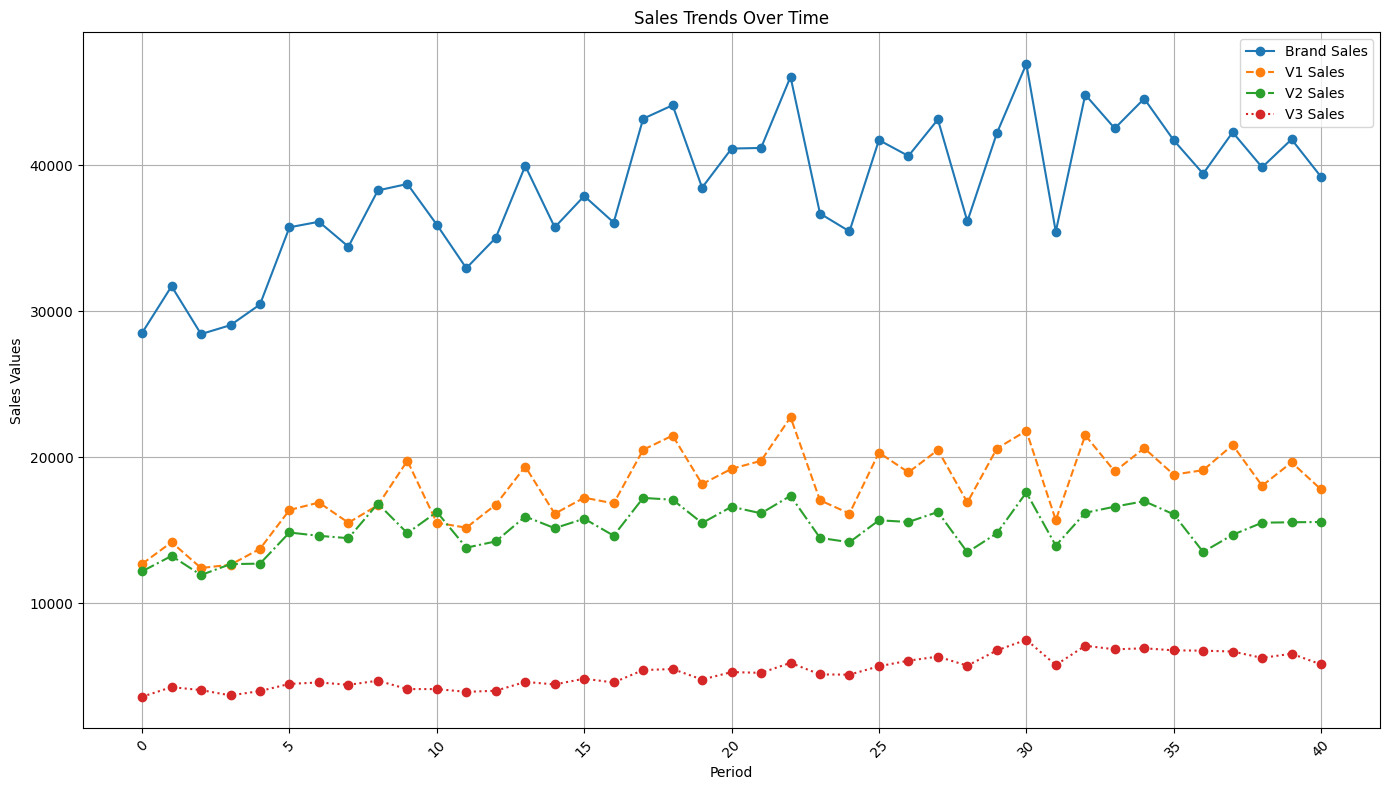

In [72]:
# Plot the sales columns in one chart
plt.figure(figsize=(14, 8))
plt.plot(Media_Sales_data.index, Media_Sales_data['Value_Brand_sales'], label='Brand Sales', marker='o', linestyle='-')
plt.plot(Media_Sales_data.index, Media_Sales_data['Value_V1_sales'], label='V1 Sales', marker='o', linestyle='--')
plt.plot(Media_Sales_data.index, Media_Sales_data['Value_V2_sales'], label='V2 Sales', marker='o', linestyle='-.')
plt.plot(Media_Sales_data.index, Media_Sales_data['Value_V3_sales'], label='V3 Sales', marker='o', linestyle=':')

# Customize the chart
plt.title('Sales Trends Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

Brand is having Highest sale

V3 lowest selling

## Time Series Visualization of Key Sales Metrics with Highlighted Peak Values

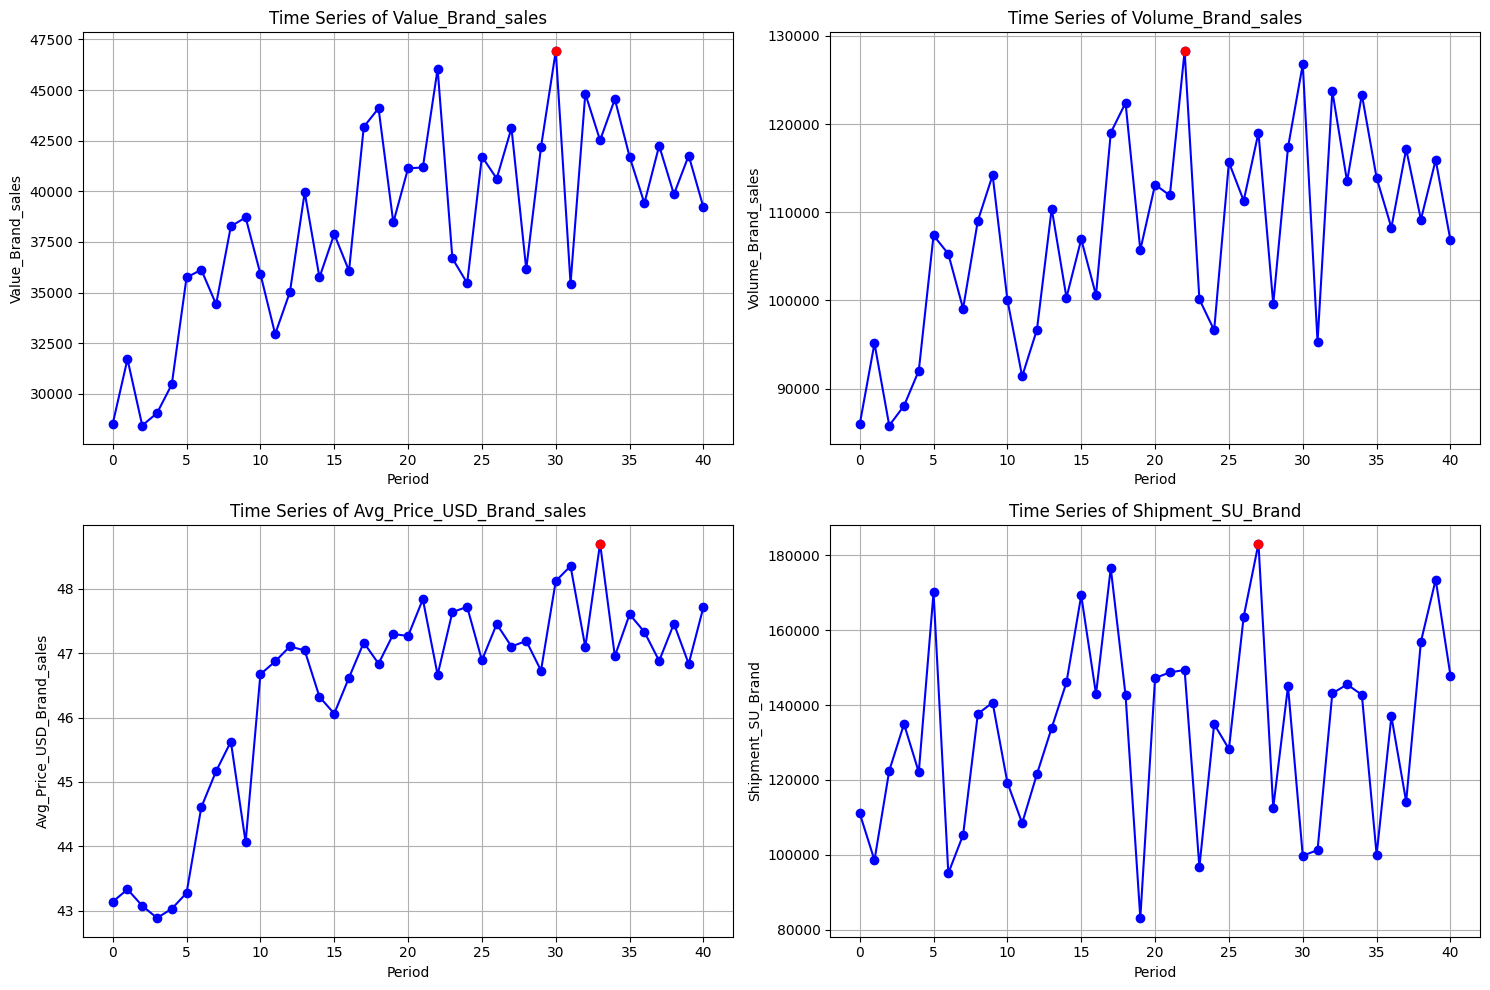

In [73]:

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Updated to 2x2 subplots

# List of metrics to plot
metrics = ['Value_Brand_sales', 'Volume_Brand_sales', 'Avg_Price_USD_Brand_sales', 'Shipment_SU_Brand']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    # Plot the time series
    axs[i].plot(Media_Sales_data.index, Media_Sales_data[metric], marker='o', linestyle='-', color='b')
    
    # Highlight the highest value in red
    max_value = Media_Sales_data[metric].max()
    max_index = Media_Sales_data[metric].idxmax()
    axs[i].plot(max_index, max_value, 'ro')  # Red circle at the highest point

    # Set plot title and labels
    axs[i].set_title(f'Time Series of {metric}')
    axs[i].set_xlabel('Period')
    axs[i].set_ylabel(metric)
    axs[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Time Series of Avg_price_USD_Brand_sales is having peak value between 45000-47500

Time Series of Avg_price_USD_V1_sales is having peak value between 120000-130000

Time Series of Avg_price_USD_V2_sales is having peak value between 48-50

Time Series of Avg_price_USD_V3_sales is having peak value upto 180000


## Heatmap for Correlation between Sales Metrics

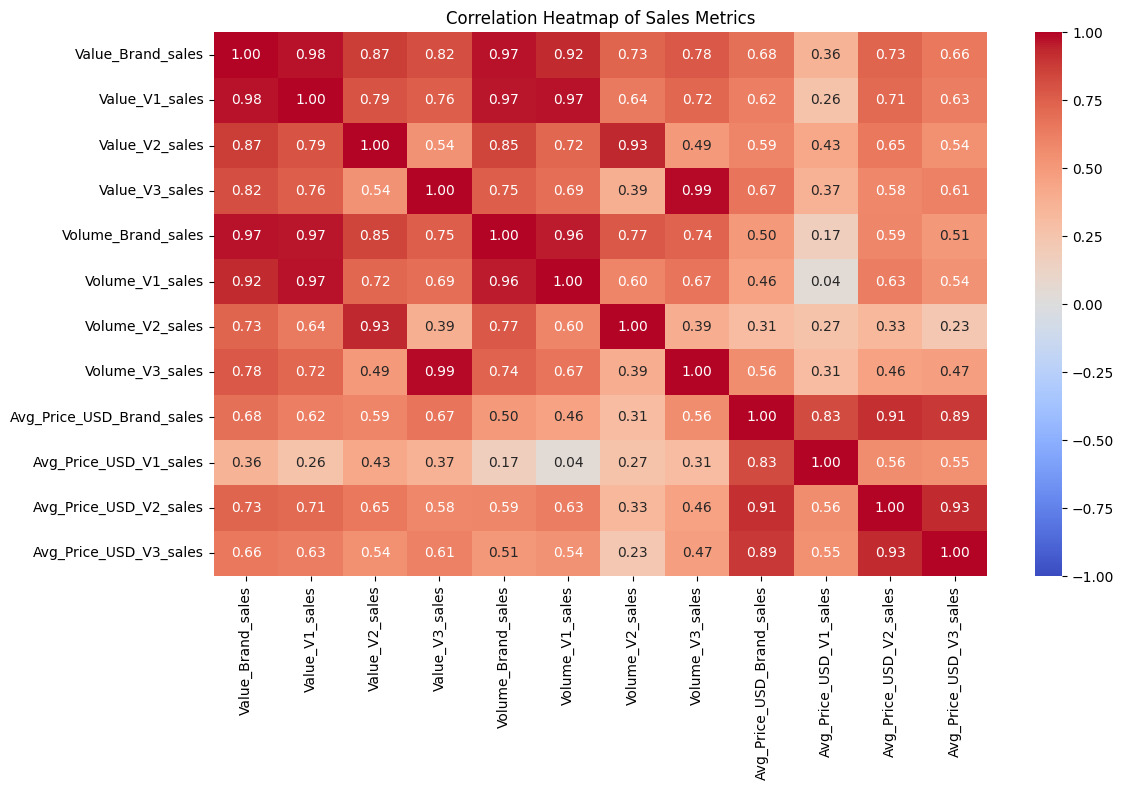

In [74]:
import seaborn as sns

# Select the columns that are numeric
sales_columns = [
    'Value_Brand_sales', 'Value_V1_sales', 'Value_V2_sales', 'Value_V3_sales',
    'Volume_Brand_sales', 'Volume_V1_sales', 'Volume_V2_sales', 'Volume_V3_sales',
    'Avg_Price_USD_Brand_sales', 'Avg_Price_USD_V1_sales', 'Avg_Price_USD_V2_sales', 'Avg_Price_USD_V3_sales'
]

# Convert columns to numeric
Media_Sales_data[sales_columns] = Media_Sales_data[sales_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = Media_Sales_data[sales_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sales Metrics')
plt.tight_layout()
plt.show()


Value_Brand_sales is strongly correlated with Value_V1_sales (0.98), Volume_Brand_sales (0.97)
Volume_V3_sales has a high correlation with Value_V3_sales (0.99), suggesting a close link between sales volume and value for specific variants.
Volume_V2_sales has a moderate positive correlation with Avg_Price_USD_V2_sales (0.39)
There are high correlations between average prices across different variants, such as Avg_Price_USD_Brand_sales and Avg_Price_USD_V3_sales (0.89)
Some correlations between volume sales and certain pricing metrics, such as Volume_V1_sales and Avg_Price_USD_V1_sales (0.04)
There is one slightly negative correlation (Volume_V1_sales and Avg_Price_USD_V1_sales), suggesting that an increase in price .

## Comparison of Impressions and Clicks for Brand and V1 iMedia Over Time

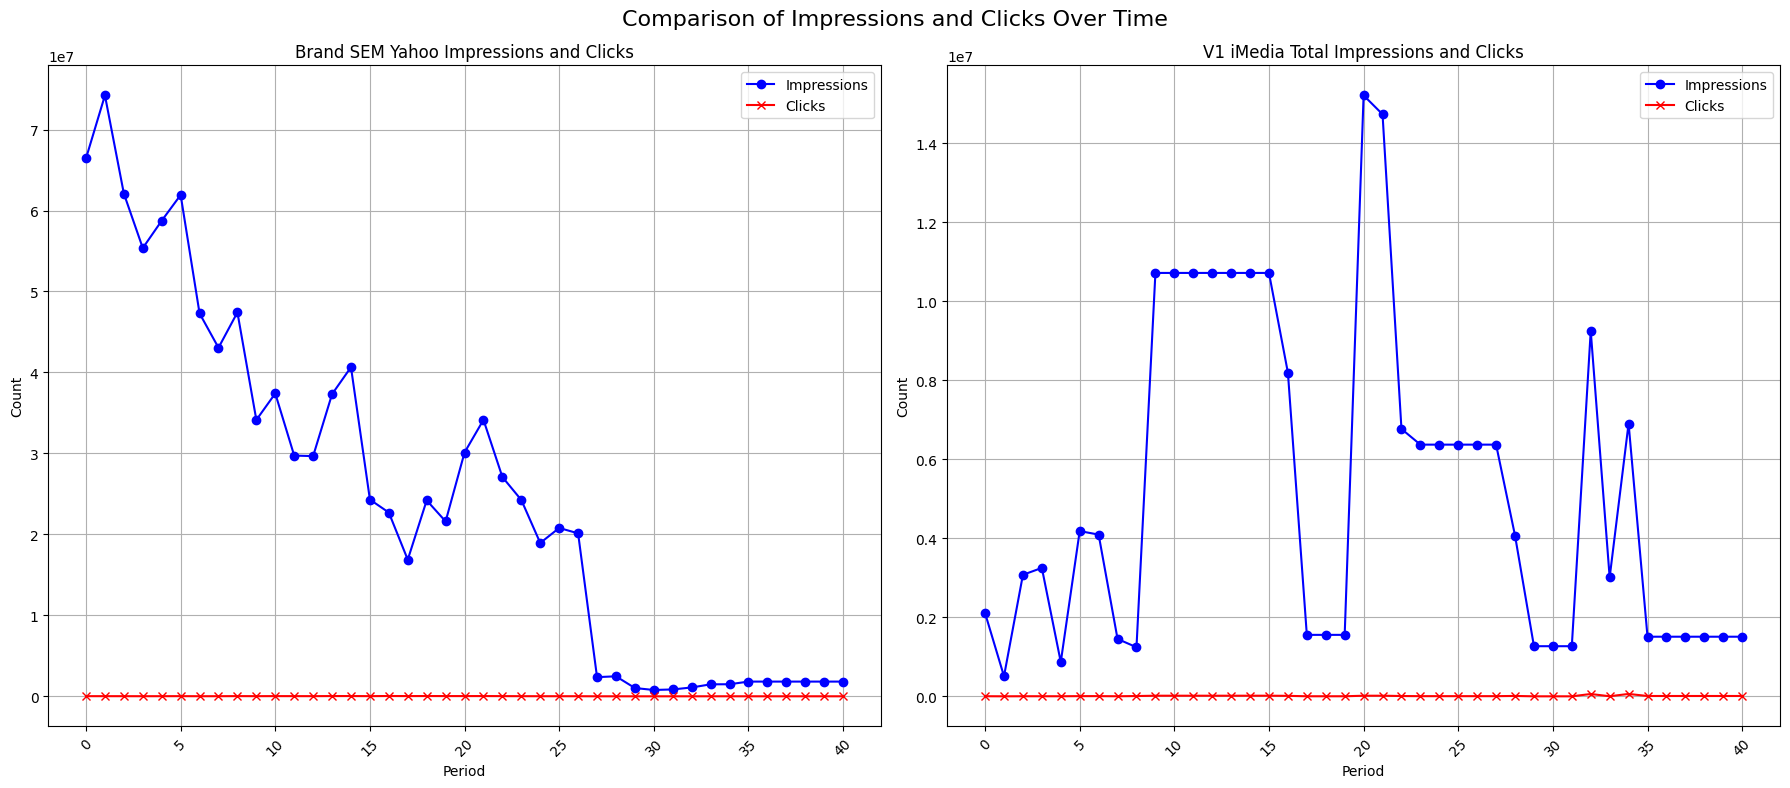

In [75]:


# Create subplots with 1 row and 2 columns (side by side)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Set a title for the entire figure
fig.suptitle('Comparison of Impressions and Clicks Over Time', fontsize=16)

# Plot first set of impressions and clicks
axs[0].plot(Media_Sales_data.index, Media_Sales_data['Brand_Search_SEM_Yahoo_impression_Digital'], label='Impressions', color='blue', marker='o')
axs[0].plot(Media_Sales_data.index, Media_Sales_data['Brand_SEM_Yahoo_Clicks_Digital'], label='Clicks', color='red', marker='x')
axs[0].set_title('Brand SEM Yahoo Impressions and Clicks')
axs[0].set_xlabel('Period')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()
axs[0].grid(True)

# Plot second set of impressions and clicks
axs[1].plot(Media_Sales_data.index, Media_Sales_data['V1_iMedia_Total_Impressions_Digital'], label='Impressions', color='blue', marker='o')
axs[1].plot(Media_Sales_data.index, Media_Sales_data['V1_iMedia_Total_Clicks_Digital'], label='Clicks', color='red', marker='x')
axs[1].set_title('V1 iMedia Total Impressions and Clicks')
axs[1].set_xlabel('Period')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Brand SEM Yahoo shows a steady decline in impressions over time

while V1 iMedia impressions fluctuate with large spikes and drops.
Clicks remain consistently low across both platforms, indicating low engagement. The disparity suggests different performance dynamics, with both channels showing low click-through rates.



## Line Plot of Average Sales Price Over Time

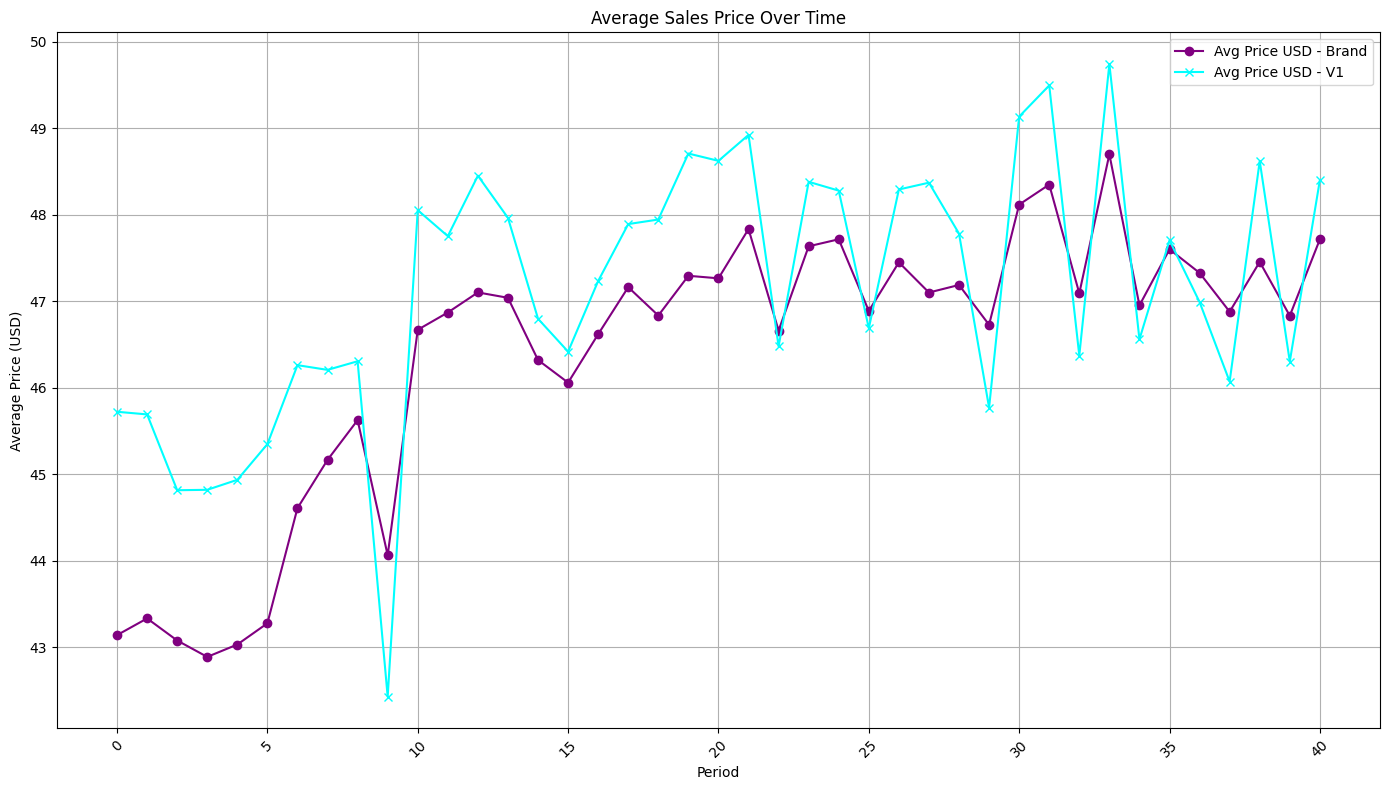

In [76]:
plt.figure(figsize=(14, 8))

# Plot average sales price over time for different brands
plt.plot(Media_Sales_data.index, Media_Sales_data['Avg_Price_USD_Brand_sales'], label='Avg Price USD - Brand', color='purple', marker='o')
plt.plot(Media_Sales_data.index, Media_Sales_data['Avg_Price_USD_V1_sales'], label='Avg Price USD - V1', color='cyan', marker='x')

# Customize the plot
plt.title('Average Sales Price Over Time')
plt.xlabel('Period')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Both Brand and V1 prices fluctuate over time.

V1's price is generally higher than the Brand's price.

Both lines show similar patterns of fluctuation.

V1's price is more volatile than the Brand's price.

## Scatter Plot of Impressions vs Sales (Brand)

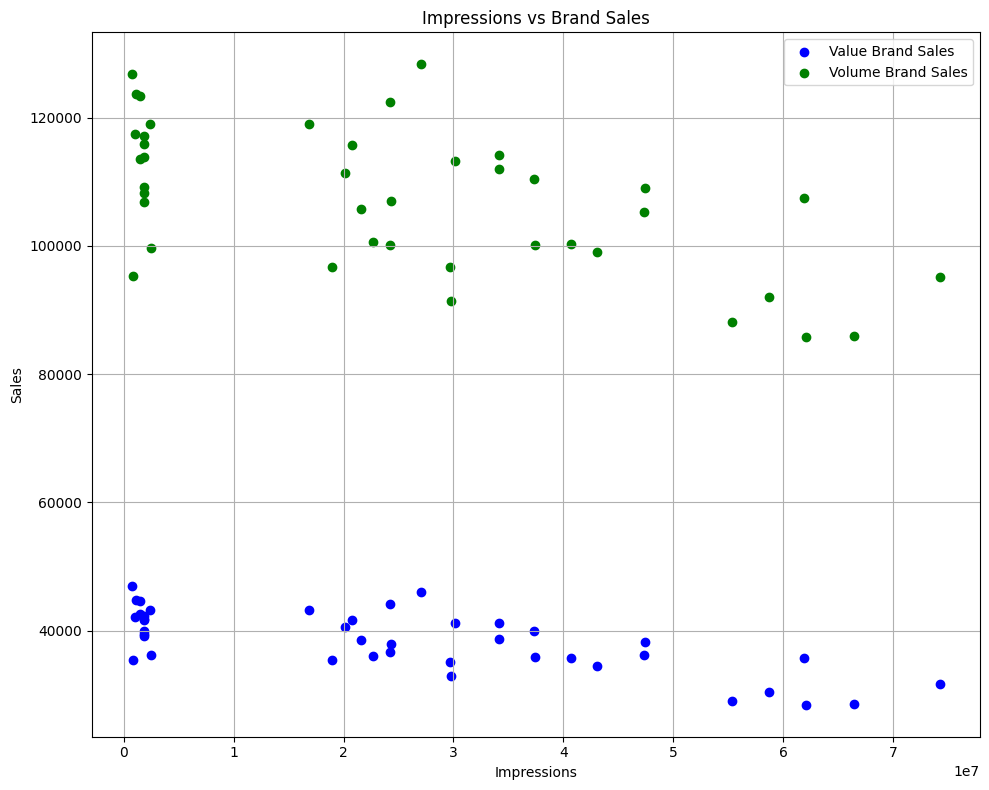

In [77]:
plt.figure(figsize=(10, 8))

# Scatter plot for impressions vs brand sales (Value and Volume)
plt.scatter(Media_Sales_data['Brand_Search_SEM_Yahoo_impression_Digital'], Media_Sales_data['Value_Brand_sales'], color='blue', label='Value Brand Sales')
plt.scatter(Media_Sales_data['Brand_Search_SEM_Yahoo_impression_Digital'], Media_Sales_data['Volume_Brand_sales'], color='green', label='Volume Brand Sales')

# Customize the plot
plt.title('Impressions vs Brand Sales')
plt.xlabel('Impressions')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Impressions and Sales show a positive correlation for both brands.
    
Value Brand Sales are generally lower than Volume Brand Sales.

Both brands show a wide range of sales for similar impression levels.

Increasing impressions generally leads to increased sales for both brands.

## Boxplots for Outlier Detection

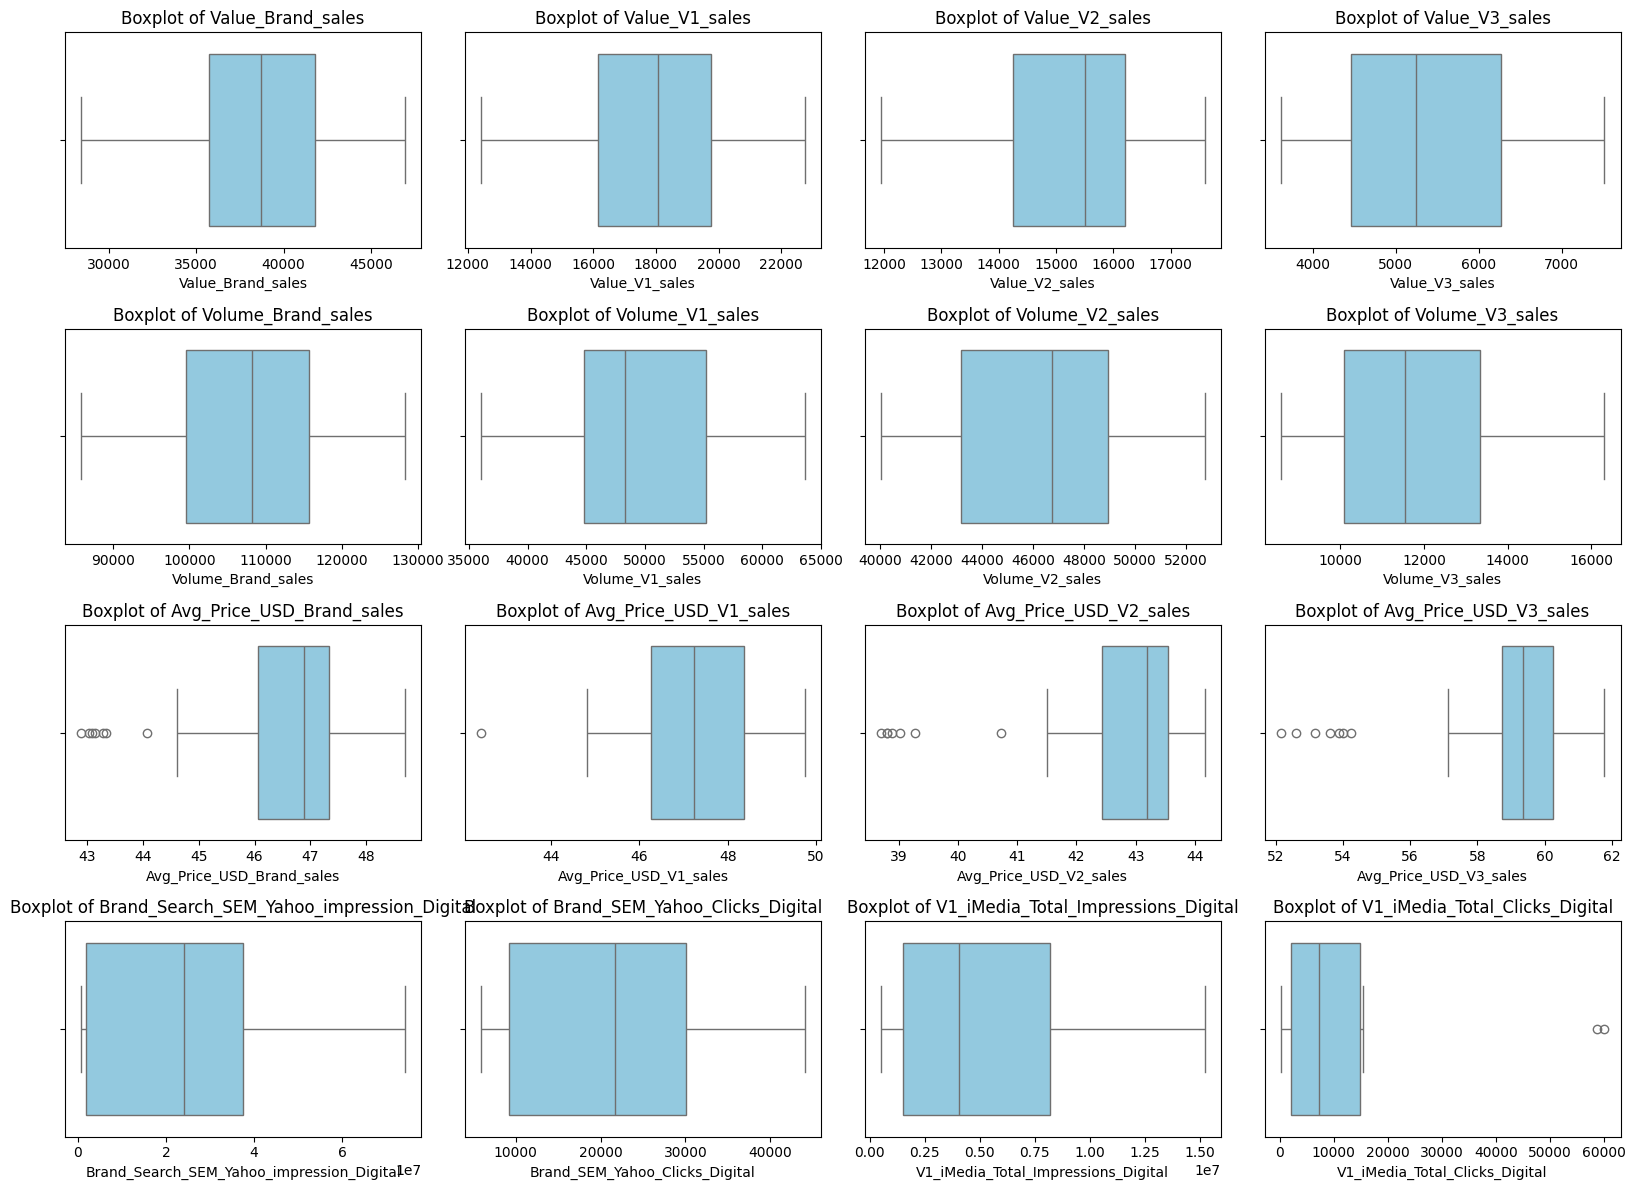

In [78]:
numerical_columns = [
    'Value_Brand_sales', 'Value_V1_sales', 'Value_V2_sales', 'Value_V3_sales',
    'Volume_Brand_sales', 'Volume_V1_sales', 'Volume_V2_sales', 'Volume_V3_sales',
    'Avg_Price_USD_Brand_sales', 'Avg_Price_USD_V1_sales', 'Avg_Price_USD_V2_sales', 'Avg_Price_USD_V3_sales',
    'Brand_Search_SEM_Yahoo_impression_Digital', 'Brand_SEM_Yahoo_Clicks_Digital',
    'V1_iMedia_Total_Impressions_Digital', 'V1_iMedia_Total_Clicks_Digital'
]
# Boxplot for outlier detection
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid to fit all the boxplots
    sns.boxplot(x=Media_Sales_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

Value_Brand_sales vs Avg_Price_USD_Brand_sales: Slight positive trend, weak correlation.

Value_V1_sales vs Avg_Price_USD_V1_sales: No clear trend, weak or no correlation.

Value_V2_sales vs Avg_Price_USD_V2_sales: Possible weak positive trend.

Value_V3_sales vs Avg_Price_USD_V3_sales: Slight positive trend, potential weak correlation.

In [79]:
# Add a new column that sums v1_sales, v2_sales, and v3_sales
Media_Sales_data['Sum_v_sales'] = Media_Sales_data['Value_V1_sales'] + Media_Sales_data['Value_V2_sales'] + Media_Sales_data['Value_V3_sales']

# Check if Brand_sales matches the sum of v1_sales, v2_sales, and v3_sales
Media_Sales_data['Check'] = Media_Sales_data['Value_Brand_sales'] == Media_Sales_data['Sum_v_sales']

# Display rows where Brand_sales is not equal to the sum
discrepancies = Media_Sales_data[~Media_Sales_data['Check']]


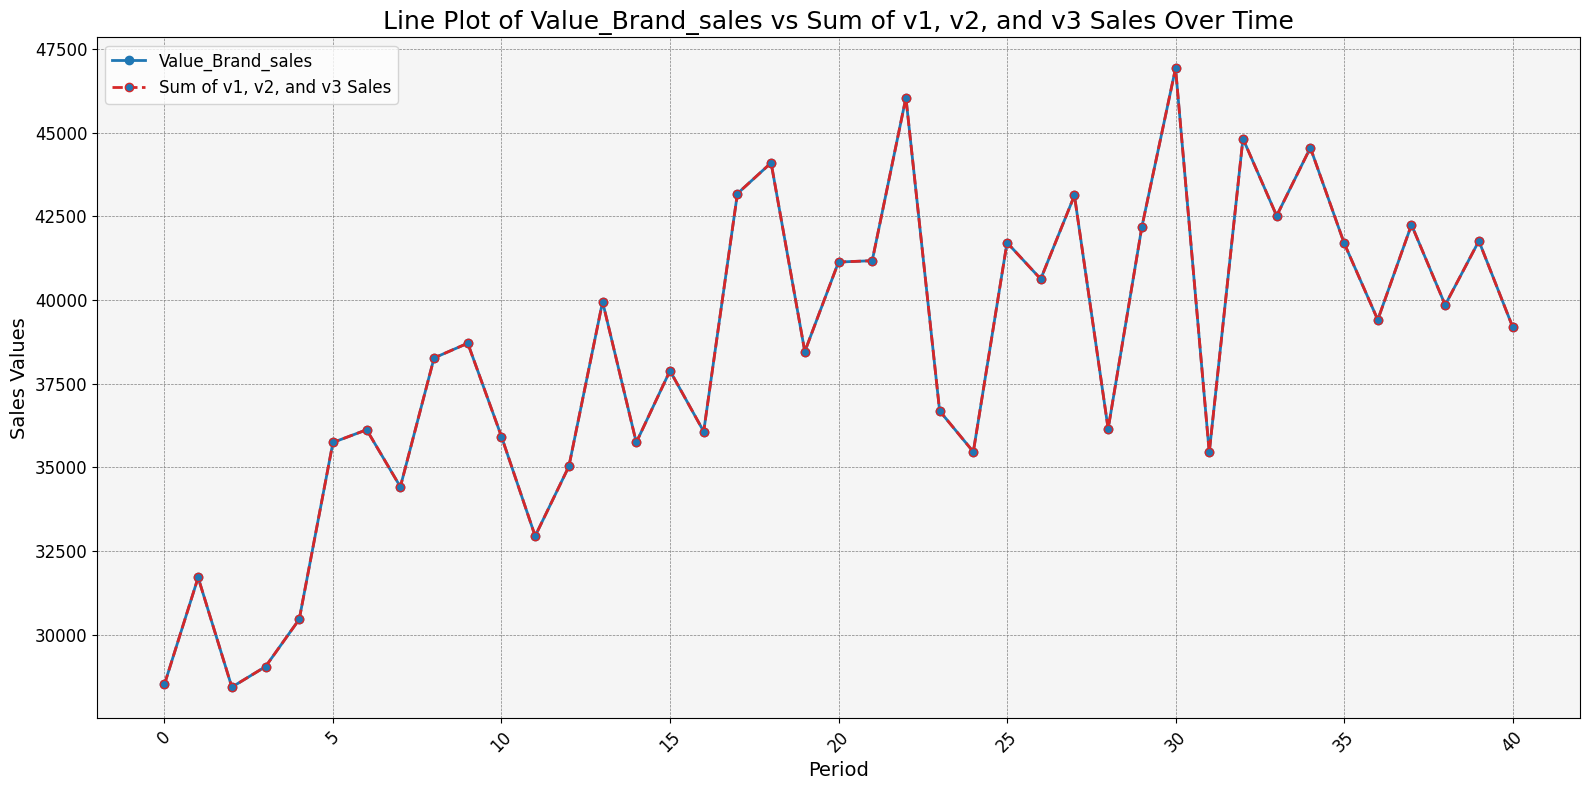

In [80]:

Media_Sales_data.sort_index(inplace=True)

# Plot the data
plt.figure(figsize=(16, 8))

# Plot Value_Brand_sales with blue points and a line
plt.plot(
    Media_Sales_data.index, Media_Sales_data['Value_Brand_sales'],
    label='Value_Brand_sales', marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=6
)

# Plot Sum_v_sales with blue points and a red line
plt.plot(
    Media_Sales_data.index, Media_Sales_data['Sum_v_sales'],
    label='Sum of v1, v2, and v3 Sales', marker='o', linestyle='--', color='#d62728', linewidth=2, markersize=6, markerfacecolor='#1f77b4'
)

# Customizing the plot
plt.title('Line Plot of Value_Brand_sales vs Sum of v1, v2, and v3 Sales Over Time', fontsize=18)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Sales Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper left')

# Adding background color for better readability
plt.gca().set_facecolor('#f5f5f5')

plt.tight_layout()

# Display the plot
plt.show()



## Historic Value

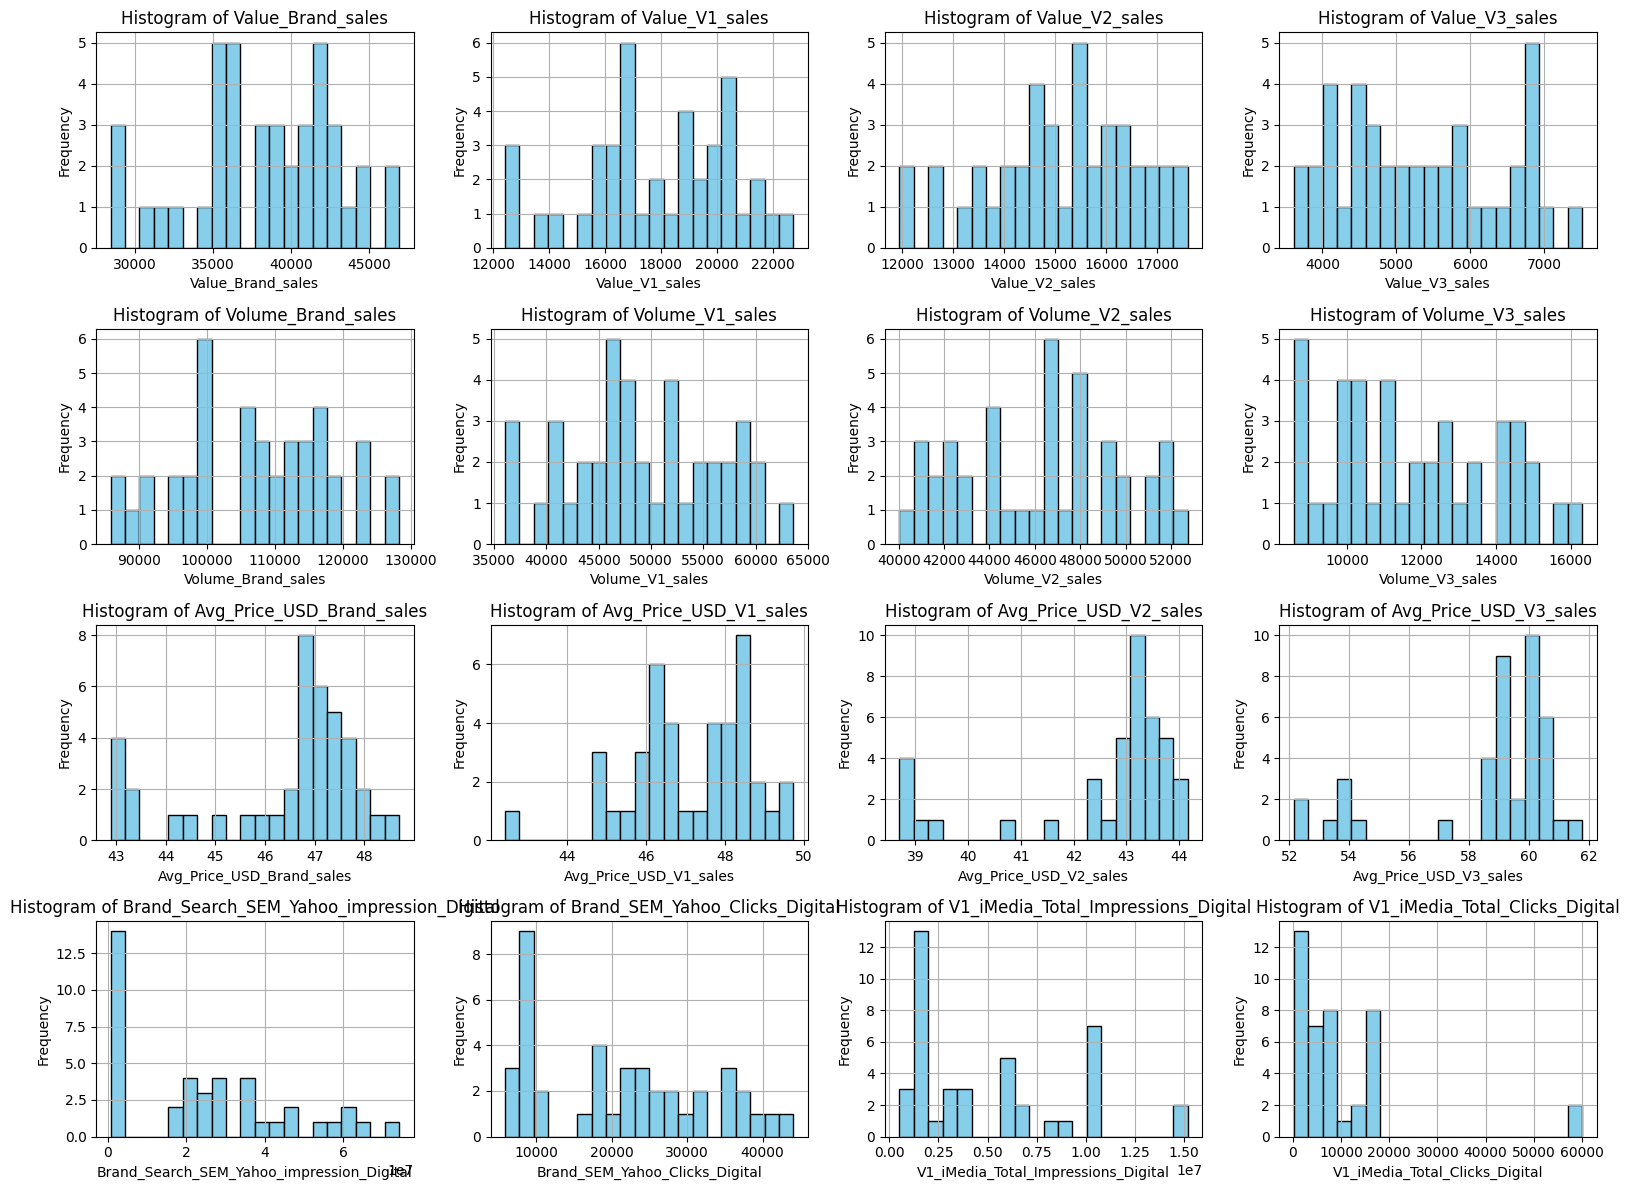

In [81]:
# Plot histograms for numerical features
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for all histograms
    Media_Sales_data[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Pairing Plot

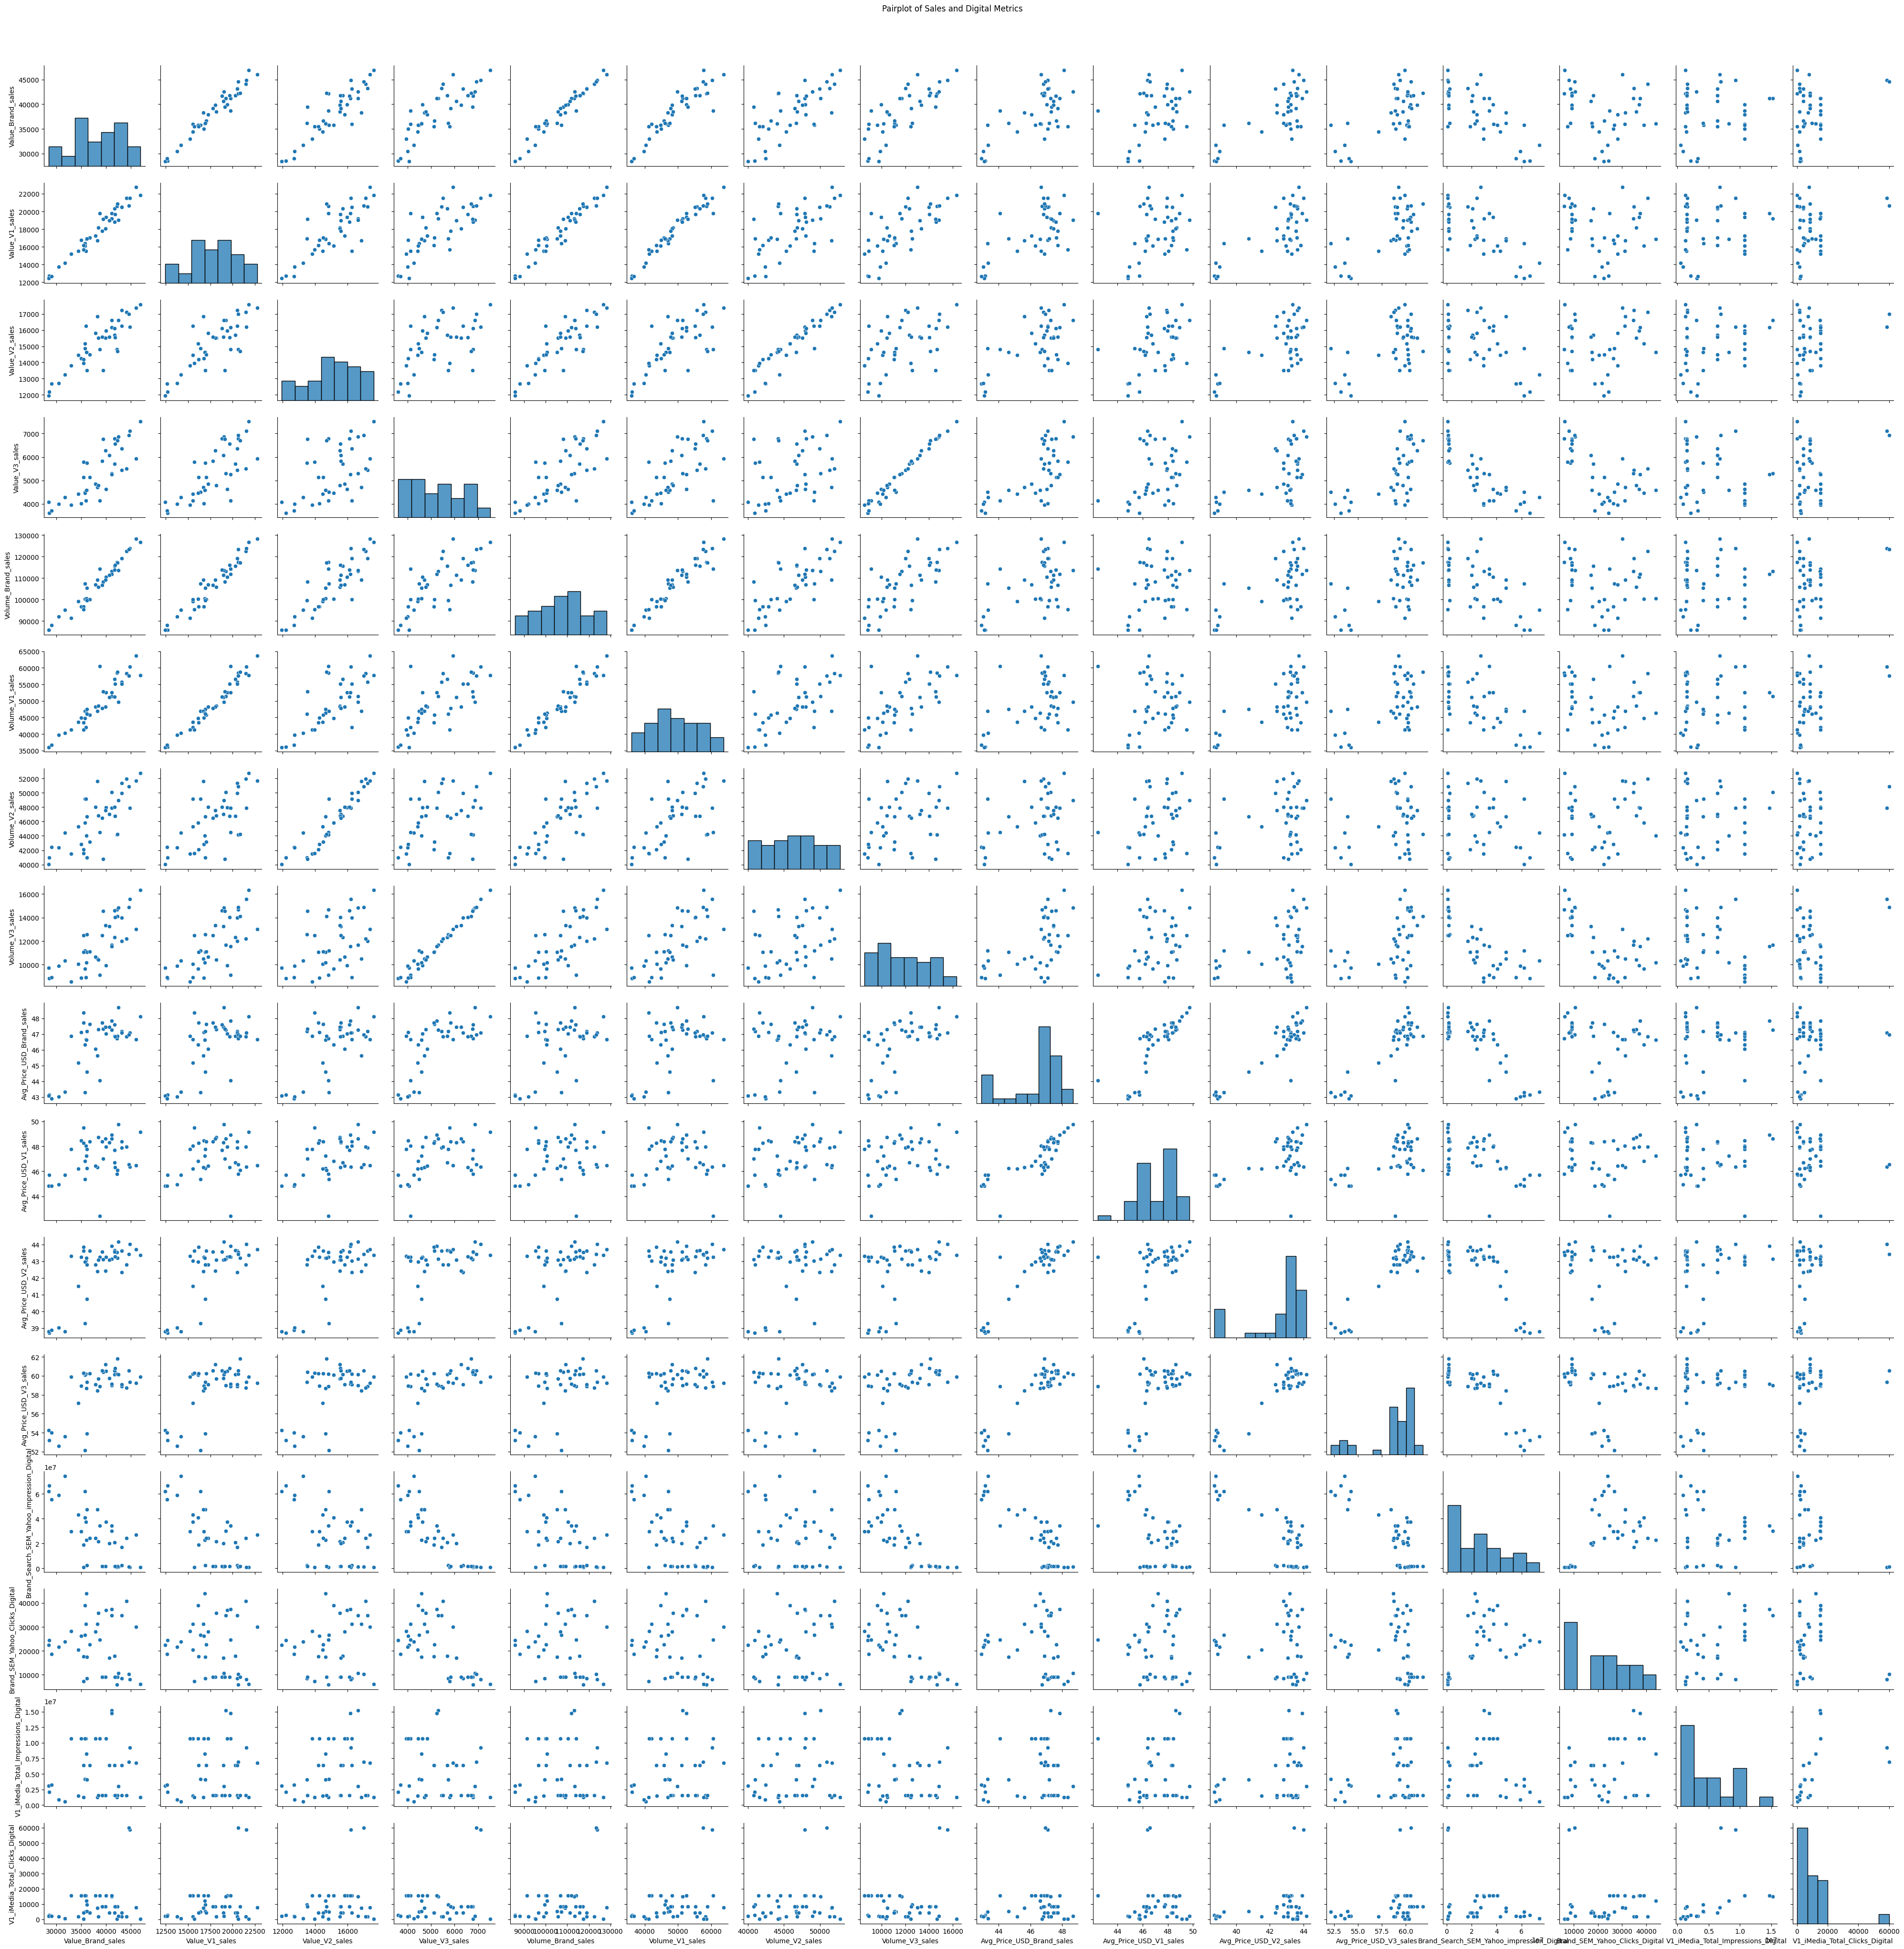

In [82]:
sns.pairplot(Media_Sales_data[numerical_columns])
plt.suptitle('Pairplot of Sales and Digital Metrics', y=1.02)
plt.tight_layout()
plt.show()


## Pie Chart Total Sales Distribution by Category

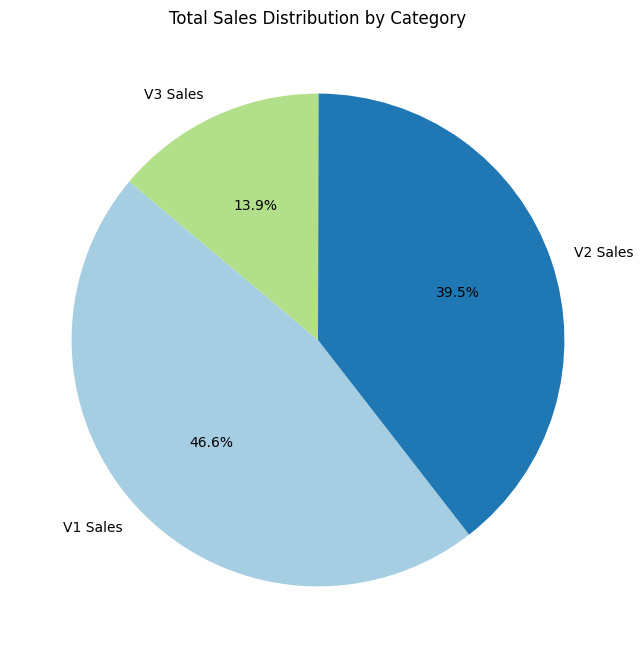

In [83]:

# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data.index = pd.to_datetime(Media_Sales_data.index)

# Extract the year from the 'Period' index and create a 'Year' column
Media_Sales_data['Year'] = Media_Sales_data.index.year

# Calculate total sales per year for Brand, V1, V2, and V3

total_sales_v1 = Media_Sales_data['Value_V1_sales'].sum()
total_sales_v2 = Media_Sales_data['Value_V2_sales'].sum()
total_sales_v3 = Media_Sales_data['Value_V3_sales'].sum()

# Data for the pie chart
sales_data = [total_sales_v1, total_sales_v2, total_sales_v3]
labels = ['V1 Sales', 'V2 Sales', 'V3 Sales']
colors = plt.cm.Paired.colors

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sales_data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)

# Title for the pie chart
plt.title('Total Sales Distribution by Category')

# Show the plot
plt.show()



Brand Sales have occupied half of the pie chart 

V1 sales have occupied 1/4 of the Pie chart 

Reamining is occupied with V2 and V3 sales

## Value vs Price Scatter Plot

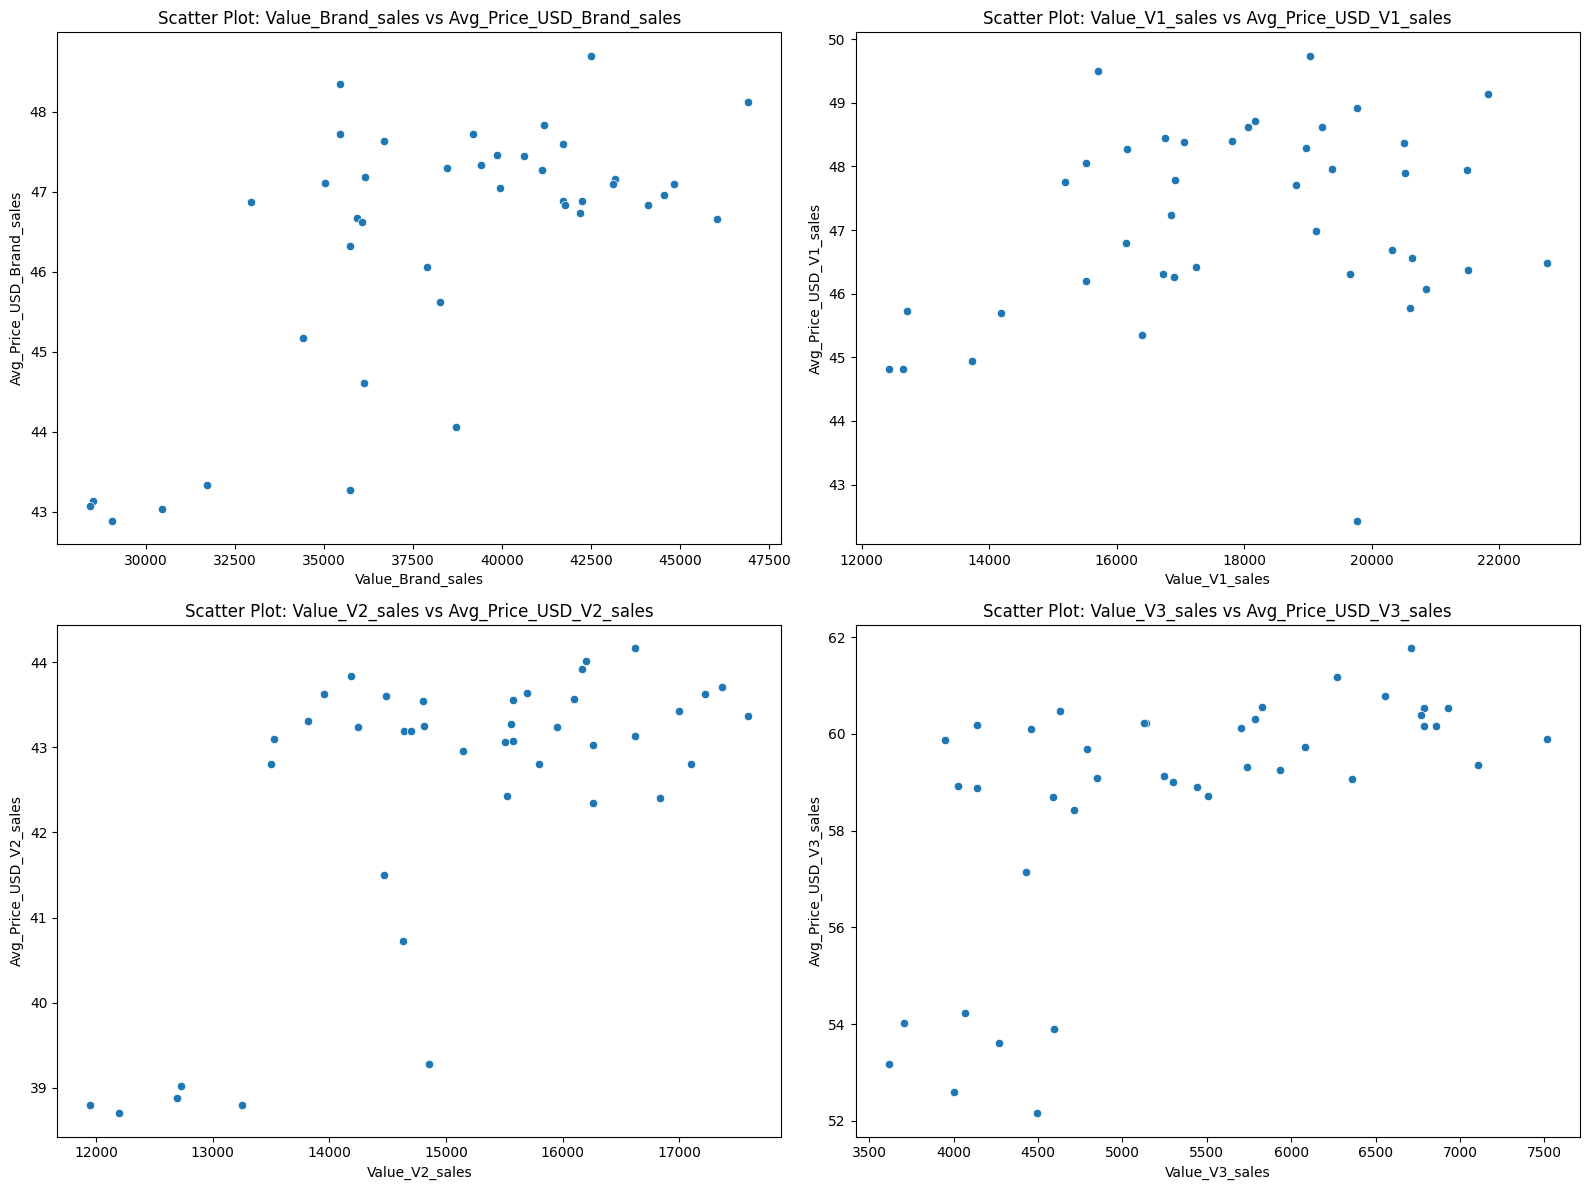

In [84]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=Media_Sales_data['Value_Brand_sales'], y=Media_Sales_data['Avg_Price_USD_Brand_sales'])
plt.title('Scatter Plot: Value_Brand_sales vs Avg_Price_USD_Brand_sales')

plt.subplot(2, 2, 2)
sns.scatterplot(x=Media_Sales_data['Value_V1_sales'], y=Media_Sales_data['Avg_Price_USD_V1_sales'])
plt.title('Scatter Plot: Value_V1_sales vs Avg_Price_USD_V1_sales')

plt.subplot(2, 2, 3)
sns.scatterplot(x=Media_Sales_data['Value_V2_sales'], y=Media_Sales_data['Avg_Price_USD_V2_sales'])
plt.title('Scatter Plot: Value_V2_sales vs Avg_Price_USD_V2_sales')

plt.subplot(2, 2, 4)
sns.scatterplot(x=Media_Sales_data['Value_V3_sales'], y=Media_Sales_data['Avg_Price_USD_V3_sales'])
plt.title('Scatter Plot: Value_V3_sales vs Avg_Price_USD_V3_sales')

plt.tight_layout()
plt.show()

Value_Brand_sales vs Avg_Price_USD_Brand_sales: Slight positive trend, weak correlation.

Value_V1_sales vs Avg_Price_USD_V1_sales: No clear trend, weak or no correlation.

Value_V2_sales vs Avg_Price_USD_V2_sales: Possible weak positive trend.

Value_V3_sales vs Avg_Price_USD_V3_sales: Slight positive trend, potential weak correlation.

## Average price SU comparison across brands

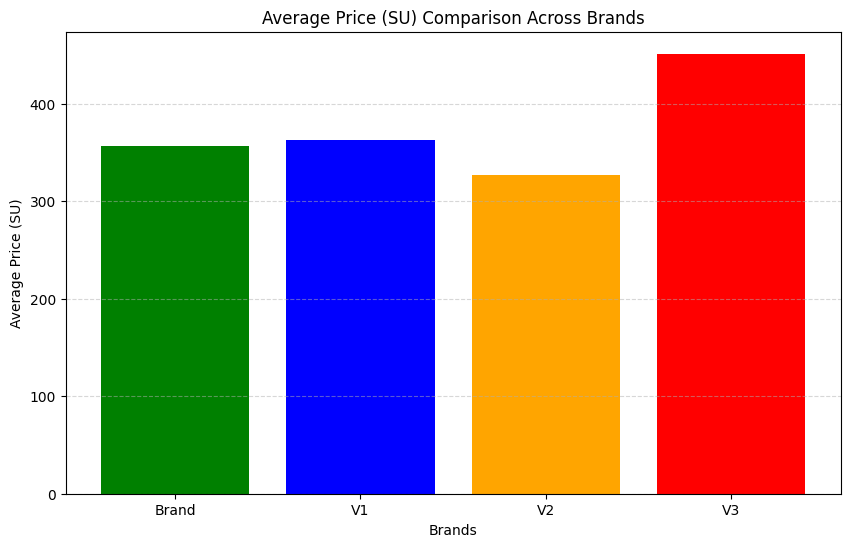

In [85]:
brands = ['Brand', 'V1', 'V2', 'V3']
average_prices_su = [
    Media_Sales_data['Avg_Price_SU_Brand_sales'].mean(),
    Media_Sales_data['Avg_Price_SU_V1_sales'].mean(),
    Media_Sales_data['Avg_Price_SU_V2_sales'].mean(),
    Media_Sales_data['Avg_Price_SU_V3_sales'].mean()
]

# Plot the average prices
plt.figure(figsize=(10, 6))
plt.bar(brands, average_prices_su, color=['green', 'blue', 'orange', 'red'])

# Customize the chart
plt.title('Average Price (SU) Comparison Across Brands')
plt.xlabel('Brands')
plt.ylabel('Average Price (SU)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the chart
plt.show()

V3 is having Highest Average Price(SU) over Brands

V2 is having Comparatively lowest Average Price(SU) than v1,v3 over Brands

## Pie Chart for Sales Share by Year

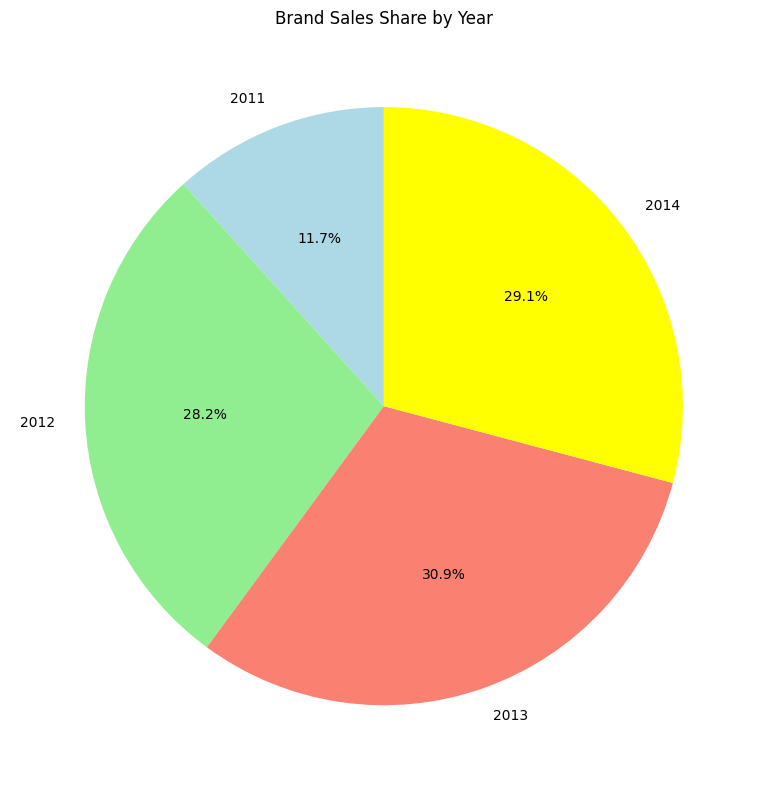

In [86]:
# 3. Pie Chart for Sales Share by Year
# First, ensure the 'Year' column is extracted from the 'Period' or 'Date' column
Media_Sales_data['Year'] = pd.to_datetime(Media_Sales_data['Period']).dt.year

# Calculate sales by year
sales_by_year = Media_Sales_data.groupby('Year')['Value_Brand_sales'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
sales_by_year.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon', 'yellow', 'purple'])
plt.title('Brand Sales Share by Year')
plt.ylabel('')  # Hide y-label for clarity
plt.tight_layout()
plt.show()


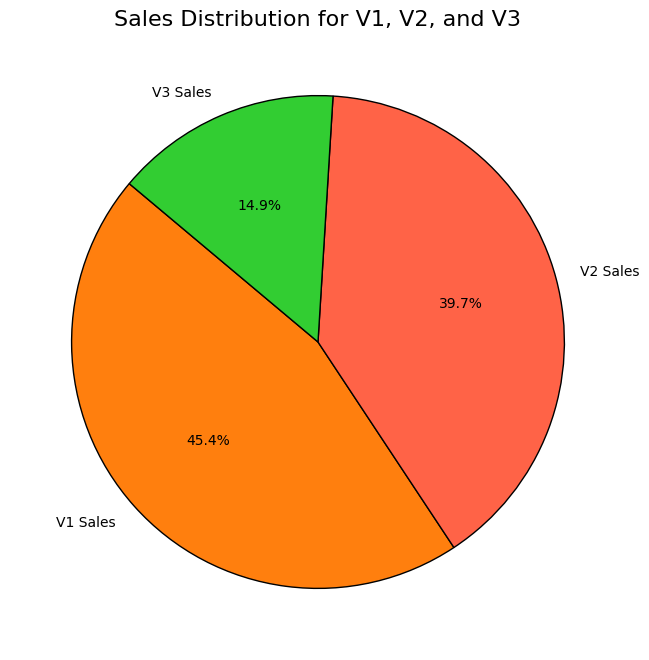

In [87]:
# Aggregate sales data for Pie chart (excluding 'Brand Sales')
sales_values = [
    Media_Sales_data['Value_V1_sales'].iloc[-1],
    Media_Sales_data['Value_V2_sales'].iloc[-1],
    Media_Sales_data['Value_V3_sales'].iloc[-1]
]

labels = ['V1 Sales', 'V2 Sales', 'V3 Sales']
colors = ['#ff7f0e', '#ff6347', '#32cd32']

# Create a Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and show plot
plt.title('Sales Distribution for V1, V2, and V3', fontsize=16)
plt.show()


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

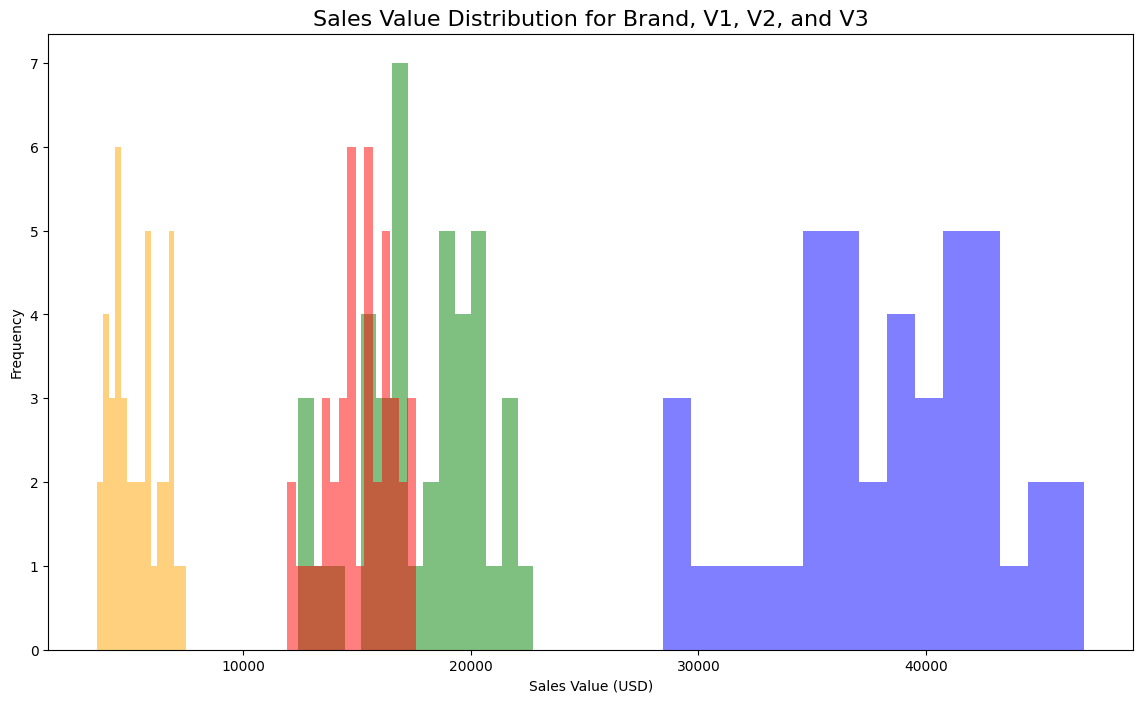

In [88]:
# Plot histograms for Brand vs V1, V2, V3 sales values
plt.figure(figsize=(14, 8))

plt.hist(Media_Sales_data['Value_Brand_sales'], bins=15, alpha=0.5, label='Brand Sales', color='b')
plt.hist(Media_Sales_data['Value_V1_sales'], bins=15, alpha=0.5, label='V1 Sales', color='g')
plt.hist(Media_Sales_data['Value_V2_sales'], bins=15, alpha=0.5, label='V2 Sales', color='r')
plt.hist(Media_Sales_data['Value_V3_sales'], bins=15, alpha=0.5, label='V3 Sales', color='orange')

# Titles and Labels
plt.title('Sales Value Distribution for Brand, V1, V2, and V3', fontsize=16)
plt.xlabel('Sales Value (USD)')
plt.ylabel('Frequency')
plt.legend

## Shipment Volumes Across Brands

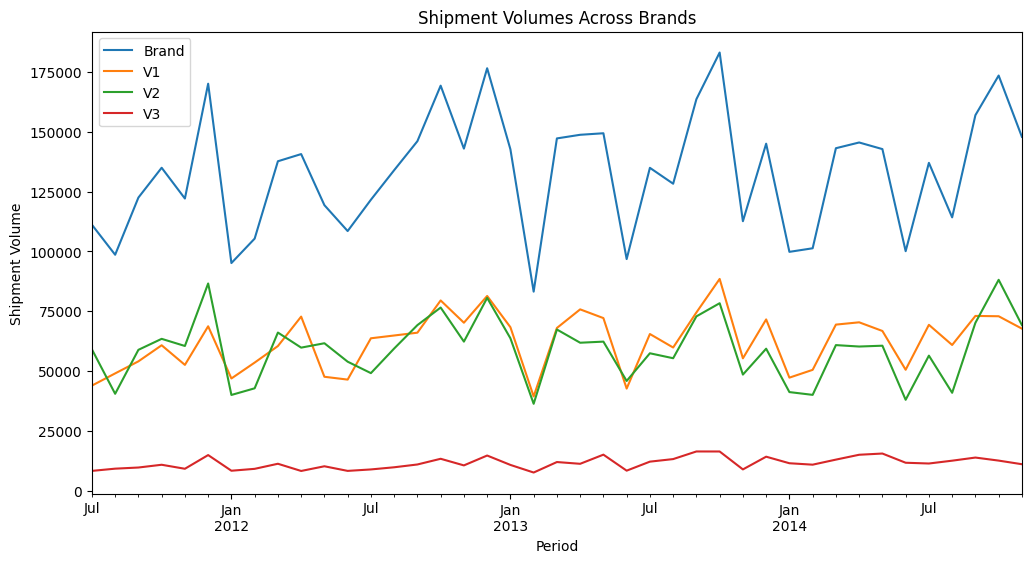

In [89]:
Media_Sales_data[['Period', 'Shipment_SU_Brand', 'Shipment_SU_V1', 'Shipment_SU_V2', 'Shipment_SU_V3']].plot(
    x='Period', kind='line', figsize=(12, 6)
)

# Customizing the plot
plt.xlabel('Period')
plt.ylabel('Shipment Volume')
plt.title('Shipment Volumes Across Brands')

# Adding a legend
plt.legend(['Brand', 'V1', 'V2', 'V3'])

# Displaying the plot
plt.show()

V1 has the highest demand with significant cyclical peaks, V2 shows moderate volumes with occasional peaks, and V3 remains consistently low.

The graph suggests that V1 is likely the most popular product, while V2 and V3 maintain stable but lower shipment volumes.


## Average Price Monthly Trend

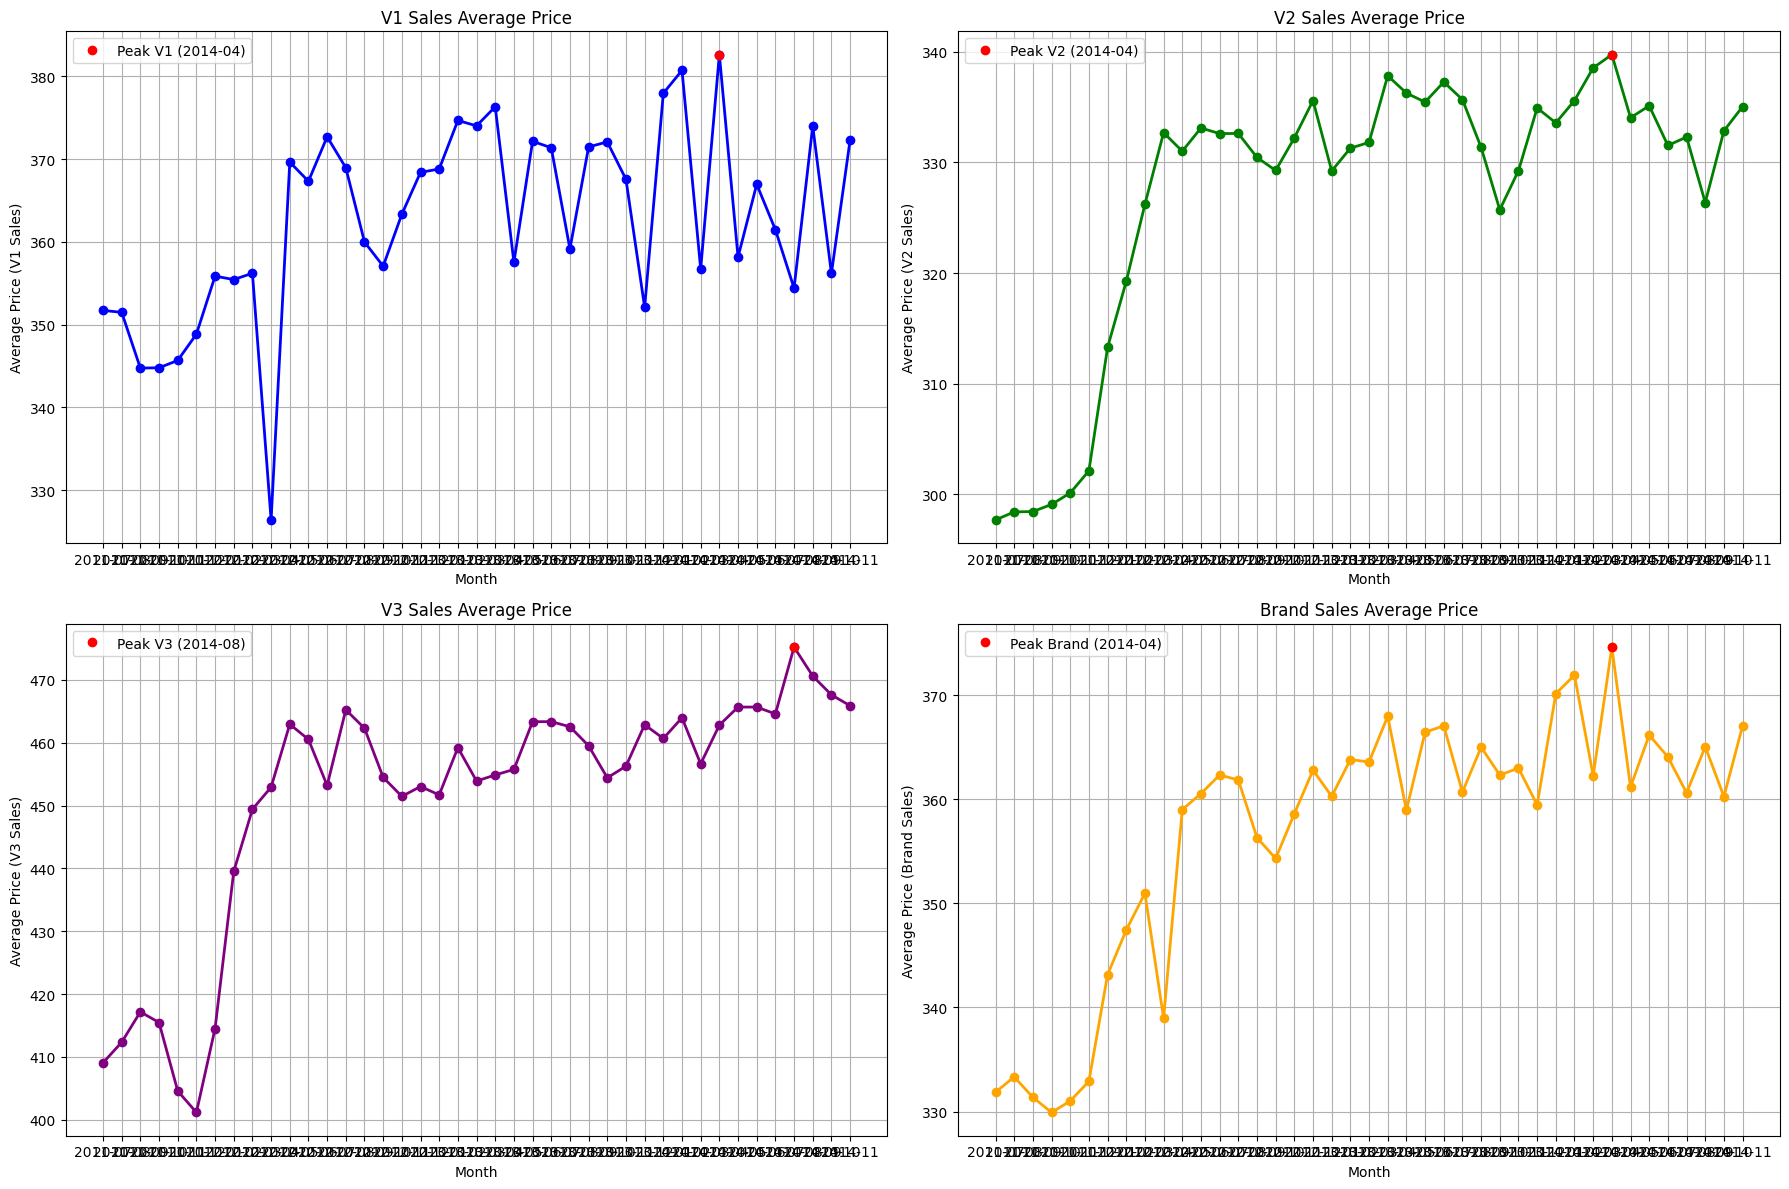

In [90]:

# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate average price for V1, V2, V3, and Brand sales month-wise
avg_price_v1_monthly = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V1_sales'].mean()
avg_price_v2_monthly = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V2_sales'].mean()
avg_price_v3_monthly = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V3_sales'].mean()
avg_price_brand_monthly = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_Brand_sales'].mean()

# Identify peak points (maximum values for each series)
peak_v1 = avg_price_v1_monthly.idxmax(), avg_price_v1_monthly.max()
peak_v2 = avg_price_v2_monthly.idxmax(), avg_price_v2_monthly.max()
peak_v3 = avg_price_v3_monthly.idxmax(), avg_price_v3_monthly.max()
peak_brand = avg_price_brand_monthly.idxmax(), avg_price_brand_monthly.max()

# Create subplots to show all four plots in two rows
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plotting V1 average price
axes[0, 0].plot(avg_price_v1_monthly.index.astype(str), avg_price_v1_monthly, marker='o', color='blue', linewidth=2)
axes[0, 0].plot(peak_v1[0].strftime('%Y-%m'), peak_v1[1], 'ro', label=f'Peak V1 ({peak_v1[0].strftime("%Y-%m")})')  # Highlight peak with red dot
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Price (V1 Sales)')
axes[0, 0].set_title('V1 Sales Average Price')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plotting V2 average price
axes[0, 1].plot(avg_price_v2_monthly.index.astype(str), avg_price_v2_monthly, marker='o', color='green', linewidth=2)
axes[0, 1].plot(peak_v2[0].strftime('%Y-%m'), peak_v2[1], 'ro', label=f'Peak V2 ({peak_v2[0].strftime("%Y-%m")})')  # Highlight peak with red dot
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Price (V2 Sales)')
axes[0, 1].set_title('V2 Sales Average Price')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plotting V3 average price
axes[1, 0].plot(avg_price_v3_monthly.index.astype(str), avg_price_v3_monthly, marker='o', color='purple', linewidth=2)
axes[1, 0].plot(peak_v3[0].strftime('%Y-%m'), peak_v3[1], 'ro', label=f'Peak V3 ({peak_v3[0].strftime("%Y-%m")})')  # Highlight peak with red dot
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Price (V3 Sales)')
axes[1, 0].set_title('V3 Sales Average Price')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plotting Brand average price
axes[1, 1].plot(avg_price_brand_monthly.index.astype(str), avg_price_brand_monthly, marker='o', color='orange', linewidth=2)
axes[1, 1].plot(peak_brand[0].strftime('%Y-%m'), peak_brand[1], 'ro', label=f'Peak Brand ({peak_brand[0].strftime("%Y-%m")})')  # Highlight peak with red dot
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Price (Brand Sales)')
axes[1, 1].set_title('Brand Sales Average Price')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


V1 Sales Average Price:

The graph shows a steady upward trend with some minor fluctuations.

There is a notable peak in 2014-04.

V2 Sales Average Price:

This graph also exhibits a general upward trend.

The price increases significantly from 2013-04 onwards.

There's a peak in 2014-04, similar to the V1 graph.

V3 Sales Average Price:
The V3 graph shows a more pronounced upward trend compared to the others.
The price increases sharply from 2013-04 onwards.
The peak is in 2014-08.

Brand Sales Average Price:
This graph has a less consistent trend compared to the others.
There are periods of rapid price increases and periods of slower growth.
The peak is in 2014-04.

## Brand Sales and Price Monthly Trend Over Period

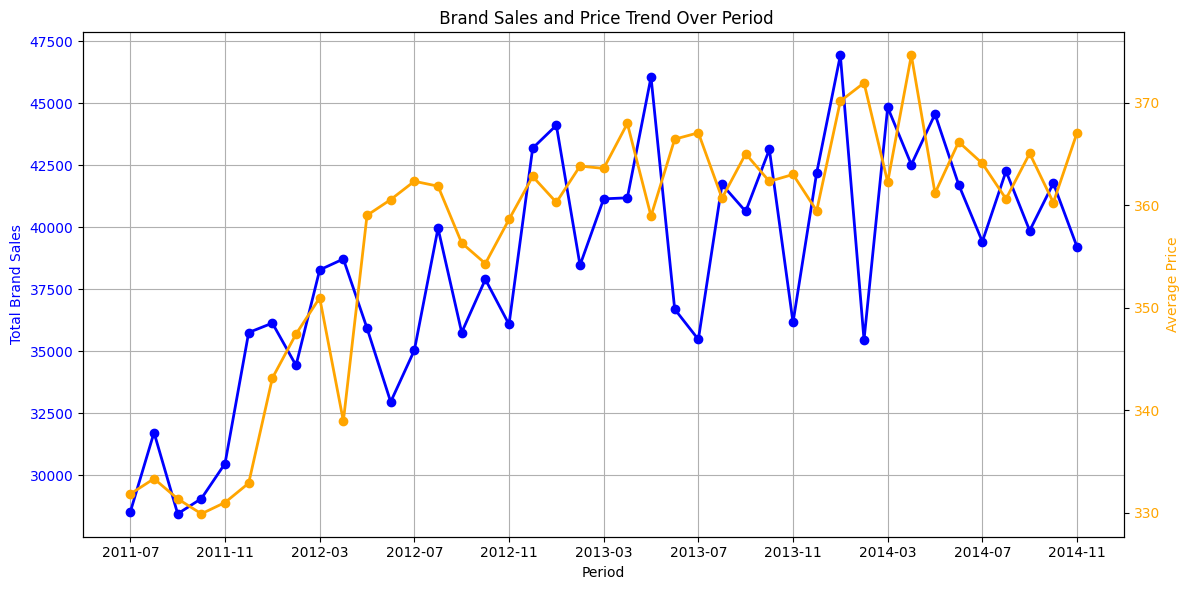

In [91]:
# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate the total sales per period and the average price per period
sales_trend = Media_Sales_data.groupby('Year_Month')['Value_Brand_sales'].sum()
price_trend = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_Brand_sales'].mean()

# Create subplots to show both trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Sales Trend
ax1.plot(sales_trend.index.astype(str), sales_trend, color='blue', label='Brand Sales', marker='o', linewidth=2)
ax1.set_xlabel('Period')
ax1.set_ylabel('Total Brand Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(' Brand Sales and Price Trend Over Period')

# Create a second y-axis for the Price Trend
ax2 = ax1.twinx()
ax2.plot(price_trend.index.astype(str), price_trend, color='orange', label='Average Price', marker='o', linewidth=2)
ax2.set_ylabel('Average Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust x-axis labels to display only the year and month (e.g., '2024-Jan', '2024-Feb', etc.)
num_ticks = len(sales_trend)  # Total number of periods
step = max(1, num_ticks // 10)  # Adjust step size to show fewer ticks (up to 10)
xticks_positions = range(0, num_ticks, step)  # Select the positions for the ticks

# Set the x-ticks manually based on the selected positions
ax1.set_xticks(xticks_positions)
ax1.set_xticklabels([str(sales_trend.index[i])[:7] for i in xticks_positions])  # Shortened labels to 'YYYY-MMM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid and legends
ax1.grid(True)
fig.tight_layout()

# Show the plot
plt.show()



Sales and price generally increase over time.

Price peaks often precede sales peaks.

Sudden price drops lead to sales declines.

Overall, the brand shows growth in both sales and price.

## V1 sales and Price Monthly Trend Over Period

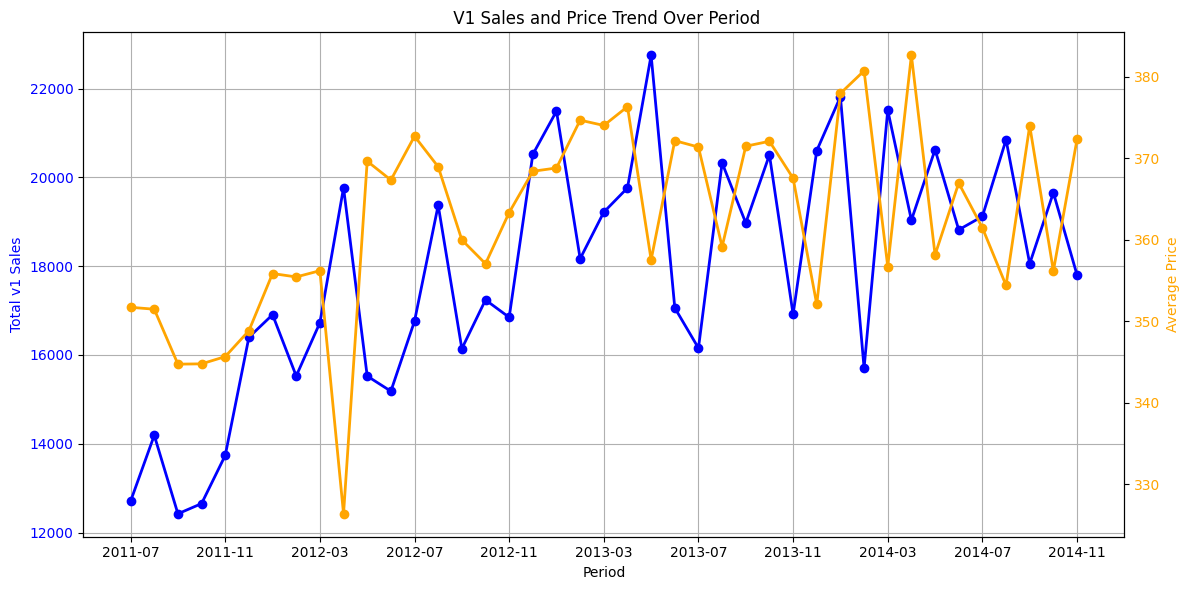

In [92]:

# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate the total sales per period and the average price per period
sales_trend = Media_Sales_data.groupby('Year_Month')['Value_V1_sales'].sum()
price_trend = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V1_sales'].mean()

# Create subplots to show both trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Sales Trend
ax1.plot(sales_trend.index.astype(str), sales_trend, color='blue', label='Brand Sales', marker='o', linewidth=2)
ax1.set_xlabel('Period')
ax1.set_ylabel('Total v1 Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(' V1 Sales and Price Trend Over Period')

# Create a second y-axis for the Price Trend
ax2 = ax1.twinx()
ax2.plot(price_trend.index.astype(str), price_trend, color='orange', label='Average Price', marker='o', linewidth=2)
ax2.set_ylabel('Average Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust x-axis labels to display only the year and month (e.g., '2024-Jan', '2024-Feb', etc.)
num_ticks = len(sales_trend)  # Total number of periods
step = max(1, num_ticks // 10)  # Adjust step size to show fewer ticks (up to 10)
xticks_positions = range(0, num_ticks, step)  # Select the positions for the ticks

# Set the x-ticks manually based on the selected positions
ax1.set_xticks(xticks_positions)
ax1.set_xticklabels([str(sales_trend.index[i])[:7] for i in xticks_positions])  # Shortened labels to 'YYYY-MMM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid and legends
ax1.grid(True)
fig.tight_layout()

# Show the plot
plt.show()



Sales and price fluctuate over time with no clear trend.

Price peaks often precede sales peaks, but the correlation is weak.

Sudden price drops do not always lead to immediate sales declines.

Overall, the brand shows some variation in both sales and price.

## V2 sales and Price Monthly Trend Over Period

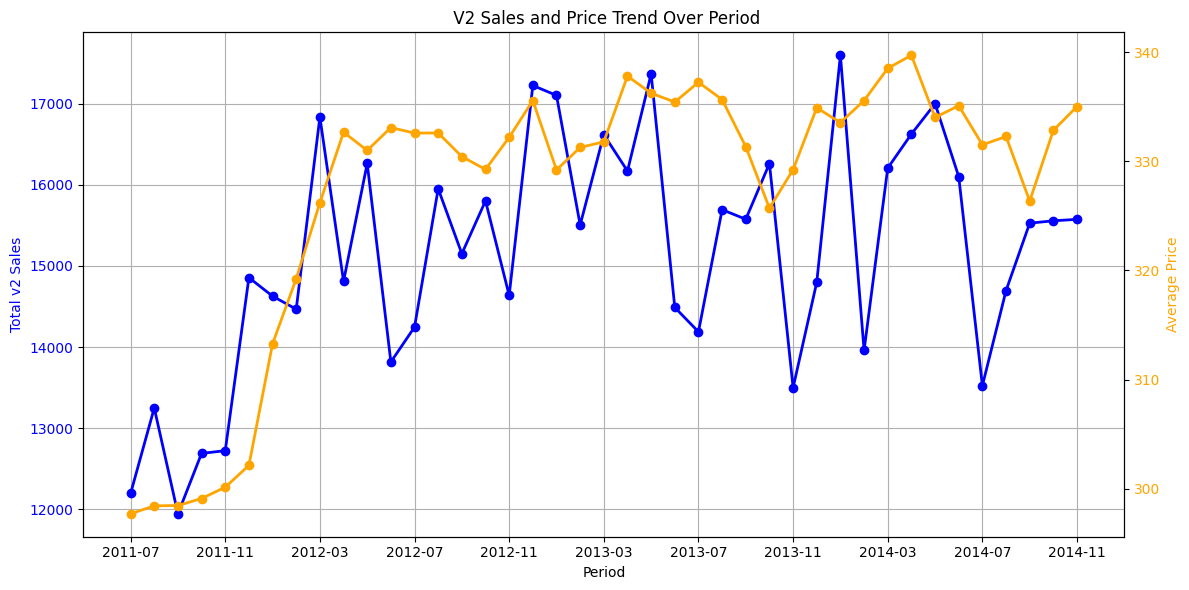

In [93]:

# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate the total sales per period and the average price per period
sales_trend = Media_Sales_data.groupby('Year_Month')['Value_V2_sales'].sum()
price_trend = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V2_sales'].mean()

# Create subplots to show both trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Sales Trend
ax1.plot(sales_trend.index.astype(str), sales_trend, color='blue', label='Brand Sales', marker='o', linewidth=2)
ax1.set_xlabel('Period')
ax1.set_ylabel('Total v2 Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(' V2 Sales and Price Trend Over Period')

# Create a second y-axis for the Price Trend
ax2 = ax1.twinx()
ax2.plot(price_trend.index.astype(str), price_trend, color='orange', label='Average Price', marker='o', linewidth=2)
ax2.set_ylabel('Average Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust x-axis labels to display only the year and month (e.g., '2024-Jan', '2024-Feb', etc.)
num_ticks = len(sales_trend)  # Total number of periods
step = max(1, num_ticks // 10)  # Adjust step size to show fewer ticks (up to 10)
xticks_positions = range(0, num_ticks, step)  # Select the positions for the ticks

# Set the x-ticks manually based on the selected positions
ax1.set_xticks(xticks_positions)
ax1.set_xticklabels([str(sales_trend.index[i])[:7] for i in xticks_positions])  # Shortened labels to 'YYYY-MMM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid and legends
ax1.grid(True)
fig.tight_layout()

# Show the plot
plt.show()



Sales and price fluctuate over time with no clear trend.

Price peaks often precede sales peaks, but the correlation is not strong.

Sudden price drops do not always lead to immediate sales declines.

Overall, the brand shows some variation in both sales and price.

## V3 sales and Price Monthly Trend Over Period

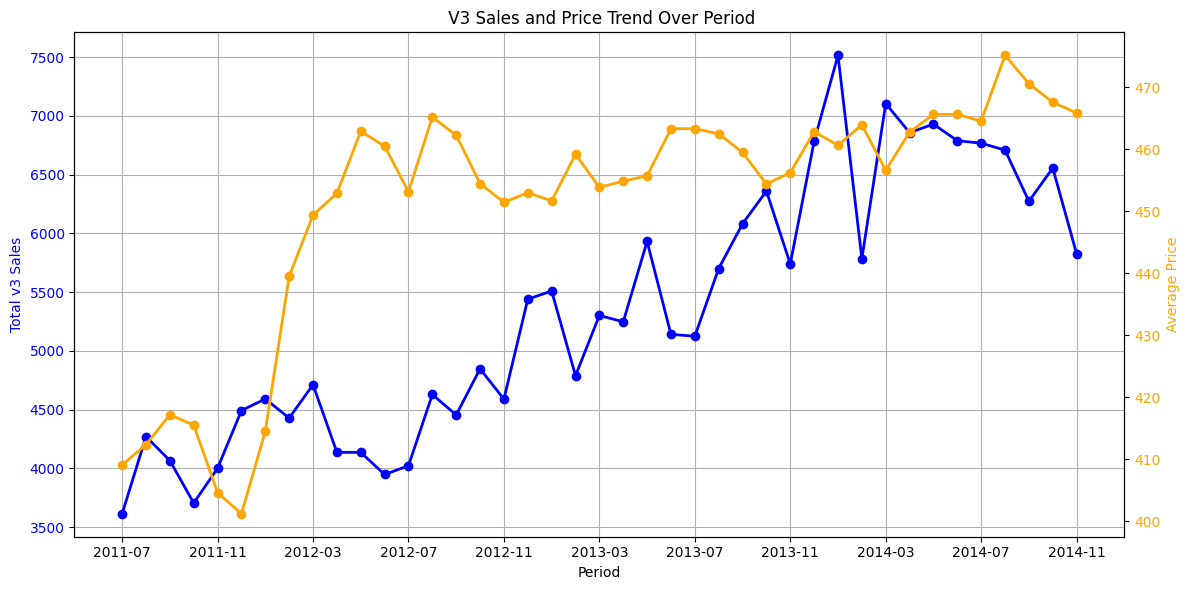

In [94]:
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate the total sales per period and the average price per period
sales_trend = Media_Sales_data.groupby('Year_Month')['Value_V3_sales'].sum()
price_trend = Media_Sales_data.groupby('Year_Month')['Avg_Price_SU_V3_sales'].mean()

# Create subplots to show both trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Sales Trend
ax1.plot(sales_trend.index.astype(str), sales_trend, color='blue', label='Brand Sales', marker='o', linewidth=2)
ax1.set_xlabel('Period')
ax1.set_ylabel('Total v3 Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(' V3 Sales and Price Trend Over Period')

# Create a second y-axis for the Price Trend
ax2 = ax1.twinx()
ax2.plot(price_trend.index.astype(str), price_trend, color='orange', label='Average Price', marker='o', linewidth=2)
ax2.set_ylabel('Average Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust x-axis labels to display only the year and month (e.g., '2024-Jan', '2024-Feb', etc.)
num_ticks = len(sales_trend)  # Total number of periods
step = max(1, num_ticks // 10)  # Adjust step size to show fewer ticks (up to 10)
xticks_positions = range(0, num_ticks, step)  # Select the positions for the ticks

# Set the x-ticks manually based on the selected positions
ax1.set_xticks(xticks_positions)
ax1.set_xticklabels([str(sales_trend.index[i])[:7] for i in xticks_positions])  # Shortened labels to 'YYYY-MMM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid and legends
ax1.grid(True)
fig.tight_layout()

# Show the plot
plt.show()


Sales and price fluctuate over the period with no clear trend.

Price peaks often precede sales peaks, but the correlation is not strong.

Sudden price drops do not always lead to immediate sales declines.

Overall, the brand shows some variation in both sales and price.

## Percentage Sales Share by Year for Brand

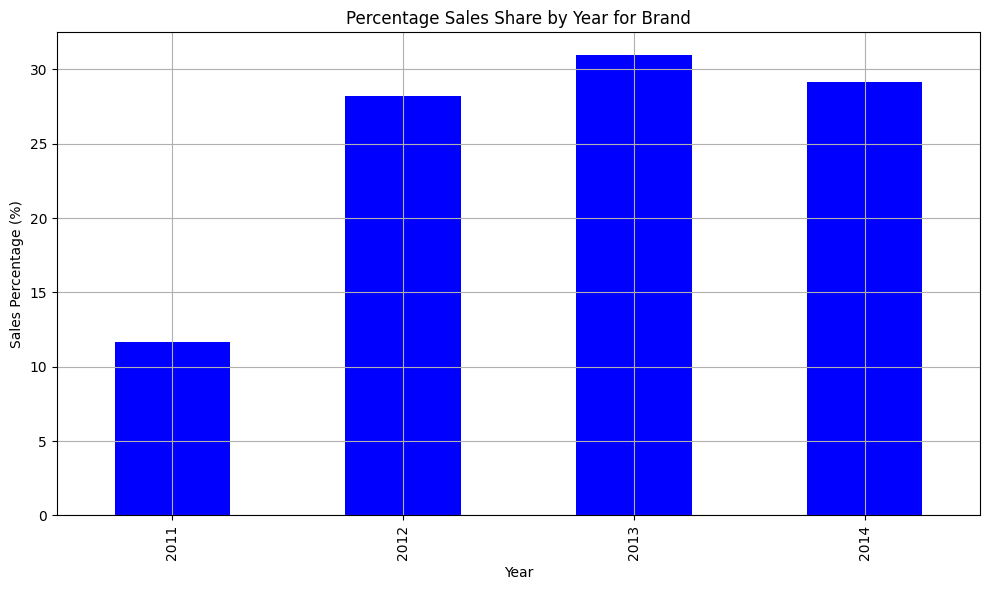

In [95]:

# Ensure 'Period' is of datetime type if it's not already
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract the year from the 'Period' column
Media_Sales_data['Year'] = Media_Sales_data['Period'].dt.year

# Calculate total sales per year
sales_by_year = Media_Sales_data.groupby('Year')['Value_Brand_sales'].sum()

# Calculate total sales for all years combined
total_sales = Media_Sales_data['Value_Brand_sales'].sum()

# Calculate percentage sales share per year
sales_percentage_by_year = (sales_by_year / total_sales) * 100

# Plotting the percentage sales share per year
plt.figure(figsize=(10, 6))
sales_percentage_by_year.plot(kind='bar', color='blue')
plt.title('Percentage Sales Share by Year for Brand')
plt.xlabel('Year')
plt.ylabel('Sales Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Sales Share Percentage for Brand is high in the year 2013 and 2014

Sales Share Percentage for Brand is low in the year 2011

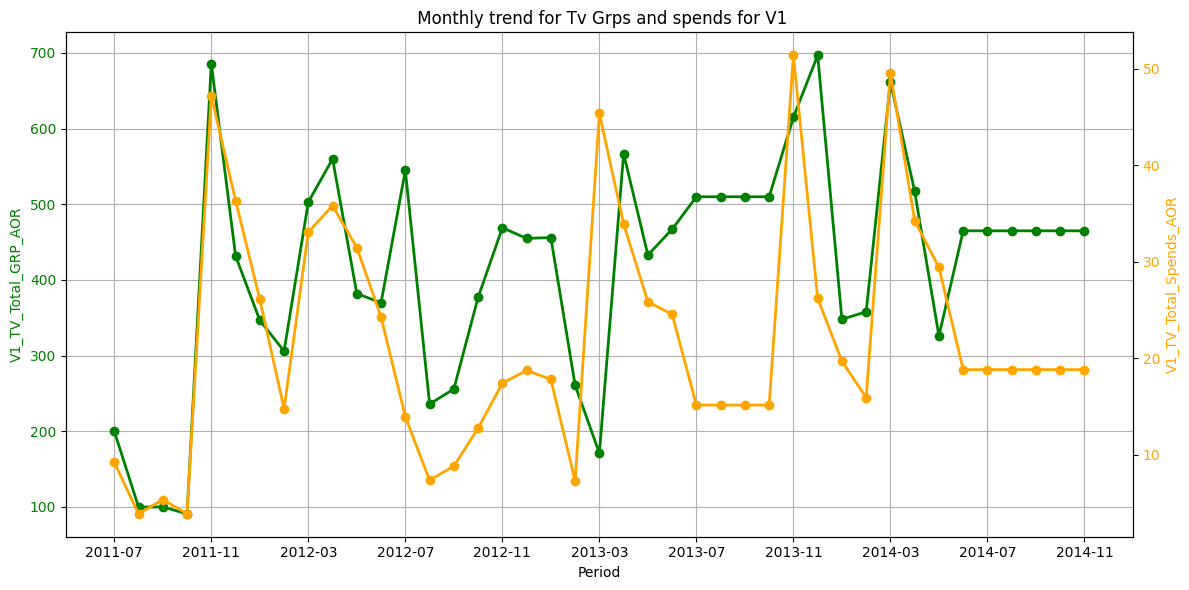

In [96]:
Media_Sales_data['Period'] = pd.to_datetime(Media_Sales_data['Period'], errors='coerce')

# Extract month and year from the 'Period' column
Media_Sales_data['Year_Month'] = Media_Sales_data['Period'].dt.to_period('M')

# Calculate the total sales per period and the average price per period
sales_trend = Media_Sales_data.groupby('Year_Month')['V1_TV_Total_GRP_AOR'].sum()
price_trend = Media_Sales_data.groupby('Year_Month')['V1_TV_Total_Spends_AOR'].mean()

# Create subplots to show both trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the Sales Trend
ax1.plot(sales_trend.index.astype(str), sales_trend, color='green', label='Brand Sales', marker='o', linewidth=2)
ax1.set_xlabel('Period')
ax1.set_ylabel('V1_TV_Total_GRP_AOR', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title(' Monthly trend for Tv Grps and spends for V1')

# Create a second y-axis for the Price Trend
ax2 = ax1.twinx()
ax2.plot(price_trend.index.astype(str), price_trend, color='orange', label='Average Price', marker='o', linewidth=2)
ax2.set_ylabel('V1_TV_Total_Spends_AOR', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adjust x-axis labels to display only the year and month (e.g., '2024-Jan', '2024-Feb', etc.)
num_ticks = len(sales_trend)  # Total number of periods
step = max(1, num_ticks // 10)  # Adjust step size to show fewer ticks (up to 10)
xticks_positions = range(0, num_ticks, step)  # Select the positions for the ticks

# Set the x-ticks manually based on the selected positions
ax1.set_xticks(xticks_positions)
ax1.set_xticklabels([str(sales_trend.index[i])[:7] for i in xticks_positions])  # Shortened labels to 'YYYY-MMM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid and legends
ax1.grid(True)
fig.tight_layout()

# Show the plot
plt.show()


Tv Grp's and Spends fluctuate over time with no clear trend.

Grp's peaks often precede spends peaks, but the correlation is not strong. 

Sudden spends  drops do not always lead to immediate Grp's declines. Overall, the v1 shows some variation in both Grp's and Spends

## Model Trainig

## Linear Regression Brand Model 

In [97]:
Media_Sales_data.to_csv('Media_Sales_data.csv', index=False)

In [98]:

y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_SU_Brand_sales','Shipment_SU_Brand','Brand_Social_Facebook_Likes_Digital','month_7','month_9','month_3','month_5']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 2123243.9928432084
R-squared (R2): 0.8277369860222221
Adjusted R-squared: -0.37810411182222303
Mean Absolute Percentage Error (MAPE): 2.9572943421524793


### Plot between Actual and Predicted Sales

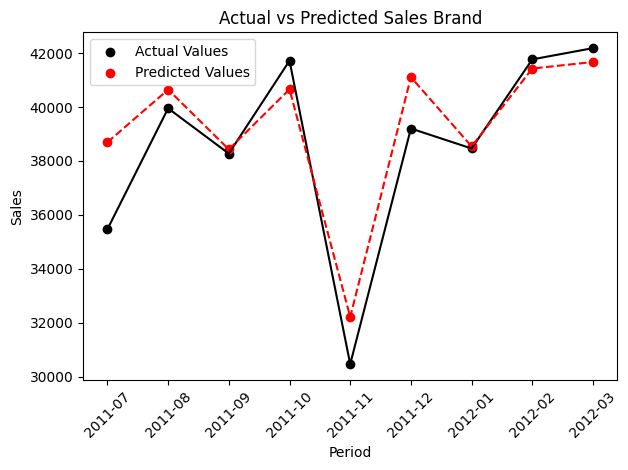

In [102]:
import matplotlib.pyplot as plt

# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Brand')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Linear Regression For V1 Model

In [103]:
# Define Adstock Rate
adstock_rate = 0.75
# Media Data
media_impressions = Media_Sales_data['V1_TV_Total_GRP_AOR']
def adstocking(adstock_rate, impressions=media_impressions):
    adstocked_media = []
    for i in range(len(impressions)):
        if i == 0:
            adstocked_media.append(impressions[i])
        else:
            adstocked_media.append(impressions[i] + adstock_rate * adstocked_media[i-1])
    return adstocked_media
adstocked_media = adstocking(adstock_rate, impressions=media_impressions)

In [104]:
Media_Sales_data['Adstocked_V1_Media'] = adstocking(adstock_rate, impressions=media_impressions)

# Feature Set and Target Variable
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [107]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 917946.2505262822
R-squared (R2): 0.7935934320142557
Adjusted R-squared: -0.6512525438859544
Mean Absolute Percentage Error (MAPE): 4.427004539110991


## Plot between Actual and Predicted Sales

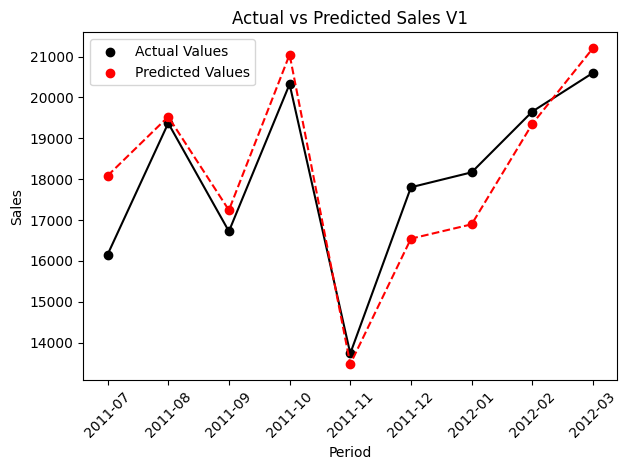

In [108]:
import matplotlib.pyplot as plt

# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales V1')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Linear Regression For V2 Model

In [109]:
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 288430.76258807175
R-squared (R2): 0.7671928683875116
Adjusted R-squared: -0.8624570528999076
Mean Absolute Percentage Error (MAPE): 2.495289526547843


## Plot between Actual and Predicted Sales

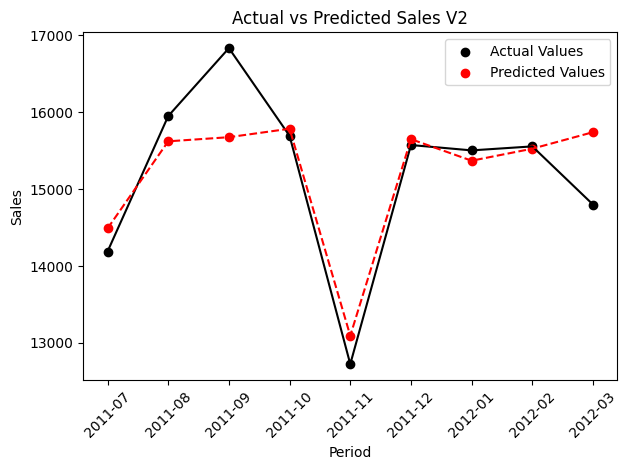

In [113]:
import matplotlib.pyplot as plt

# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales V2')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Linear Regression For V3 Model

In [114]:
Media_Sales_data.columns

Index(['Period', 'Value_Brand_sales', 'Value_V1_sales', 'Value_V2_sales',
       'Value_V3_sales', 'Volume_Brand_sales', 'Volume_V1_sales',
       'Volume_V2_sales', 'Volume_V3_sales', 'Avg_Price_SU_Brand_sales',
       'Avg_Price_SU_V1_sales', 'Avg_Price_SU_V2_sales',
       'Avg_Price_SU_V3_sales', 'Avg_Price_USD_Brand_sales',
       'Avg_Price_USD_V1_sales', 'Avg_Price_USD_V2_sales',
       'Avg_Price_USD_V3_sales', 'WTD_Brand', 'WTD_V1', 'WTD_V2', 'WTD_V3',
       'NUMD_Brand', 'NUMD_V1', 'NUMD_V2', 'NUMD_V3', 'Shipment_SU_Brand',
       'Shipment_SU_V1', 'Shipment_SU_V2', 'Shipment_SU_V3',
       'Brand_Search_SEM_Yahoo_impression_Digital',
       'Brand_SEM_Yahoo_Clicks_Digital', 'Brand_SEM_Yahoo_USM_Digital_AOR',
       'Brand_Social_Facebook_Likes_Digital',
       'Brand_Social_Facebook_PTAT_Digital',
       'Brand_Birth_Rate_No_of_Births_CPA',
       'Brand_Youtube_Channel_Views_P&G/Digital',
       'Brand_CRM_Pampers_Baby_Club_Elements_P&G', 'V1_TV_Total_GRP_AOR',
       'V1_

In [115]:
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
#r squared score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 90527.82592305772
R-squared (R2): 0.8830682542490682
Adjusted R-squared: 1.2338634915018636
Mean Absolute Percentage Error (MAPE): 4.7819557296995905


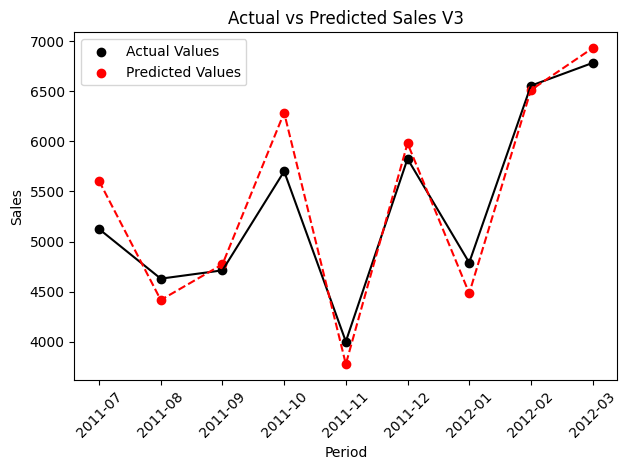

In [119]:
import matplotlib.pyplot as plt

# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales V3')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Lasso Regression For Brand Model

In [120]:
from sklearn.linear_model import Lasso
y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_USD_Brand_sales','Shipment_SU_Brand','Brand_Social_Facebook_Likes_Digital','month_7','month_9']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train.values.ravel())
y_pred = lasso_model.predict(X_test)

In [122]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

# Calculate MAPE
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7517245467198014
Adjusted R-squared: 0.337932124586137
Mean Squared Error (MSE): 3060142.4680495225
Mean Absolute Percentage Error (MAPE): 3.767573399075434


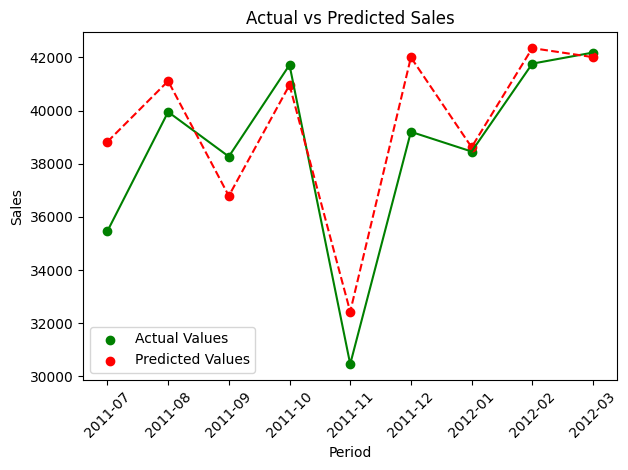

In [123]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='green')
plt.plot(range(len(y_test)), y_test, color='green') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Lasso Regression For V1 Model

In [124]:
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train.values.ravel())
y_pred = lasso_model.predict(X_test)

In [126]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

# Calculate MAPE
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7937352401900404
Adjusted R-squared: -0.650118078479677
Mean Squared Error (MSE): 917315.5909279669
Mean Absolute Percentage Error (MAPE): 4.422635242379718


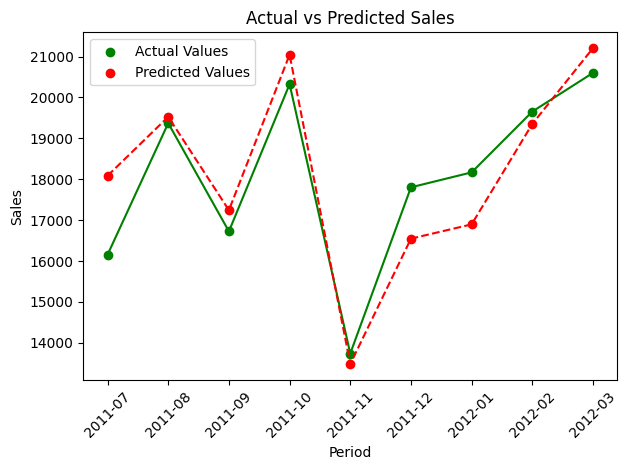

In [127]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='green')
plt.plot(range(len(y_test)), y_test, color='green') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Lasso Regression For V2 Model

In [128]:
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train.values.ravel())
y_pred = lasso_model.predict(X_test)

In [130]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

# Calculate MAPE
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7665737266630472
Adjusted R-squared: -0.8674101866956221
Mean Squared Error (MSE): 289197.83324651956
Mean Absolute Percentage Error (MAPE): 2.4990408896043124


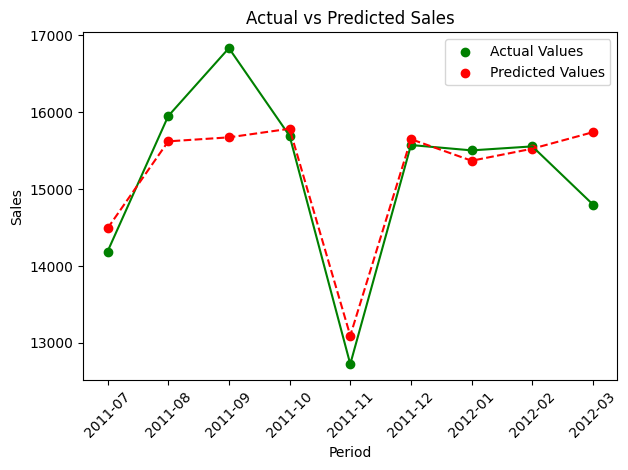

In [131]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='green')
plt.plot(range(len(y_test)), y_test, color='green') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Lasso Regression for V3 Model

In [132]:
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:

lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso_model.fit(X_train, y_train.values.ravel())
y_pred = lasso_model.predict(X_test)

In [134]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

# Calculate MAPE
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.8832005631734219
Adjusted R-squared: 1.2335988736531562
Mean Squared Error (MSE): 90425.39318167484
Mean Absolute Percentage Error (MAPE): 4.78463136640199


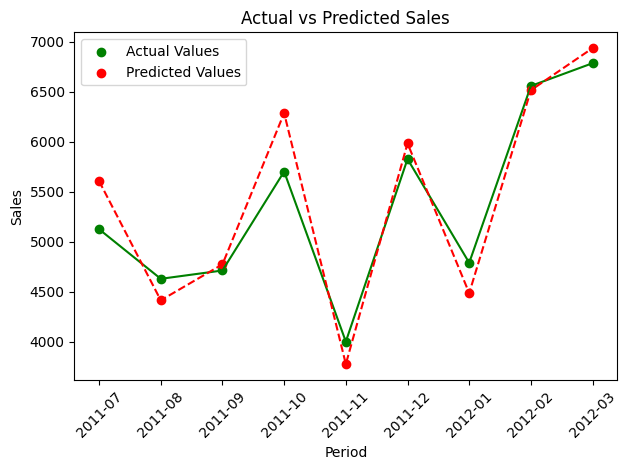

In [135]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='green')
plt.plot(range(len(y_test)), y_test, color='green') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Ridge Regression For Brand Model

In [136]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_SU_Brand_sales','Shipment_SU_Brand','Brand_Social_Facebook_Likes_Digital','month_7','month_9']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)

In [137]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7524569236652976
Adjusted R-squared: 0.3398851297741269
Mean Squared Error (MSE): 3051115.4870736618
Mean Absolute Percentage Error (MAPE): 3.775994538783251


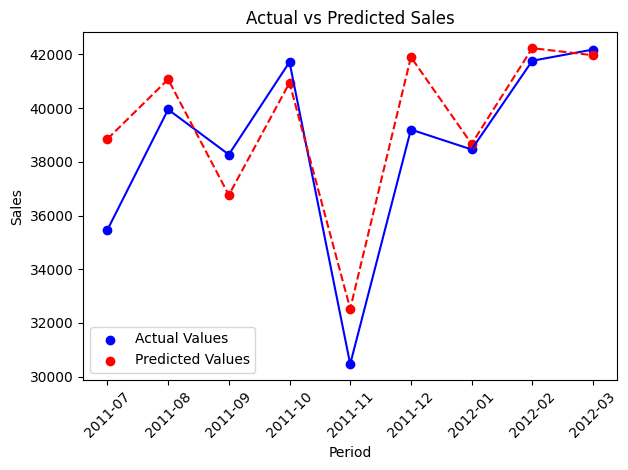

In [138]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_test, color='blue') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Ridge Regression For V1 Model

In [139]:
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)

In [140]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:",adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.8215673319816581
Adjusted R-squared: -0.4274613441467352
Mean Squared Error (MSE): 793538.6949031111
Mean Absolute Percentage Error (MAPE): 3.947278186413366


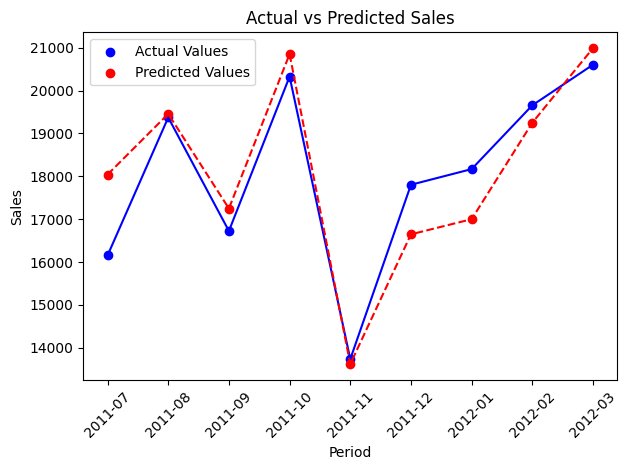

In [141]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_test, color='blue') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Ridge Regression For V2 Model

In [142]:
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)

In [143]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7431955534370032
Adjusted R-squared: -1.0544355725039747
Mean Squared Error (MSE): 318161.65529441007
Mean Absolute Percentage Error (MAPE): 2.6589608025531515


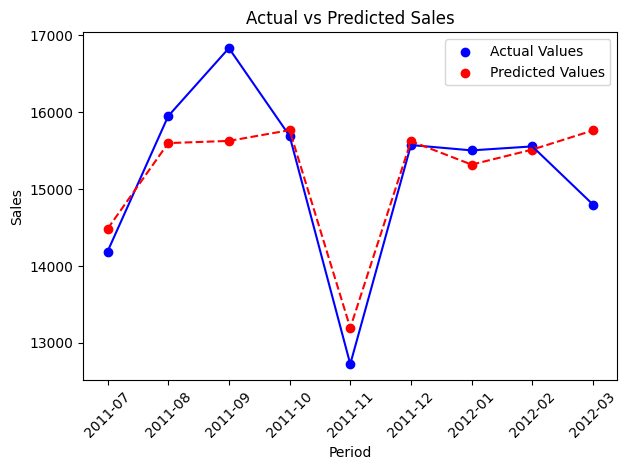

In [144]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_test, color='blue') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Ridge Regression For V3 Model

In [145]:
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.4989623205466923
Adjusted R-squared: 2.002075358906615
Mean Squared Error (MSE): 387900.2364597845
Mean Absolute Percentage Error (MAPE): 10.493285016984997


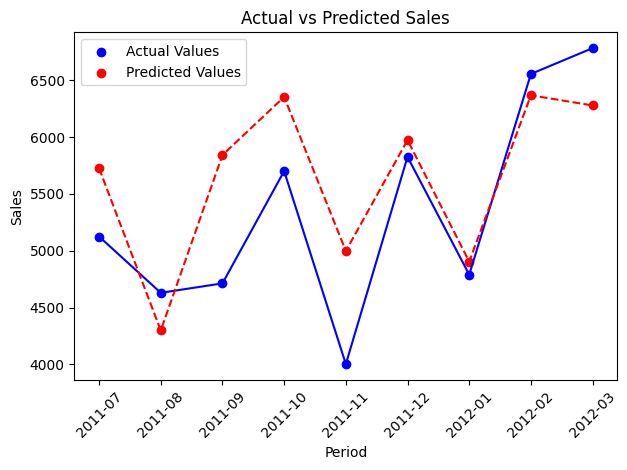

In [146]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_test, color='blue') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Values Comparison for Brand Model

In [147]:
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Random Forest','XGBoost Model']
r_squared = [0.8277, 0.7517, 0.7524,0.7927,0.7620]  # Replace with your R-squared values
adjusted_r_squared = [-0.3781, 0.3379, 0.3398,0.4473,0.3654]  # Replace with your Adjusted R-squared values
mape = [2.9572, 3.7675, 3.7759, 3.8790,4.0488]  # Replace with your MAPE values

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r_squared,
    'Adjusted R-squared': adjusted_r_squared,
    'MAPE': mape
})
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Random Forest','XGBoost Model']
r_squared = [0.7935, 0.7937, 0.8215,0.5577,0.5026]  # Replace with your R-squared values
adjusted_r_squared = [-0.6512, -0.6501, -0.4274,-2.5378,-2.9790]  # Replace with your Adjusted R-squared values
mape = [4.4270, 4.4270, 3.9472,5.7503,6.0333]  # Replace with your MAPE values

# Create a DataFrame to store the results
results_df1 = pd.DataFrame({
    'Model': model_names,
    'R-squared': r_squared,
    'Adjusted R-squared': adjusted_r_squared,
    'MAPE': mape
})
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Random Forest','XGBoost Model']
r_squared = [0.7671, 0.7665, 0.7431,0.1140,0.1840]  # Replace with your R-squared values
adjusted_r_squared = [-0.8624, -0.8674, -1.0544,-6.0873,-5.5278]  # Replace with your Adjusted R-squared values
mape = [2.4952, 2.4990, 2.6589,6.2441,5.8499]  # Replace with your MAPE values

# Create a DataFrame to store the results
results_df2 = pd.DataFrame({
    'Model': model_names,
    'R-squared': r_squared,
    'Adjusted R-squared': adjusted_r_squared,
    'MAPE': mape
})
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Random Forest','XGBoost Model']
r_squared = [0.8830, 0.8832, 0.4989,0.8656,0.5966]  # Replace with your R-squared values
adjusted_r_squared = [1.2338, 1.2335, 2.0020,1.2687,1.8067]  # Replace with your Adjusted R-squared values
mape = [4.7819,4.7846, 10.4932,5.1178,8.3398]  # Replace with your MAPE values

# Create a DataFrame to store the results
results_df3 = pd.DataFrame({
    'Model': model_names,
    'R-squared': r_squared,
    'Adjusted R-squared': adjusted_r_squared,
    'MAPE': mape
})
# Display the table
print("Brand Model")
print(results_df)
print("\nV1 Model")
print(results_df1)
print("\nV2 Model")
print(results_df2)
print("\nV3 Model")
print(results_df3)


Brand Model
               Model  R-squared  Adjusted R-squared    MAPE
0  Linear Regression     0.8277             -0.3781  2.9572
1   Lasso Regression     0.7517              0.3379  3.7675
2   Ridge Regression     0.7524              0.3398  3.7759
3      Random Forest     0.7927              0.4473  3.8790
4      XGBoost Model     0.7620              0.3654  4.0488

V1 Model
               Model  R-squared  Adjusted R-squared    MAPE
0  Linear Regression     0.7935             -0.6512  4.4270
1   Lasso Regression     0.7937             -0.6501  4.4270
2   Ridge Regression     0.8215             -0.4274  3.9472
3      Random Forest     0.5577             -2.5378  5.7503
4      XGBoost Model     0.5026             -2.9790  6.0333

V2 Model
               Model  R-squared  Adjusted R-squared    MAPE
0  Linear Regression     0.7671             -0.8624  2.4952
1   Lasso Regression     0.7665             -0.8674  2.4990
2   Ridge Regression     0.7431             -1.0544  2.6589
3      R

## Random Forest Model For Brand

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define the target and features
y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_SU_Brand_sales', 'Shipment_SU_Brand', 
                      'Brand_Social_Facebook_Likes_Digital', 'month_7', 'month_9']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("Random Forest Model Evaluation for brand:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Random Forest Model Evaluation for brand:
R-squared: 0.7927514712181326
Adjusted R-squared: 0.447337256581687
Mean Absolute Percentage Error (MAPE): 3.8790886957075283


## Random Forest Model for V1

In [149]:
# Define the target and features
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("Random Forest Model Evaluation for V1:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Random Forest Model Evaluation for V1:
R-squared: 0.5577688773543965
Adjusted R-squared: -2.537848981164828
Mean Absolute Percentage Error (MAPE): 5.750336901408282


## Random Forest Model for V2

In [150]:
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("Random Forest Model Evaluation for V2:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Random Forest Model Evaluation for V2:
R-squared: 0.11408273129705593
Adjusted R-squared: -6.087338149623553
Mean Absolute Percentage Error (MAPE): 6.244171543266577


## Random Forest Model for V3

In [151]:
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("Random Forest Model Evaluation for V3:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Random Forest Model Evaluation for V3:
R-squared: 0.8656041713381368
Adjusted R-squared: 1.2687916573237263
Mean Absolute Percentage Error (MAPE): 5.117830940129134


## XGBoost Regressor For Brand

In [152]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np

# Define the target and features
y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_SU_Brand_sales', 'Shipment_SU_Brand', 
                      'Brand_Social_Facebook_Likes_Digital', 'month_7', 'month_9']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("XGBoost Model Evaluation for Brand:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


XGBoost Model Evaluation for Brand:
R-squared: 0.762057900428772
Adjusted R-squared: 0.3654877344767252
Mean Absolute Percentage Error (MAPE): 4.0488236706362954


## XGBoost Model For V1

In [153]:
# Define the target and features
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("XGBoost Model Evaluation for V1:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


XGBoost Model Evaluation for V1:
R-squared: 0.5026181936264038
Adjusted R-squared: -2.9790544509887695
Mean Absolute Percentage Error (MAPE): 6.033329477097558


## XGBoost Model For V2

In [154]:
# Define the target and features
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("XGBoost Model Evaluation for V2:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

XGBoost Model Evaluation for V2:
R-squared: 0.1840221881866455
Adjusted R-squared: -5.527822494506836
Mean Absolute Percentage Error (MAPE): 5.849926493821115


## XGBoost Model For V3

In [155]:
# Define the target and features
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())) * 100

# Print metrics
print("XGBoost Model Evaluation for V3:")
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

XGBoost Model Evaluation for V3:
R-squared: 0.5966079831123352
Adjusted R-squared: 1.8067840337753296
Mean Absolute Percentage Error (MAPE): 8.339874449688168


## Best Model For  Brand is Linear Regression 

## R-squared values is  0.8277 and MAPE is 2.9572

In [156]:

y = Media_Sales_data[['Value_Brand_sales']]
X = Media_Sales_data[['Avg_Price_SU_Brand_sales','Shipment_SU_Brand','Brand_Social_Facebook_Likes_Digital','month_3','month_5','month_7','month_9']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 2123243.992843214
R-squared (R2): 0.8277369860222217
Adjusted R-squared: -0.3781041118222266
Mean Absolute Percentage Error (MAPE): 2.9572943421524904


## Actual and Predicted values Plot

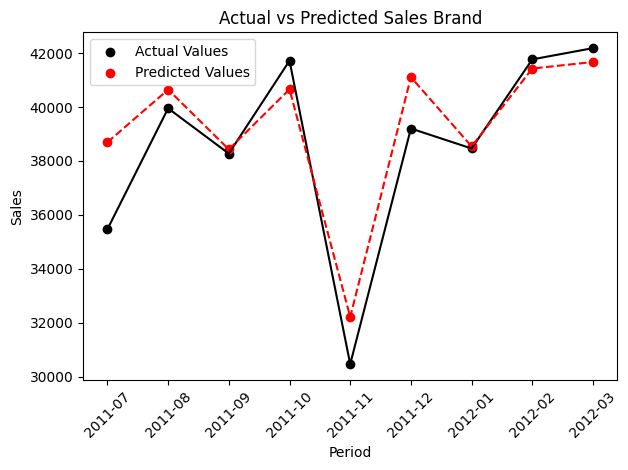

In [157]:
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Brand')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Contribution Chart for Brand Model 

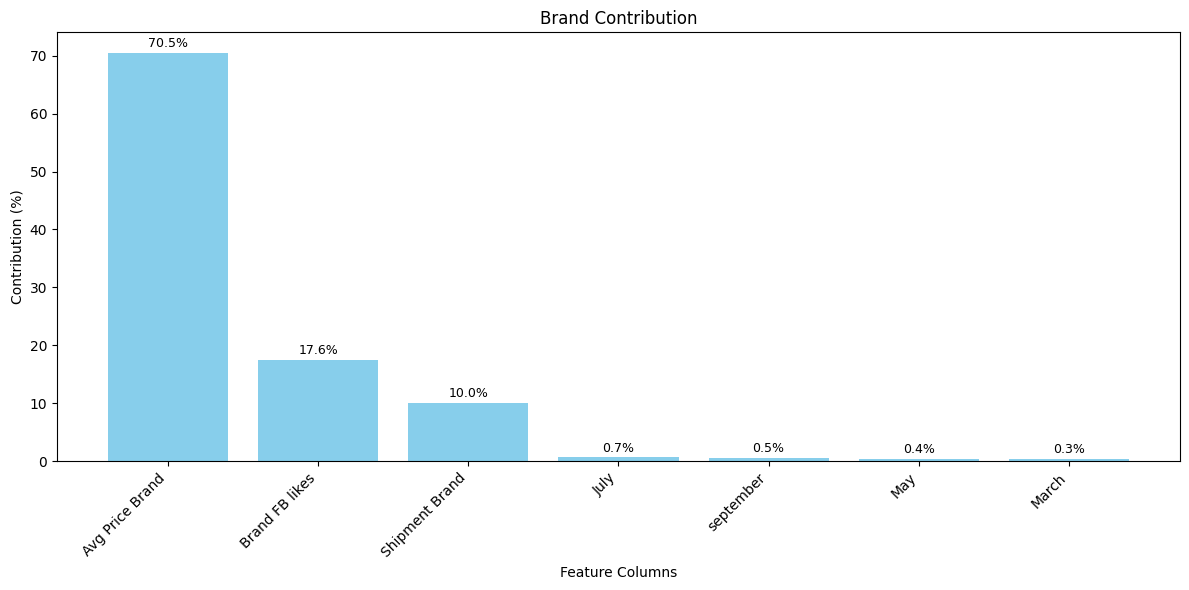

In [158]:
y = Media_Sales_data['Value_Brand_sales']
X = Media_Sales_data[['Avg_Price_SU_Brand_sales', 'Shipment_SU_Brand', 
                      'Brand_Social_Facebook_Likes_Digital', 'month_7', 'month_9', 
                      'month_3', 'month_5']]

# Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)
# Define a mapping for feature names (replace these with your custom names)
feature_mapping = {
    'Avg_Price_SU_Brand_sales': 'Avg Price Brand',
    'Shipment_SU_Brand': 'Shipment Brand',
    'Brand_Social_Facebook_Likes_Digital': 'Brand FB likes',
    'month_7': 'July',
    'month_9': 'september',
    'month_3': 'March',
    'month_5': 'May'
}

# Map the feature names
renamed_features = [feature_mapping.get(col, col) for col in X.columns]

# Sort contributions by absolute value of coefficients
coefficients = np.abs(model.coef_.flatten())  # Take absolute coefficients
averages = X.mean().values
mul_values = coefficients * averages

# Compute total and contributions
tot = np.sum(mul_values)
contributions = (mul_values * 100) / tot

# Combine feature names, contributions, and sort
contribution_data = pd.DataFrame({
    'Feature': renamed_features,
    'Contribution': contributions
}).sort_values(by='Contribution', ascending=False)

# Plot histogram with percentage numbers
plt.figure(figsize=(12, 6))

# Define the bars
bars = plt.bar(contribution_data['Feature'], contribution_data['Contribution'], color='skyblue')

# Set labels and title
plt.xlabel('Feature Columns')
plt.ylabel('Contribution (%)')
plt.title('Brand Contribution')
plt.xticks(rotation=45, ha='right')

# Add percentage values on the bars
for bar, contribution in zip(bars, contribution_data['Contribution']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.5,            
        f'{contribution:.1f}%',            
        ha='center',                      
        va='bottom',                     
        fontsize=9                          
    )

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()


## Best Model For V1 is Ridge Regression

## R-Squared values is 0.8215 and MAPE is 3.9472

In [159]:
X = Media_Sales_data[['Avg_Price_SU_V1_sales','Adstocked_V1_Media',
       'V1_iMedia_Total_Impressions_Digital','month_1','month_7','month_8','month_11']]
y = Media_Sales_data[['Value_V1_sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test.values.ravel() - y_pred) / y_test.values.ravel())).mean() * 100
# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:",adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.8215673319816581
Adjusted R-squared: -0.4274613441467352
Mean Squared Error (MSE): 793538.6949031111
Mean Absolute Percentage Error (MAPE): 3.947278186413366


## Actual vs Predicted values Plot

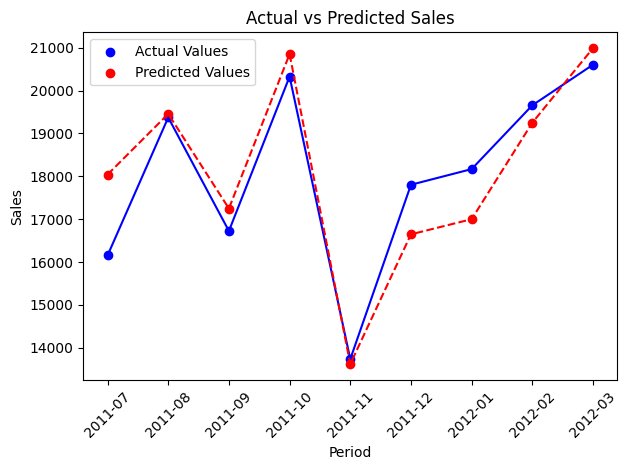

In [160]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_test, color='blue') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Contribution chat For V1 model 

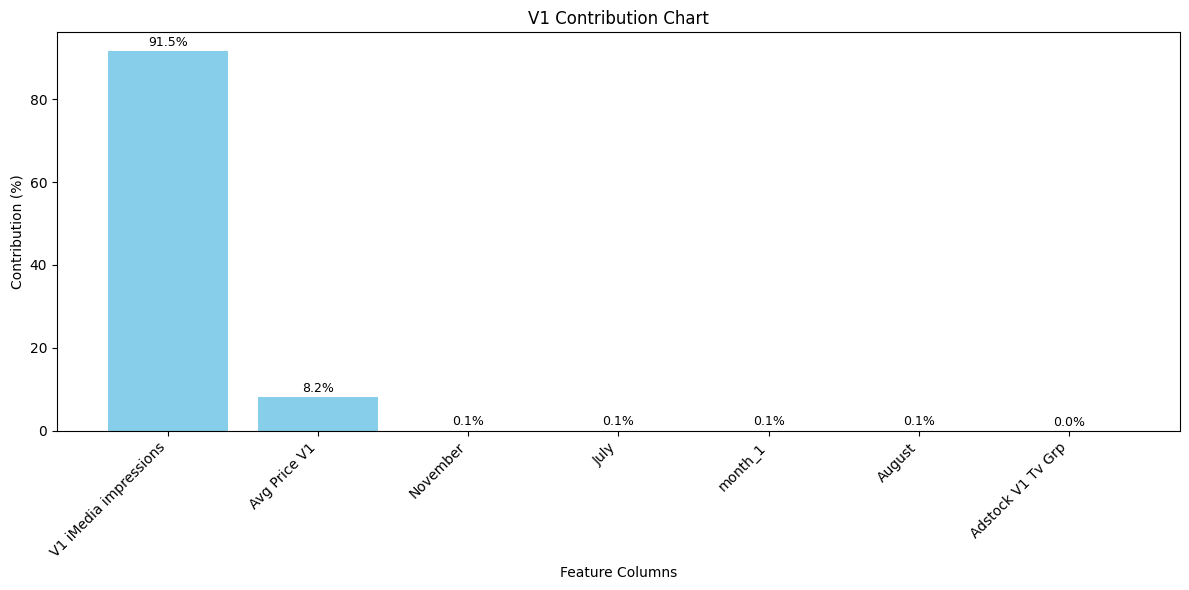

In [161]:
# Define features (X) and target (y)
X = Media_Sales_data[['Avg_Price_SU_V1_sales', 'Adstocked_V1_Media',
                      'V1_iMedia_Total_Impressions_Digital', 'month_1', 
                      'month_7', 'month_8', 'month_11']]
y = Media_Sales_data[['Value_V1_sales']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train.values.ravel())

# Define a mapping for feature names (replace these with your custom names)
feature_mapping = {
    'Avg_Price_SU_V1_sales': 'Avg Price V1',
    'Adstocked_V1_Media': 'Adstock V1 Tv Grp',
    'V1_iMedia_Total_Impressions_Digital': 'V1 iMedia impressions',
    'month_7': 'July',
    'month_8': 'August',
    'month_11': 'November',
}

# Map the feature names
renamed_features = [feature_mapping.get(col, col) for col in X.columns]

# Sort contributions by absolute value of coefficients
coefficients = np.abs(model.coef_.flatten())  # Take absolute coefficients
averages = X.mean().values
mul_values = coefficients * averages

# Compute total and contributions
tot = np.sum(mul_values)
contributions = (mul_values * 100) / tot

# Combine feature names, contributions, and sort
contribution_data = pd.DataFrame({
    'Feature': renamed_features,
    'Contribution': contributions
}).sort_values(by='Contribution', ascending=False)

# Plot histogram with percentage numbers
plt.figure(figsize=(12, 6))

# Define the bars
bars = plt.bar(contribution_data['Feature'], contribution_data['Contribution'], color='skyblue')

# Set labels and title
plt.xlabel('Feature Columns')
plt.ylabel('Contribution (%)')
plt.title('V1 Contribution Chart')
plt.xticks(rotation=45, ha='right')

# Add percentage values on the bars
for bar, contribution in zip(bars, contribution_data['Contribution']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.5,            
        f'{contribution:.1f}%',            
        ha='center',                      
        va='bottom',                     
        fontsize=9                          
    )

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()


## Best Model for V2 is Linear Regression 

R-squared is 0.7671 and MAPE is 2.4952

In [162]:
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media','V1_TV_Total_Spends_AOR','V1_iMedia_Total_Impressions_Digital','month_3','month_7','month_1']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)
#Adjusted R-squared
n = len(y_test) 
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error: 288430.76258807175
R-squared (R2): 0.7671928683875116
Adjusted R-squared: -0.8624570528999076
Mean Absolute Percentage Error (MAPE): 2.495289526547843


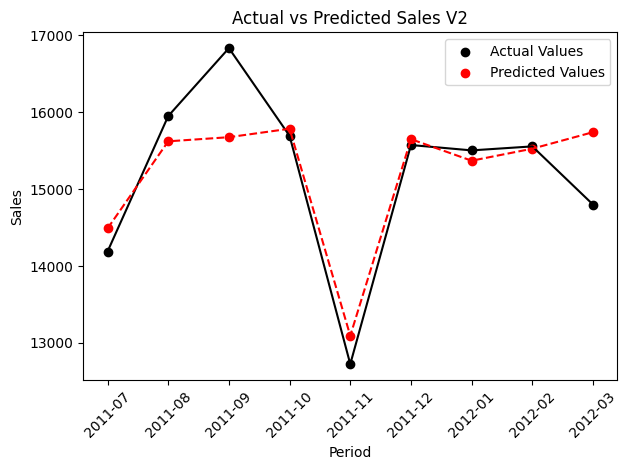

In [163]:
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales V2')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Contribution Chart For V2 Model

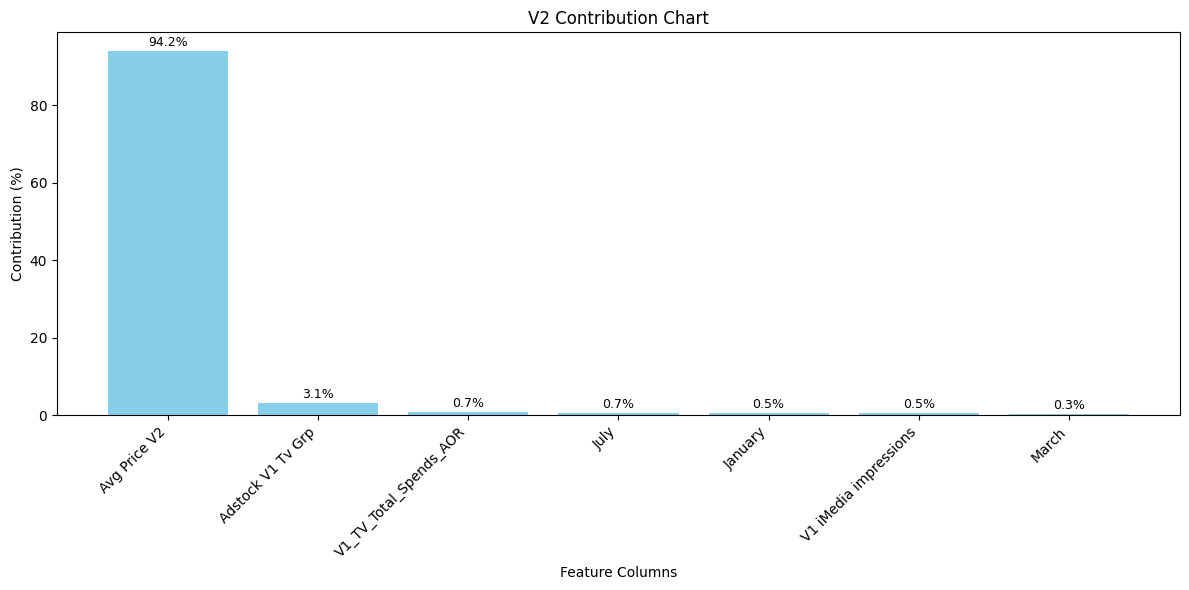

In [164]:
# Define features (X) and target (y)
y = Media_Sales_data[['Value_V2_sales']]
X = Media_Sales_data[['Avg_Price_SU_V2_sales', 'Adstocked_V1_Media', 
                      'V1_TV_Total_Spends_AOR', 'V1_iMedia_Total_Impressions_Digital', 
                      'month_3', 'month_7', 'month_1']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Define a mapping for feature names (replace these with your custom names)
feature_mapping = {
    'Avg_Price_SU_V2_sales': 'Avg Price V2',
    'Adstocked_V1_Media': 'Adstock V1 Tv Grp',
    'V1_iMedia_Total_Impressions_Digital': 'V1 iMedia impressions',
    'month_7': 'July',
    'month_3': 'March',
    'month_1': 'January',
}

# Map the feature names
renamed_features = [feature_mapping.get(col, col) for col in X.columns]

# Sort contributions by absolute value of coefficients
coefficients = np.abs(model.coef_.flatten())  # Take absolute coefficients
averages = X.mean().values
mul_values = coefficients * averages

# Compute total and contributions
tot = np.sum(mul_values)
contributions = (mul_values * 100) / tot

# Combine feature names, contributions, and sort
contribution_data = pd.DataFrame({
    'Feature': renamed_features,
    'Contribution': contributions
}).sort_values(by='Contribution', ascending=False)

# Plot histogram with percentage numbers
plt.figure(figsize=(12, 6))

# Define the bars
bars = plt.bar(contribution_data['Feature'], contribution_data['Contribution'], color='skyblue')

# Set labels and title
plt.xlabel('Feature Columns')
plt.ylabel('Contribution (%)')
plt.title('V2 Contribution Chart')
plt.xticks(rotation=45, ha='right')

# Add percentage values on the bars
for bar, contribution in zip(bars, contribution_data['Contribution']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.5,            
        f'{contribution:.1f}%',            
        ha='center',                      
        va='bottom',                     
        fontsize=9                          
    )

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()

## Best Model For V3 is Linear Regression

## R-squared is 0.8830 and MAPE is 4.7819

## Actual vs Predicted plot

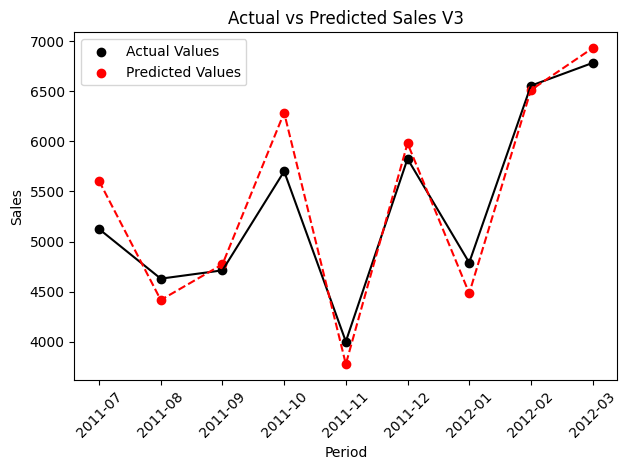

In [165]:
y = Media_Sales_data[['Value_V3_sales']]
X = Media_Sales_data[['Avg_Price_SU_V3_sales','Avg_Price_SU_V1_sales','Shipment_SU_V3','V1_TV_Total_Spends_AOR', 'V1_TV_ISP_Spends_AOR','Adstocked_V1_Media','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Total_Impressions_Digital','month_12','month_1','month_6','month_8']]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Ensure 'Year_Month' is in the correct datetime or string format
x_labels = Media_Sales_data['Year_Month'].astype(str)  # Convert to string if necessary

# Ensure the number of x-ticks matches your data points
num_points = len(y_test)

plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='black')
plt.plot(range(len(y_test)), y_test, color='black') 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  

# Set x-ticks to the Year_Month column
plt.xticks(range(num_points), x_labels[:num_points], rotation=45)

plt.xlabel('Period')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales V3')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Contribution Chart For V3 Model

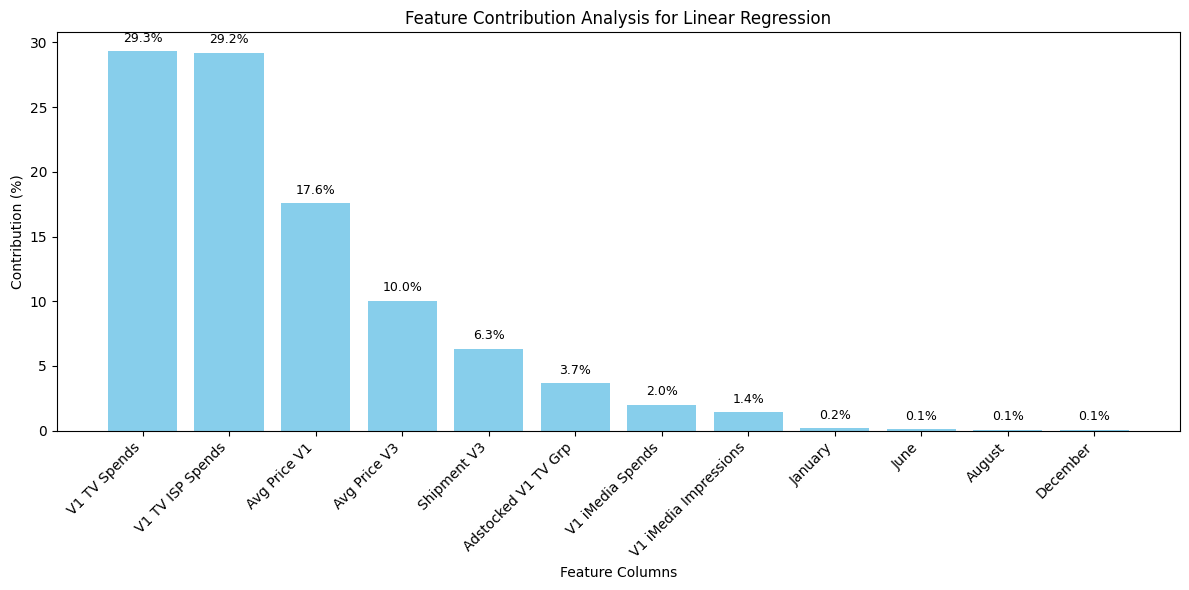

In [166]:

# Define a mapping for feature names (replace these with your custom names)
feature_mapping = {
    'Avg_Price_SU_V3_sales': 'Avg Price V3',
    'Avg_Price_SU_V1_sales': 'Avg Price V1',
    'Shipment_SU_V3': 'Shipment V3',
    'V1_TV_Total_Spends_AOR': 'V1 TV Spends',
    'V1_TV_ISP_Spends_AOR': 'V1 TV ISP Spends',
    'Adstocked_V1_Media': 'Adstocked V1 TV Grp',
    'V1_iMedia_Total_Spends_Digital_AOR': 'V1 iMedia Spends',
    'V1_iMedia_Total_Impressions_Digital': 'V1 iMedia Impressions',
    'month_12': 'December',
    'month_1': 'January',
    'month_6': 'June',
    'month_8': 'August'
}

# Map the feature names
renamed_features = [feature_mapping.get(col, col) for col in X.columns]

# Sort contributions by absolute value of coefficients
coefficients = np.abs(model.coef_.flatten())  # Take absolute coefficients
averages = X.mean().values
mul_values = coefficients * averages

# Compute total and contributions
tot = np.sum(mul_values)
contributions = (mul_values * 100) / tot

# Combine feature names, contributions, and sort
contribution_data = pd.DataFrame({
    'Feature': renamed_features,
    'Contribution': contributions
}).sort_values(by='Contribution', ascending=False)

# Plot histogram with percentage numbers
plt.figure(figsize=(12, 6))

# Define the bars
bars = plt.bar(contribution_data['Feature'], contribution_data['Contribution'], color='skyblue')

# Set labels and title
plt.xlabel('Feature Columns')
plt.ylabel('Contribution (%)')
plt.title('Feature Contribution Analysis for Linear Regression')
plt.xticks(rotation=45, ha='right')

# Add percentage values on the bars
for bar, contribution in zip(bars, contribution_data['Contribution']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        bar.get_height() + 0.5,            # Place text slightly above the bar
        f'{contribution:.1f}%',            # Format text as percentage
        ha='center',                       # Align horizontally at center
        va='bottom',                       # Align vertically above the bar
        fontsize=9                          # Font size
    )

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()
